# Master Thesis (Electricity Trading on Intraday Market in Japan)

## 節立てのしかた
### 小技集(時系列データ用)
https://naotaka1128.hatenadiary.jp/entry/pandas-start-guide#%E6%99%82%E7%B3%BB%E5%88%97%E3%83%87%E3%83%BC%E3%82%BF%E3%81%A7%E3%82%88%E3%81%8F%E4%BD%BF%E3%81%86%E5%87%A6%E7%90%86

# Problem

- An increase in the proportion for the renewable energy power plant in German electricity industry.<p>
- Predicting the amount of electricity supply is becoming more difficult<p>
- The trading volume on the intraday market in Germany is also increasing. <p>
    --> The difference of the planned and the actual electricity supply is expanded. <p>
- The trading price of intraday market tends to be volatile.<p> 
- The electricity suppliers, including producers and retailers, suffered from an unevitable risk due to the uncertainty after submitting day-ahead plan.<p>

# Purpose of this analysis

- Interpreting the dataset of electricity trading.<p>
- Seeking useful features for the prediction. <p>
- Seeking more efficient prediction model for intraday Half Hourly(QH) trading price.<p>
    Intradayのclose priceを予測する！！<p>
    --> Comparision of the performance of some prediction models such as Linear, Non-linear.<p>
- Seeking better trading strategy to maximise return and minimise the risk<p>
    --> Measuring the return with Sharp ratio and the risk with Value at risk

# Read & interpret dataset

Loading some datasets <p>
Confirming and interpreting it <p>
Preprocessing missing values and outliers on the datasets

In [1]:
# Import modules
import pandas as pd
import matplotlib.pyplot as plt #描画ライブラリ
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import pathlib
import glob
import math

# Show all the rows and columns up to 200
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

## JEPX_Spot_datasets
http://www.jepx.org/market/index.html

To do<P>
    seasonality, stationality(以下git-hub講義資料参照) <p>
    https://github.com/mloning/intro-to-ml-with-time-series-DSSGx-2020/blob/master/notebooks/02_exploratory_data_analysis.ipynb <p>
    https://github.com/juanitorduz/btsa/blob/master/python/fundamentals/notebooks/eda_part_2_correlations.ipynb

In [2]:
# read the dataset (Here, these are re-organised after getting the latest dataset)

#Spot_dataset
df_spot_2016 = pd.read_csv('/Users/kenotsu/Documents/master_thesis/Datasets/Master_thesis/spot_2016.csv', sep=',', header=0, encoding='shift_jis')
df_spot_2017 = pd.read_csv('/Users/kenotsu/Documents/master_thesis/Datasets/Master_thesis/spot_2017.csv', sep=',', header=0, encoding='shift_jis')
df_spot_2018 = pd.read_csv('/Users/kenotsu/Documents/master_thesis/Datasets/Master_thesis/spot_2018.csv', sep=',', header=0, encoding='shift_jis')
df_spot_2019 = pd.read_csv('/Users/kenotsu/Documents/master_thesis/Datasets/Master_thesis/spot_2019.csv', sep=',', header=0, encoding='shift_jis')
df_spot_2020 = pd.read_csv('/Users/kenotsu/Documents/master_thesis/Datasets/Master_thesis/spot_2020.csv', sep=',', header=0, encoding='shift_jis')

In [3]:
df_spot_2020.head()

年月日  時刻コード  売り入札量(kWh)  買い入札量(kWh)  約定総量(kWh)  システムプライス(円/kWh)  \
0  2020/04/01      1    16592450    18033600   15772950             6.43   
1  2020/04/01      2    16986950    18180600   15766550             5.77   
2  2020/04/01      3    17263950    18234450   15990350             5.18   
3  2020/04/01      4    17583250    18565050   16078100             4.87   
4  2020/04/01      5    17943550    18738950   16338200             4.87   

   エリアプライス北海道(円/kWh)  エリアプライス東北(円/kWh)  エリアプライス東京(円/kWh)  エリアプライス中部(円/kWh)  \
0               6.84              6.76              6.76              4.00   
1               6.62              6.62              6.62              3.73   
2               6.61              6.61              6.61              4.09   
3               6.51              6.51              6.51              4.04   
4               6.51              6.51              6.51              4.09   

   エリアプライス北陸(円/kWh)  エリアプライス関西(円/kWh)  エリアプライス中国(円/kWh)  エリアプライス四国(円/kWh)  \
0              4.00              4.00              4.00              4.00   
1              3.73              3.73              3.73              3.73   
2              4.09              4.09              4.09              4.09   
3              4.04              4.04              4.04              4.04   
4              4.09              4.09              4.09              4.09   

   エリアプライス九州(円/kWh)  Unnamed: 15  スポット・時間前平均価格(円/kWh)  \
0              4.00          NaN                 6.43   
1              3.73          NaN                 5.77   
2              4.09          NaN                 5.19   
3              4.04          NaN                 4.87   
4              4.09          NaN                 4.87   

   α上限値×スポット・時間前平均価格(円/kWh)  α下限値×スポット・時間前平均価格(円/kWh)  \
0                    503.53                      1.71   
1                    504.38                      1.71   
2                    505.36                      1.71   
3                    503.52                      1.68   
4                    503.52                      1.68   

   α速報値×スポット・時間前平均価格(円/kWh)  α確報値×スポット・時間前平均価格(円/kWh)  Unnamed: 21  \
0                      2.07                      4.43          NaN   
1                      2.70                      4.21          NaN   
2                      2.38                      4.22          NaN   
3                      2.38                      4.34          NaN   
4                      1.68                      4.10          NaN   

   回避可能原価全国値(円/kWh)  回避可能原価北海道(円/kWh)  回避可能原価東北(円/kWh)  回避可能原価東京(円/kWh)  \
0              6.43              6.84             6.77             6.76   
1              5.77              6.63             6.63             6.62   
2              5.19              6.64             6.61             6.61   
3              4.87              6.52             6.51             6.51   
4              4.87              6.52             6.51             6.51   

   回避可能原価中部(円/kWh)  回避可能原価北陸(円/kWh)  回避可能原価関西(円/kWh)  回避可能原価中国(円/kWh)  \
0             4.03             4.00             4.00             4.00   
1             3.75             3.73             3.73             3.73   
2             4.10             4.09             4.09             4.09   
3             4.05             4.04             4.04             4.04   
4             4.10             4.09             4.09             4.09   

   回避可能原価四国(円/kWh)  回避可能原価九州(円/kWh)  
0             4.00             4.00  
1             3.73             3.73  
2             4.09             4.09  
3             4.04             4.04  
4             4.09             4.09

In [4]:
# marge all the spot datasets
df_spot = pd.concat([df_spot_2016, df_spot_2017])
df_spot = pd.concat([df_spot, df_spot_2018])
df_spot = pd.concat([df_spot, df_spot_2019])
df_spot = pd.concat([df_spot, df_spot_2020])

At first pick up only spot price. BUT need to analyse also others

In [5]:
# Pick up some columns
df_spot = df_spot.drop(['エリアプライス北海道(円/kWh)', 'エリアプライス中部(円/kWh)', 'エリアプライス北陸(円/kWh)',
       'エリアプライス関西(円/kWh)', 'エリアプライス中国(円/kWh)', 'エリアプライス四国(円/kWh)',
       'エリアプライス九州(円/kWh)', 'Unnamed: 15', 'スポット・時間前平均価格(円/kWh)',
       'α上限値×スポット・時間前平均価格(円/kWh)', 'α下限値×スポット・時間前平均価格(円/kWh)',
       'α速報値×スポット・時間前平均価格(円/kWh)', 'α確報値×スポット・時間前平均価格(円/kWh)', 'Unnamed: 21',
       '回避可能原価全国値(円/kWh)', '回避可能原価北海道(円/kWh)', '回避可能原価東北(円/kWh)',
       '回避可能原価東京(円/kWh)', '回避可能原価中部(円/kWh)', '回避可能原価北陸(円/kWh)',
       '回避可能原価関西(円/kWh)', '回避可能原価中国(円/kWh)', '回避可能原価四国(円/kWh)',
       '回避可能原価九州(円/kWh)'], axis=1)

In [6]:
# Rename them
df_spot = df_spot.rename(columns={'年月日': 'Date', '時刻コード': 'HH', '売り入札量(kWh)': 'Sell_volume(kWh)',
                                  '買い入札量(kWh)': 'Buy_volume(kWh)', '約定総量(kWh)': 'Total_volume(kWh)', 'システムプライス(円/kWh)': 'System_price(Yen/kWh)', 
                                  'エリアプライス東北(円/kWh)': 'Price_Tohoku(Yen/kWh)','エリアプライス東京(円/kWh)': 'Price_Tokyo(Yen/kWh)'})

In [7]:
# # Apply to_datetime
df_spot["Date"] = pd.to_datetime(df_spot["Date"])

In [8]:
df_spot.head()

Date  HH  Sell_volume(kWh)  Buy_volume(kWh)  Total_volume(kWh)  \
0 2016-04-01   1           5077000          2120500             675500   
1 2016-04-01   2           5621500          2239000             755500   
2 2016-04-01   3           5710500          2219000             713500   
3 2016-04-01   4           5536000          2202500             717500   
4 2016-04-01   5           5461000          2192000             870500   

   System_price(Yen/kWh)  Price_Tohoku(Yen/kWh)  Price_Tokyo(Yen/kWh)  
0                   6.61                   6.69                  6.69  
1                   6.34                   6.34                  6.34  
2                   6.34                   6.34                  6.34  
3                   6.25                   6.03                  6.03  
4                   6.57                   6.57                  6.57

In [9]:
df_spot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84336 entries, 0 to 14207
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   84336 non-null  datetime64[ns]
 1   HH                     84336 non-null  int64         
 2   Sell_volume(kWh)       84336 non-null  int64         
 3   Buy_volume(kWh)        84336 non-null  int64         
 4   Total_volume(kWh)      84336 non-null  int64         
 5   System_price(Yen/kWh)  84336 non-null  float64       
 6   Price_Tohoku(Yen/kWh)  84336 non-null  float64       
 7   Price_Tokyo(Yen/kWh)   84336 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(4)
memory usage: 5.8 MB


- Multiindexを用いた行列調整　https://note.nkmk.me/python-pandas-multiindex-set-reset-sort-swap/

- (参考)　- stack()を用いた列→行への変換方法
https://deepage.net/features/pandas-stack-unstack.html

- pivot_tableの使い方 (stack, unstackも含む)
https://note.nkmk.me/python-pandas-stack-unstack-pivot/

## JEPX_Intra_datasets
http://www.jepx.org/market/index.html

In [10]:
# read the dataset (Here, these are re-organised after getting the latest dataset)

#Intra_dataset
df_intra_2016 = pd.read_csv('/Users/kenotsu/Documents/master_thesis/Datasets/Master_thesis/im_trade_summary_2016.csv', sep=',', header=0, encoding='shift_jis')
df_intra_2017 = pd.read_csv('/Users/kenotsu/Documents/master_thesis/Datasets/Master_thesis/im_trade_summary_2017.csv', sep=',', header=0, encoding='shift_jis')
df_intra_2018 = pd.read_csv('/Users/kenotsu/Documents/master_thesis/Datasets/Master_thesis/im_trade_summary_2018.csv', sep=',', header=0, encoding='shift_jis')
df_intra_2019 = pd.read_csv('/Users/kenotsu/Documents/master_thesis/Datasets/Master_thesis/im_trade_summary_2019.csv', sep=',', header=0, encoding='shift_jis')
df_intra_2020 = pd.read_csv('/Users/kenotsu/Documents/master_thesis/Datasets/Master_thesis/im_trade_summary_2020.csv', sep=',', header=0, encoding='shift_jis')

In [11]:
# marge all the intra datasets
df_intra = pd.concat([df_intra_2016, df_intra_2017])
df_intra = pd.concat([df_intra, df_intra_2018])
df_intra = pd.concat([df_intra, df_intra_2019])
df_intra = pd.concat([df_intra, df_intra_2020])

In [12]:
df_intra = df_intra.rename(columns={'年月日': 'Date', 
                                    '時刻コード': 'HH',
                                    '始値（円/kWh）': 'Open',
                                    '高値（円/kWh）': 'High',
                                    '安値（円/kWh）': 'Low',
                                    '終値（円/kWh）': 'Close',
                                    '平均（円/kWh）': 'Average',
                                    '約定量合計（MWh/h）': 'Volume(MWh/h)',
                                    '約定件数': 'Volume(Tick count)'})

In [13]:
# # Apply to_datetime
df_intra["Date"] = pd.to_datetime(df_intra["Date"])

In [14]:
df_intra["Date"].describe()

count                   84281
unique                   1756
top       2017-12-14 00:00:00
freq                       48
first     2016-04-01 00:00:00
last      2021-01-20 00:00:00
Name: Date, dtype: object

In [15]:
df_intra.tail()

Date  HH    Open    High     Low   Close  Average  Volume(MWh/h)  \
14148 2021-01-20  37  200.00  203.98  150.00  199.30   186.25         1750.4   
14149 2021-01-20  38  200.00  203.98   49.00   49.00   181.21         1414.0   
14150 2021-01-20  39  200.00  200.50   49.00   49.00   176.98         1006.9   
14151 2021-01-20  40  184.24  190.00   69.89   69.89   159.62          781.6   
14152 2021-01-20  41  200.00  201.00   69.89   69.89   174.45         1036.4   

       Volume(Tick count)  
14148                 239  
14149                 244  
14150                 197  
14151                 141  
14152                 150

In [16]:
df_intra.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84281 entries, 0 to 14152
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                84281 non-null  datetime64[ns]
 1   HH                  84281 non-null  int64         
 2   Open                84209 non-null  float64       
 3   High                84209 non-null  float64       
 4   Low                 84209 non-null  float64       
 5   Close               84209 non-null  float64       
 6   Average             84209 non-null  float64       
 7   Volume(MWh/h)       84209 non-null  float64       
 8   Volume(Tick count)  84281 non-null  int64         
dtypes: datetime64[ns](1), float64(6), int64(2)
memory usage: 6.4 MB


### Price volatility

Reference
https://github.com/mloning/intro-to-ml-with-time-series-DSSGx-2020/blob/master/notebooks/02_exploratory_data_analysis.ipynb

Try to look at the over all transition of close price from 2016 to 2020

--> Confirm whether it has seasonality or trend.

In [17]:
close_price = df_intra[df_intra['Date'] <= '2020-12-31']
close_price = close_price[['Date', 'HH', 'Close']]
close_price.head()

Date  HH  Close
0 2016-04-01   1   7.69
1 2016-04-01   2    NaN
2 2016-04-01   3   7.21
3 2016-04-01   4   7.06
4 2016-04-01   5   7.21

In [18]:
close_price.interpolate(method='linear', inplace=True)

In [19]:
print(close_price.isnull().sum())

Date     0
HH       0
Close    0
dtype: int64


※ Half Hourly time slot

時間の切上げ切り捨てについて
https://www.deep-rain.com/programming/python/1355#i-4

In [20]:
# Make a table for QH_number
df_intra_HH = df_intra.reset_index()
HH_table = pd.DataFrame(df_intra_HH["HH"])
HH_table = HH_table.drop_duplicates()
HH_table['Time'] = pd.date_range('2020/01/01', periods=48,  freq='30min').strftime('%H:%M')
HH_table['Time'] = HH_table['Time'].str[-8:]
# HH_table['Hourly_Time'] = pd.date_range('2020/01/01', periods=48,  freq='30min').floor("H").strftime('%H:%M')
# HH_table['Hourly_Time'] = pd.to_datetime(HH_table['Hourly_Time']).dt.time

HH_table.head()

HH   Time
0   1  00:00
1   2  00:30
2   3  01:00
3   4  01:30
4   5  02:00

In [21]:
HH_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48 entries, 0 to 47
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   HH      48 non-null     int64 
 1   Time    48 non-null     object
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [22]:
close_price_graph = close_price
close_price_graph = pd.merge(close_price_graph, HH_table, how="left", on=['HH'])
close_price_graph["Date"] = close_price_graph["Date"].astype(str)
close_price_graph["DateTime"] = pd.to_datetime(close_price_graph["Date"] + " " + close_price_graph["Time"], format='%Y-%m-%d %H:%M')
close_price_graph = close_price_graph.drop(["Date", "HH", "Time"], axis=1)

In [23]:
close_price_graph.head()

Close            DateTime
0   7.69 2016-04-01 00:00:00
1   7.45 2016-04-01 00:30:00
2   7.21 2016-04-01 01:00:00
3   7.06 2016-04-01 01:30:00
4   7.21 2016-04-01 02:00:00

In [24]:
close_price_graph.set_index("DateTime", inplace=True)

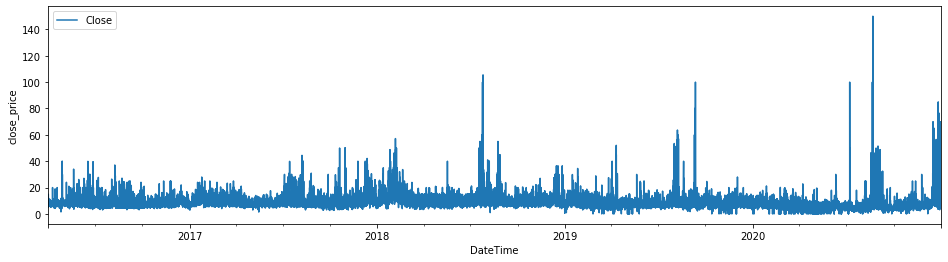

In [25]:
# Simple plot
fig, ax = plt.subplots(1, figsize=plt.figaspect(.25))
close_price_graph.plot(ax=ax)

ax.set(ylabel="close_price", xlabel="DateTime");

Can not observe a kind of trend but some seasonality. 

[Stationarity]<p>
    --> How sensitive the target value is to the change in time/period. <p>
Need to test Stationarity

参照<p>
https://ailearn.biz/learn/20200830772

(引用)""<p>
定常性が強すぎる　→　データ群は時間の影響を受けない<p>
定常性が弱すぎる　→　データ群は時間に強く依存する<p>
定常性が強すぎず、弱すぎない（弱定常性）　→　データ群は時間の影響を受ける<p>
""
-->定常性がない、もしくは極端に弱いとそのデータはランダムウォークしており、仮にある時点で優位性のあるモデルを構築できたとしても他の期間で再現できない<p>
-->つまり弱定常性の仮定がないと時系列分析できない<p>
-->定常性の判定が必要！！<p>

以下を参照して定常性の検定をしてみる

https://deepblue-ts.co.jp/%E7%B5%B1%E8%A8%88%E5%AD%A6/introduction-to-time-series-analysis/

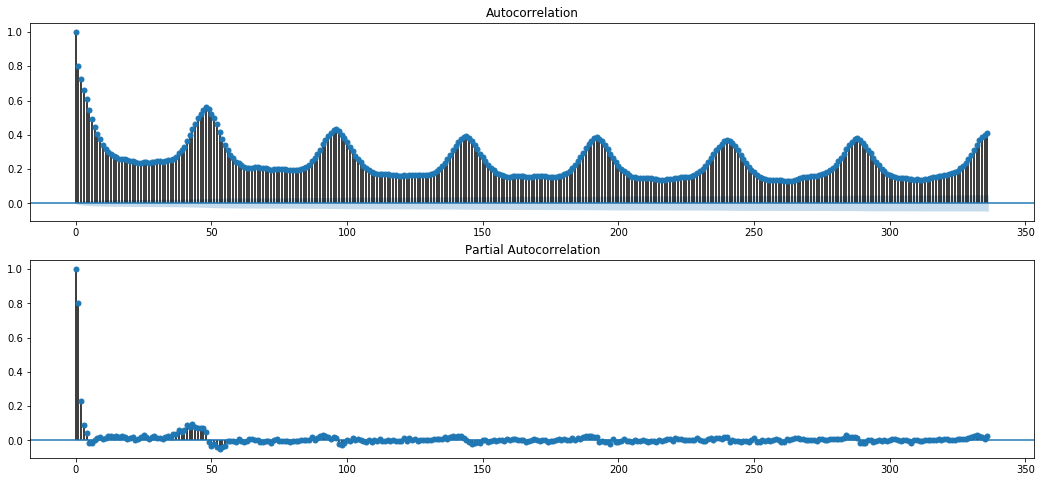

In [26]:
# １つ目：自己相関のコレログラム(1lag=30min --> 336lags=1week)
# ２つ目：偏自己相関のコレログラム
import statsmodels.api as sm

fig = plt.figure(figsize=(18,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(close_price_graph, lags=336, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(close_price_graph, lags=336, ax=ax2)

-->定常性はほぼないに等しい？

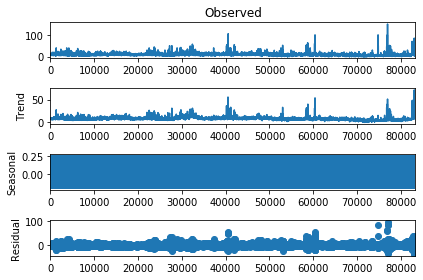

In [27]:
# データをトレンドと季節成分に分解
seasonal_decompose_res = sm.tsa.seasonal_decompose(close_price_graph.values, freq=12).plot()
#seasonal_decompose_res.plot()

-->トレンドはない？<p>
-->なぜSeasonalityが全塗なのか。。。

In [35]:
# トレンド項あり(2次まで)、定数項あり
ctt  = sm.tsa.stattools.adfuller(close_price_graph, regression="ctt")
# トレンド項あり（１次まで）、定数項あり
ct = sm.tsa.stattools.adfuller(close_price_graph, regression="ct")
# トレンド項なし、定数項あり
c = sm.tsa.stattools.adfuller(close_price_graph, regression="c")
# トレンド項なし、定数項なし
nc = sm.tsa.stattools.adfuller(close_price_graph, regression="nc")

print("ctt:")
print(ctt)
print("---------------------------------------------------------------------------------------------------------------")
print("ct:")
print(ct)
print("---------------------------------------------------------------------------------------------------------------")
print("c:")
print(c)
print("---------------------------------------------------------------------------------------------------------------")
print("nc:")
print(nc)
print("---------------------------------------------------------------------------------------------------------------")

ctt:
(-13.295594721373352, 9.737872472485333e-22, 64, 83263, {'1%': -4.3712691810316615, '5%': -3.8324609300652592, '10%': -3.553303953059328}, 395703.01904678944)
---------------------------------------------------------------------------------------------------------------
ct:
(-12.974081335657818, 1.467329900979709e-20, 64, 83263, {'1%': -3.9588787330680315, '5%': -3.410542730606994, '10%': -3.1270810539752714}, 395709.9906400384)
---------------------------------------------------------------------------------------------------------------
c:
(-12.71678871030466, 1.0024876800937269e-23, 64, 83263, {'1%': -3.4304285403073824, '5%': -2.8615747135084817, '10%': -2.5667884767992564}, 395714.8517357445)
---------------------------------------------------------------------------------------------------------------
nc:
(-3.627082999831793, 0.00030436480959604195, 65, 83262, {'1%': -2.5657668531089968, '5%': -1.9410032264467596, '10%': -1.6168168104608613}, 395859.46632887184)
------------

ncを除き、他全て P-value(2番目) < Critical value -->Nullを棄却できず --> 定常とは言えない -->　データは非定常なものであると考え調整が必要 (対数化など)<p>

ここの解釈は微妙なので、予測精度に問題があれば再度戻ってくる

[Seasonality]

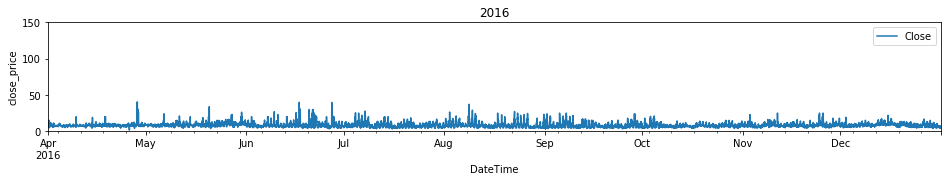

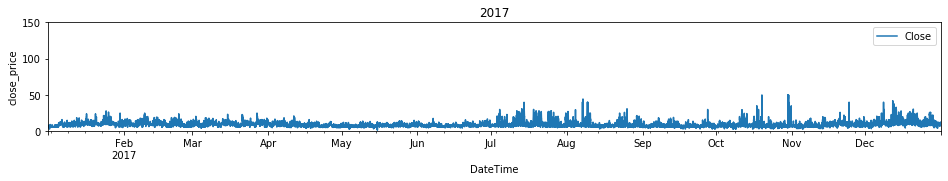

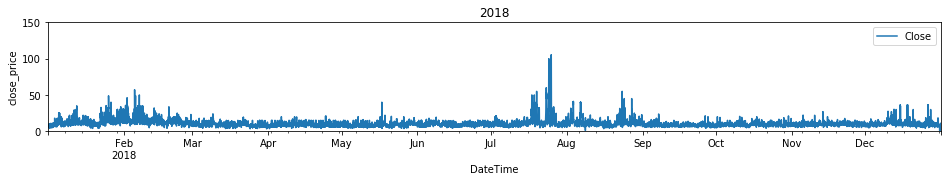

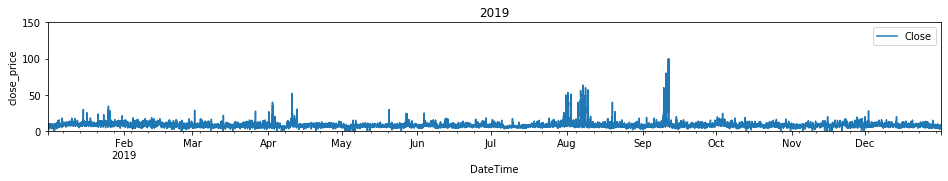

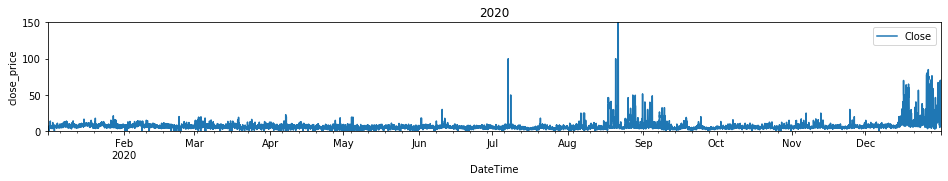

In [37]:
#  Plot close price for a year

years = [2016, 2017, 2018, 2019, 2020]

for year in years:
    start = str(year) + "-01-01 00:00:00"
    end = str(year) + "-12-31 23:30:00"
    close_price_graph_y = close_price_graph[np.logical_and(start < close_price_graph.index, close_price_graph.index <= end)]

    fig, ax = plt.subplots(1, figsize=plt.figaspect(.05))
    close_price_graph_y.plot(ax=ax)
    ax.set_ylim(0, 150)
    ax.set(title=year, ylabel="close_price", xlabel="DateTime");

Can obsearve price spices which tend to be happend from Augast to September, especially since 2018

Let's try to see one more detailed trends to see weekly seasonality.

In [38]:
# Make the table for pivot
close_price_graph_table = close_price_graph
close_price_graph_table["Year"] = close_price_graph_table.index.year
close_price_graph_table["Month"] = close_price_graph_table.index.month
close_price_graph_table["Day"] = close_price_graph_table.index.day
close_price_graph_table["Time"] = close_price_graph_table.index.time
close_price_graph_table = close_price_graph_table.reset_index()
close_price_graph_table = close_price_graph_table.drop("DateTime", axis=1)
close_price_graph_table.head()

Close  Year  Month  Day      Time
0   7.69  2016      4    1  00:00:00
1   7.45  2016      4    1  00:30:00
2   7.21  2016      4    1  01:00:00
3   7.06  2016      4    1  01:30:00
4   7.21  2016      4    1  02:00:00

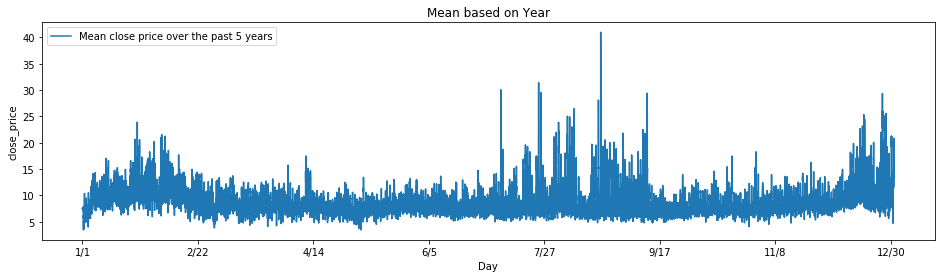

In [39]:
# Plot Average close price for each time slot based on Year
close_price_graph_table_yearly = pd.DataFrame(close_price_graph_table.pivot(index=['Month', 'Day', 'Time'], columns='Year', values='Close'))
year_col = close_price_graph_table_yearly.loc[: , "2016":"2020"]
close_price_graph_table_yearly["Mean"] = year_col.mean(axis=1)
close_price_graph_table_yearly["Date"] = close_price_graph_table_yearly.index.get_level_values('Month').astype(str) + "/" + close_price_graph_table_yearly.index.get_level_values('Day').astype(str) 
close_price_graph_table_yearly = close_price_graph_table_yearly.drop(years, axis=1)
close_price_graph_table_yearly = close_price_graph_table_yearly.reset_index()
close_price_graph_table_yearly = close_price_graph_table_yearly.drop(["Month", "Day", "Time"], axis=1)
close_price_graph_table_yearly = close_price_graph_table_yearly.set_index("Date")

                                                                      
fig, ax = plt.subplots(1, figsize=plt.figaspect(.25))
close_price_graph_table_yearly.plot(ax=ax)
ax.legend(["Mean close price over the past 5 years"], loc="upper left")
ax.set(title="Mean based on Year", ylabel="close_price", xlabel="Day");

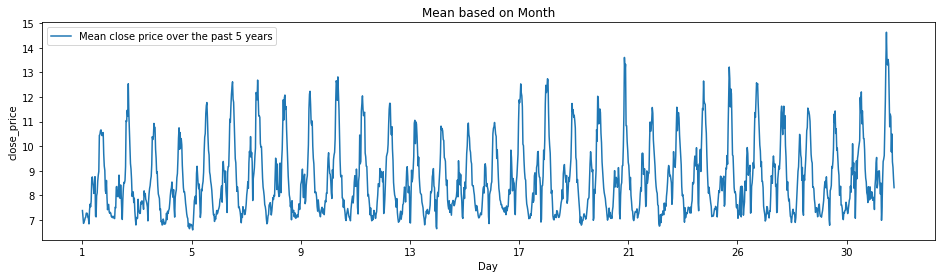

In [40]:
# Plot Average close price for each time slot based on Month
close_price_graph_table_monthly = pd.DataFrame(close_price_graph_table.pivot(index=['Day', 'Time'], columns=['Year', 'Month'], values='Close'))
month_col = close_price_graph_table_monthly.loc[: , :]
close_price_graph_table_monthly["Mean"] = month_col.mean(axis=1)
month_col = month_col.drop("Mean", axis=1)
close_price_graph_table_monthly = close_price_graph_table_monthly.drop(month_col, axis=1)
close_price_graph_table_monthly["Date"] = close_price_graph_table_monthly.index.get_level_values('Day').astype(str)
close_price_graph_table_monthly = close_price_graph_table_monthly.reset_index()
close_price_graph_table_monthly = close_price_graph_table_monthly.drop(["Day", "Time"], axis=1)
close_price_graph_table_monthly = close_price_graph_table_monthly.set_index("Date")
# close_price_graph_table_monthly = close_price_graph_table_monthly.drop(["Month"], axis=1)


fig, ax = plt.subplots(1, figsize=plt.figaspect(.25))
close_price_graph_table_monthly.plot(ax=ax)
ax.legend(["Mean close price over the past 5 years"], loc="upper left")
ax.set(title="Mean based on Month", ylabel="close_price", xlabel="Day");

Daily seasonality can be seen here (There are 31 waves once a month)

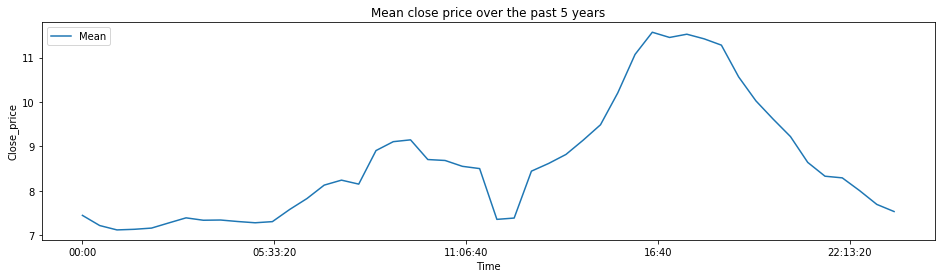

In [41]:
# Plot Average close price for each time slot based on Days(Looking at weekly seasonality)
import matplotlib.ticker as plticker
import matplotlib as mpl
import matplotlib.dates as mdates

close_price_graph_table_daily = pd.DataFrame(close_price_graph_table.pivot(index=['Time'], columns=['Year', 'Month', 'Day'], values='Close'))
day_col = close_price_graph_table_daily.loc[: , :]
close_price_graph_table_daily["Mean"] = day_col.mean(axis=1)
day_col = day_col.drop("Mean", axis=1)
close_price_graph_table_daily = close_price_graph_table_daily.drop(month_col, axis=1)
close_price_graph_table_daily = close_price_graph_table_daily.reset_index()
close_price_graph_table_daily = close_price_graph_table_daily.set_index("Time")


fig, ax = plt.subplots(1, figsize=plt.figaspect(.25))
close_price_graph_table_daily.plot(ax=ax)
ax.legend(["Mean"], loc="upper left")
# ax.xaxis.set_major_locator(mdates.HourLocator(byhour=range(0, 24, 1)))
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
ax.set(title="Mean close price over the past 5 years", ylabel="Close_price", xlabel="Time");

Regarding daily seasonality, the close price tend to be high 

※グラフのX軸はいずれ修正！！<p>
-->Seasonalityを確認したは良いが、これをどのようにモデルに反映させるのか。。。

ここからは各30min値を"Items"と捉える
-->１日ごとに平均値を出し、平均値の値動きを見てみる

In [42]:
close_price.reset_index(inplace=True)

In [43]:
close_HH_table = pd.DataFrame(close_price.pivot(index='Date', columns='HH', values='Close'))

In [44]:
col = close_HH_table.loc[: , 0:48]

In [45]:
col.head()

HH                1         2         3         4         5         6   \
Date                                                                     
2016-04-01  7.690000  7.450000  7.210000  7.060000  7.210000  7.210000   
2016-04-02  7.500000  6.780000  6.938571  7.097143  7.255714  7.414286   
2016-04-03  6.506667  6.613333  6.720000  6.826667  6.933333  7.040000   
2016-04-04  6.496250  6.487500  6.478750  6.470000  6.465000  6.460000   
2016-04-05  7.000000  7.000000  7.000000  7.000000  7.000000  6.430000   

HH                7         8     9         10        11        12        13  \
Date                                                                           
2016-04-01  7.210000  7.210000  7.06  7.060000  7.210000  7.290000  7.670000   
2016-04-02  7.572857  7.731429  7.89  8.048571  8.207143  8.365714  8.524286   
2016-04-03  7.146667  7.253333  7.36  7.466667  7.573333  7.680000  7.786667   
2016-04-04  6.510000  6.520000  6.54  6.510000  6.600000  6.520000  6.560000   
2016-04-05  6.480000  6.520000  6.51  6.530000  6.460000  7.260000  7.506667   

HH                14        15    16    17         18        19         20  \
Date                                                                         
2016-04-01  7.670000  7.920000  7.92  5.00  15.000000  9.000000  11.000000   
2016-04-02  8.682857  8.841429  9.00  6.00   7.000000  7.720000   6.000000   
2016-04-03  7.893333  8.000000  8.00  8.00   7.000000  7.000000   7.000000   
2016-04-04  8.120000  8.120000  8.12  8.12   8.531429  8.942857   9.354286   
2016-04-05  7.753333  8.000000  8.00  6.49   6.230000  5.910000   6.080000   

HH                21         22         23     24    25    26     27     28  \
Date                                                                          
2016-04-01  5.000000   5.000000   8.000000   8.00  8.00  8.00   8.00   8.00   
2016-04-02  6.000000   6.000000   6.000000   6.00  6.00  6.00   6.00   6.00   
2016-04-03  7.000000   7.000000   7.000000   7.00  6.63  6.63   6.63   6.63   
2016-04-04  9.765714  10.177143  10.588571  11.00  8.50  8.50  10.00  10.00   
2016-04-05  7.000000   7.000000   7.000000   5.46  6.40  6.40   7.00   7.00   

HH             29     30     31     32     33     34     35     36      37  \
Date                                                                         
2016-04-01   8.18   8.01   8.00   8.00   8.00  11.04   8.00   8.00  12.000   
2016-04-02   6.00   9.00   6.00  11.00   7.72   7.72   8.00  11.00   8.000   
2016-04-03   7.00   7.00   6.84   6.84   6.84   6.84   6.84   6.84   8.290   
2016-04-04  10.00  10.00  10.00  10.00  10.00  10.00  10.00  10.00   9.625   
2016-04-05   7.00   7.00   7.00   7.00   7.00   7.00   7.00   8.63   9.000   

HH             38     39    40    41    42     43    44       45      46  \
Date                                                                       
2016-04-01  12.00  8.500  8.50  8.50  8.50  10.00  8.09  7.99000  8.1400   
2016-04-02   8.05  7.710  7.71  8.00  6.55   6.16  6.30  6.40000  6.4500   
2016-04-03   8.29  8.290  8.29  7.29  6.84   8.00  6.54  6.53125  6.5225   
2016-04-04   9.25  8.875  8.50  8.50  8.00   7.50  7.00  7.00000  7.0000   
2016-04-05   8.90  8.000  7.83  8.00  8.00   8.50  8.00  6.46000  6.4300   

HH               47     48  
Date                        
2016-04-01  8.14000  8.160  
2016-04-02  6.44000  6.400  
2016-04-03  6.51375  6.505  
2016-04-04  7.00000  7.000  
2016-04-05  7.00000  7.000

In [46]:
# Add mean on the table
close_HH_table["mean"] = col.mean(axis=1)

In [47]:
close_HH_table.tail()

HH              1      2      3      4      5      6      7      8      9  \
Date                                                                        
2020-12-27  20.79  17.00  14.90  14.90  14.90  14.90  14.90  14.90   5.00   
2020-12-28   9.58   4.00   4.18   4.18   4.29   4.29  17.45  14.90  14.90   
2020-12-29   5.49   4.00  10.01  14.90  14.90  14.90  13.82  14.01  13.90   
2020-12-30  16.98  16.28  16.04  15.99  18.62  18.62  18.62  15.10  15.07   
2020-12-31  35.00  35.00  35.00  35.00  25.00  19.12  25.01  25.01  25.01   

HH             10     11     12     13     14     15     16     17     18  \
Date                                                                        
2020-12-27   7.27   7.29   7.93  14.90  20.79  50.00  49.00  17.31  14.90   
2020-12-28  14.90  14.90  14.90  33.74  37.90  61.29  76.50  75.00  75.10   
2020-12-29  13.87  13.60  14.90  17.00  15.19  26.64  29.64  18.98  15.07   
2020-12-30  15.00  15.94  15.80  16.37  16.76  24.90  29.90  34.90  35.90   
2020-12-31  25.01  25.00  19.12  37.00  30.76  42.00  36.94  30.04  16.20   

HH             19     20     21     22     23     24     25     26     27  \
Date                                                                        
2020-12-27  14.81  14.90  14.90  14.90   5.25  15.00   7.23  15.10  20.00   
2020-12-28  75.10  60.01  44.93  30.00  23.38  14.90  10.00   9.90   7.12   
2020-12-29  14.90  14.90   9.55   7.41   3.77   3.31   3.77   3.14   7.15   
2020-12-30  28.46  22.39  19.97  19.97  16.66  15.52  15.83  14.06  11.40   
2020-12-31  14.90   8.25  23.99  15.83   6.47   5.22   6.39  19.00  10.20   

HH             28     29     30     31     32     33     34     35     36  \
Date                                                                        
2020-12-27  20.00  14.90  21.00  19.30  25.20  14.90  14.90  18.00  18.00   
2020-12-28   6.22  14.82   7.00  28.23  30.49  23.51  58.99  29.97  30.00   
2020-12-29   7.53   8.18   9.64   9.38  12.77  15.80  34.57  37.48  46.46   
2020-12-30  17.84  14.00  15.00  16.00  19.00  24.30  35.00  39.00  64.58   
2020-12-31   6.19  15.33  15.30  17.49  19.44  31.44  49.90  45.00  60.00   

HH             37     38     39     40     41     42     43     44     45  \
Date                                                                        
2020-12-27  20.00  38.58  38.56  70.65  68.57  50.00  39.77  33.49  29.22   
2020-12-28  16.20  35.09  29.97  14.90  30.09  25.09  14.81  14.90   9.24   
2020-12-29  34.04  35.00  29.59  28.42  33.20  30.51  33.20  14.90   9.90   
2020-12-30  39.16  65.57  63.90  63.90  67.11  61.31  50.10  30.00  30.00   
2020-12-31  69.99  60.01  35.00  33.00  70.00  70.00  40.00  70.00  45.48   

HH             46     47     48       mean  
Date                                        
2020-12-27  25.82  14.90  21.00  22.092292  
2020-12-28  13.51  14.88  12.51  25.370000  
2020-12-29  29.82   4.05   4.18  16.819583  
2020-12-30  29.00  34.21  26.79  27.642083  
2020-12-31  41.33  36.66  26.46  31.031042

Text(0, 0.5, 'Close')

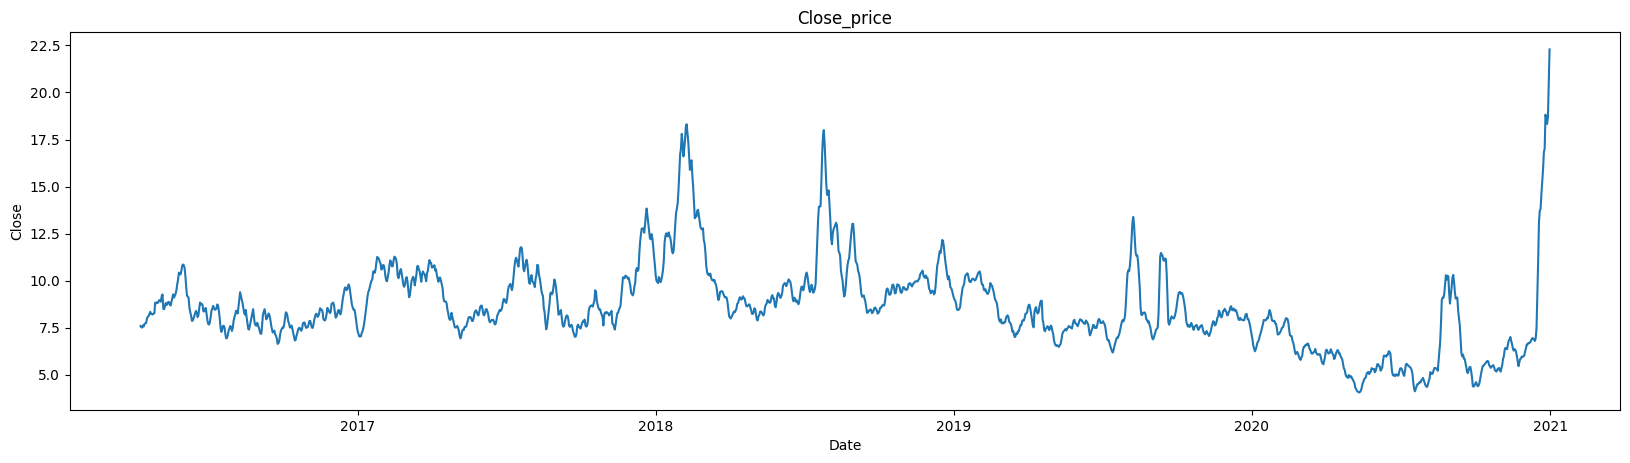

In [48]:
# Plot the daily mean of 48 close prices with smoothing.
rolling_times = 10
fig = plt.figure(figsize=(20,5),dpi=100)
color = plt.rcParams['axes.prop_cycle'].by_key()['color']

#cols = re_close_HH_table.columns[0:48:4] #[Start: End: interval]

#for col in cols:
plt.plot(close_HH_table["mean"].rolling(rolling_times).mean(), label=col)

plt.title('Close_price')
plt.xlabel('Date')
plt.ylabel('Close')
#plt.legend(loc='upper right', fontsize='xx-small')

Here, some price spices can be observed. (2018, 2019, 2021)

In [49]:
close_HH_table.describe()

HH               1            2            3            4            5  \
count  1736.000000  1736.000000  1736.000000  1736.000000  1736.000000   
mean      7.444437     7.215479     7.116997     7.130832     7.158119   
std       2.535417     2.358326     2.356395     2.394256     2.465318   
min       1.000000     1.540000     2.000000     1.540000     0.010000   
25%       5.830000     5.720000     5.600000     5.617500     5.620000   
50%       7.225000     7.000000     6.930000     7.000000     7.000000   
75%       8.792500     8.512500     8.355000     8.370000     8.480000   
max      35.000000    35.000000    35.000000    35.000000    48.100000   

HH               6            7            8            9           10  \
count  1736.000000  1736.000000  1736.000000  1736.000000  1736.000000   
mean      7.274605     7.388853     7.334980     7.340058     7.306103   
std       2.600815     2.733102     2.127037     2.769729     2.723942   
min       0.010000     2.120000     2.110000     1.440000     1.000000   
25%       5.710000     5.907500     5.907500     5.890000     5.940000   
50%       7.040000     7.150000     7.145000     7.030000     7.035000   
75%       8.520000     8.670000     8.600000     8.500000     8.420000   
max      65.110000    78.100000    25.010000    80.100000    75.110000   

HH              11           12           13           14           15  \
count  1736.000000  1736.000000  1736.000000  1736.000000  1736.000000   
mean      7.278019     7.303655     7.577723     7.823629     8.126510   
std       2.552629     2.348957     2.953689     3.384322     4.434317   
min       2.050000     1.970000     2.270000     0.490000     1.000000   
25%       5.700000     5.730000     5.817500     5.797500     5.747500   
50%       7.000000     7.015000     7.170000     7.350000     7.360000   
75%       8.490000     8.520000     8.922500     9.122500     9.170000   
max      58.120000    30.000000    60.010000    60.010000    61.290000   

HH              16           17           18           19           20  \
count  1736.000000  1736.000000  1736.000000  1736.000000  1736.000000   
mean      8.238796     8.149263     8.905467     9.105877     9.146926   
std       4.598807     4.040160     4.748047     4.849162     4.733608   
min       0.770000     0.010000     0.010000     0.010000     0.010000   
25%       5.907500     5.870000     6.300000     6.287500     6.120000   
50%       7.410000     7.500000     8.050000     8.270000     8.405000   
75%       9.390000     9.610000    10.202500    10.642500    10.925000   
max      76.500000    75.000000    75.100000    75.100000    60.010000   

HH              21           22           23           24           25  \
count  1736.000000  1736.000000  1736.000000  1736.000000  1736.000000   
mean      8.703154     8.681986     8.550379     8.499280     7.354654   
std       4.084984     4.359732     4.256228     4.416546     3.401098   
min       0.010000     0.010000     0.010000     0.010000     0.010000   
25%       6.150000     6.100000     5.980000     5.927500     5.350000   
50%       8.035000     7.980000     7.965000     7.930000     7.000000   
75%      10.420000    10.500000    10.250000    10.300000     8.982500   
max      44.930000    50.000000    40.290000    53.430000    40.000000   

HH              26           27           28           29           30  \
count  1736.000000  1736.000000  1736.000000  1736.000000  1736.000000   
mean      7.384407     8.441503     8.615639     8.818041     9.140916   
std       3.639942     4.387907     4.328630     5.027862     4.903101   
min       0.010000     0.010000     0.010000     0.010000     0.010000   
25%       5.347500     5.850000     6.017500     5.990000     6.127500   
50%       7.000000     7.870000     8.000000     8.180000     8.280000   
75%       8.932500    10.160000    10.300000    10.590000    10.992500   
max      50.000000    50.000000    49.000000   100.000000    51.170000   

See line chart with rollling mean and standard error for some time slots

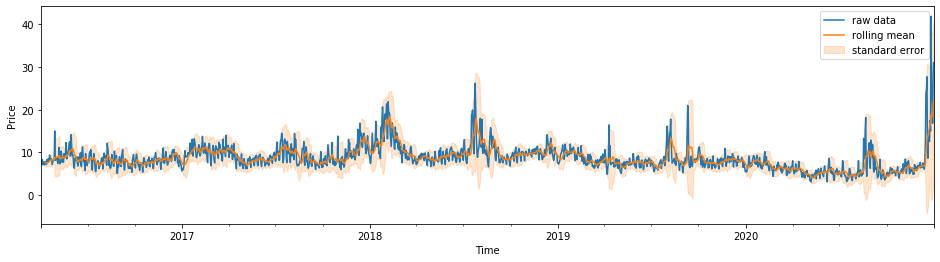

In [50]:
time_slot = 'mean' # 1-48 or 'mean'
window_length = 10 

fig, ax = plt.subplots(1, figsize=plt.figaspect(.25))
close_HH_table[time_slot].plot(ax=ax, label="raw data")
yt = close_HH_table[time_slot].rolling(window_length).mean()
yt.plot(ax=ax, label="rolling mean");
rolling_std = close_HH_table[time_slot].rolling(window_length).std()
ax.fill_between(close_HH_table[time_slot].index, yt + (2 * rolling_std), yt - (2 * rolling_std), alpha=0.2, color=u'#ff7f0e', label="standard error")
ax.set(ylabel="Price", xlabel="Time")
plt.legend();

Autocorrelation <p>
See correlatioin between original price and lagged price

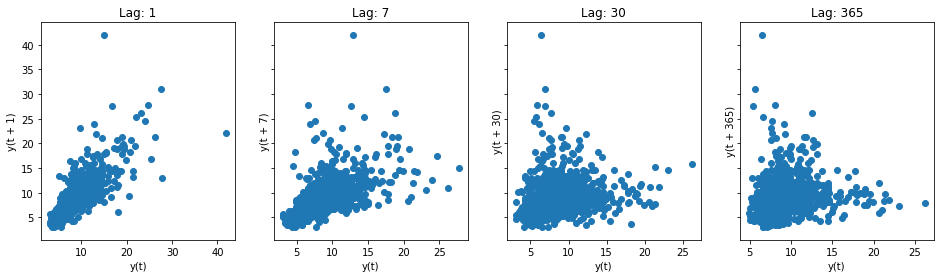

In [51]:
# lag plot daily basis in different time slot
from pandas.plotting import lag_plot
lags = [1, 7, 30, 365]
fig, axs = plt.subplots(ncols=4, figsize=plt.figaspect(.25), sharey=True)
for k, lag in enumerate(lags):
    ax = axs[k]
    lag_plot(close_HH_table['mean'], lag=lag, ax=ax)
    ax.set_title(f"Lag: {lag}")

分散が大きくなっている -->相関が薄くなっている？

In [52]:
close_price["index"] = np.trunc(close_price['Date'].map(pd.Timestamp.timestamp).astype(int) / 86400 - 16891)

In [53]:
close_price_lag = close_price
close_price_lag["index"] = close_price.index
close_price_lag.set_index("index")
close_price_lag = close_price_lag.drop(["Date", "HH"], axis=1)
close_price_lag = close_price_lag[["index", "Close"]]

In [54]:
close_price_lag.shape

(83328, 2)

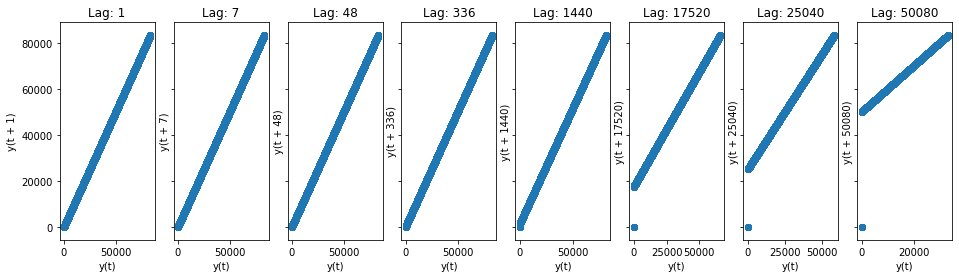

In [55]:
# lag plot HH basis for every close price
from pandas.plotting import lag_plot
lags = [1, 7, 48, 336, 1440, 17520, 25040, 50080]
fig, axs = plt.subplots(ncols=8, figsize=plt.figaspect(.25), sharey=True)
for k, lag in enumerate(lags):
    ax = axs[k]
    lag_plot(close_price_lag, lag=lag, ax=ax)
    ax.set_title(f"Lag: {lag}")

48HH --> 1day<p>
336HH --> 1week<p>
1440HH --> 1month<p>
17520HH --> 1year<p>
25040HH --> 2years<p>
50080HH --> 4year<p>

相関はあるがラグが大きくなるにつれて低くなっていく
-->1年を超えたあたりから<p>
-->どのあたりから変化があるのか相関係数の推移を見てみる

In [56]:
# Function for computing autocorrelation between original value and lagged value
def compute_autocorr(x, lags=None):
    """
    Estimate autocorrelation for time series x and given lags
    
    References
    ----------
    ..[1] Time-Series Analysis: Forecasting and Control, 4th ed. (Box, Jenkins, Reinsel), p. 31
    """
    
    x = np.asarray(x) 
    n_timepoints = x.shape[0]
    
    mu = x.mean()
    c_0 = np.var(x)  # np.std(x) * np.std(x)
    
    def corrcoef(k):
        """
        Estimate autocorrelation at lag k (sample autocorrelation function).
        """
        return np.sum((x[:-k] - mu) * (x[k:] - mu)) / n_timepoints / c_0
    
    lags = np.arange(1, n_timepoints)
    
    return np.array([1] + [corrcoef(lag) for lag in lags])

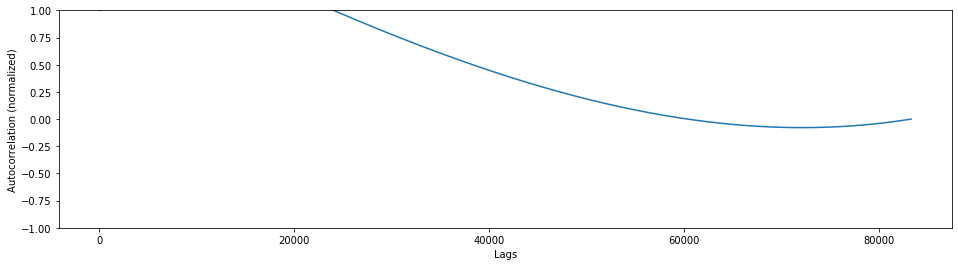

In [57]:
fig, ax = plt.subplots(1, figsize=plt.figaspect(.25))
rho = compute_autocorr(close_price_lag)
ax.plot(rho)
ax.set(ylim=(-1, 1), xlabel="Lags", ylabel="Autocorrelation (normalized)");

やはり1年(17500HH)を超えたあたりから相関は低くなっていく<p>
-->ただし、負の相関に触れることはないみたい。あくまで無相関へ収束

close_HH_tableに対してもSeasonalityとTrendを確認してみる

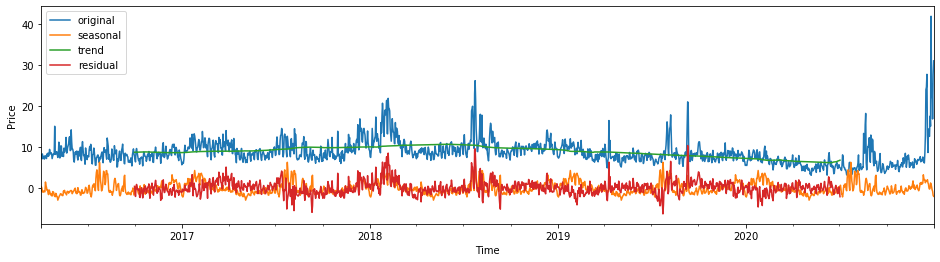

In [58]:
from statsmodels.tsa.seasonal import seasonal_decompose
from sktime.datasets import load_airline

time_slot = 'mean' # Choose time slot 1-48 or mean

y = close_HH_table[time_slot]  # daily data
sp = 365  # seasonal periodicity, or periods per year

decomposition = seasonal_decompose(y, model="additive", period=sp)

fig, ax = plt.subplots(1, figsize=plt.figaspect(.25))
y.plot(ax=ax, label="original")
decomposition.seasonal.plot(ax=ax, label="seasonal")
decomposition.trend.plot(ax=ax, label="trend")
decomposition.resid.plot(ax=ax, label="residual")
ax.set(xlabel="Time", ylabel="Price")
plt.legend();

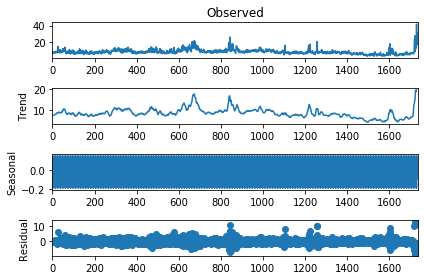

In [59]:
# データをトレンドと季節成分に分解
seasonal_decompose_res = sm.tsa.seasonal_decompose(y.values, freq=12).plot()
#seasonal_decompose_res.plot()

やはりTrendは確認できない(Seasonalityはこの手法では確認できないが上記別途確認済み)

下記では対数化したClose priceのボラティリティを確認

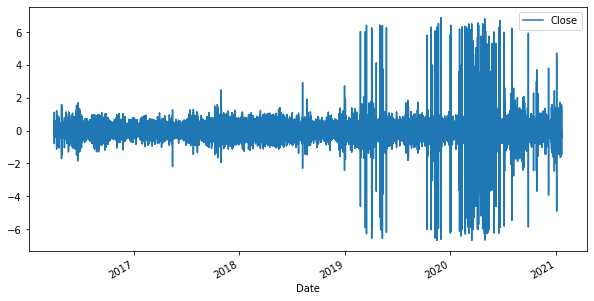

In [60]:
# Plot logarithmic return (対数リターン)下落率と上昇率を同等に扱う 
intraprice = df_intra
intraprice = intraprice.set_index(["Date", "HH"])
intraprice = intraprice[["Close"]]
rets = np.log(intraprice / intraprice.shift(1))
rets.reset_index(inplace = True)
rets.drop("HH", axis=1, inplace=True)
rets = rets.set_index("Date")
rets.dropna(inplace=True)
rets.plot(subplots=True, figsize=(10, 5));

可能であれば、2019年からなぜボラが上がったのか検証
→再生可能エネルギの総需要に対する比率の推移をみていく

In [61]:
intraprice.describe()

Close
count  84209.000000
mean       9.553096
std       11.992722
min        0.010000
25%        6.140000
50%        7.990000
75%       10.000000
max      260.310000

### Trading vollume from 2014 to 2019

In [62]:
print(df_intra.isnull().sum())

Date                   0
HH                     0
Open                  72
High                  72
Low                   72
Close                 72
Average               72
Volume(MWh/h)         72
Volume(Tick count)     0
dtype: int64


In [63]:
df_intra["Volume(MWh/h)"].fillna(0, inplace=True)

In [64]:
df_intra.head()

Date  HH  Open  High   Low  Close  Average  Volume(MWh/h)  \
0 2016-04-01   1  7.69  7.69  7.69   7.69     7.69            0.7   
1 2016-04-01   2   NaN   NaN   NaN    NaN      NaN            0.0   
2 2016-04-01   3  7.21  7.21  7.21   7.21     7.21            0.8   
3 2016-04-01   4  7.06  7.06  7.06   7.06     7.06            0.8   
4 2016-04-01   5  7.21  7.21  7.21   7.21     7.21            0.8   

   Volume(Tick count)  
0                   1  
1                   0  
2                   1  
3                   1  
4                   1

Mean of the volume on each item

In [65]:
df_intra_HHvol_mean =  df_intra.groupby("HH").agg({"Volume(MWh/h)": 'mean', "Volume(Tick count)": 'mean'}).reset_index()
df_intra_HHvol_mean = df_intra_HHvol_mean.set_index("HH")
df_intra_HHvol_mean.head()

Volume(MWh/h)  Volume(Tick count)
HH                                   
1      155.934909           46.953303
2      158.440547           46.451595
3      155.112813           45.703303
4      158.398519           45.483485
5      166.506777           46.639522

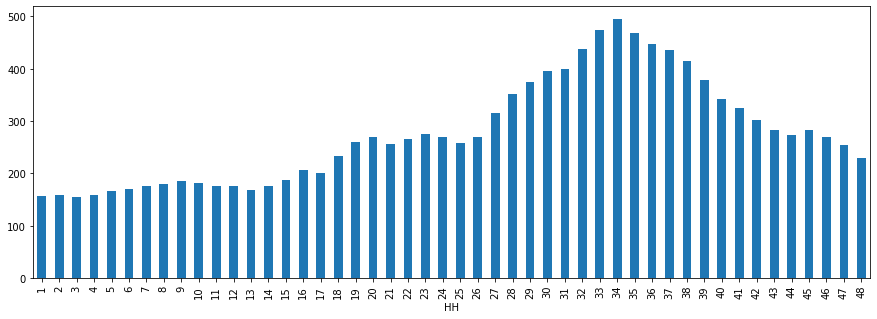

In [66]:
df_intra_HHvol_mean["Volume(MWh/h)"].plot.bar(figsize=(15, 5));

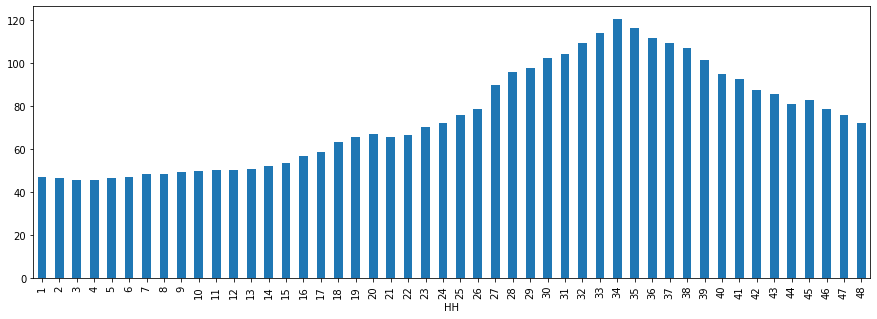

In [67]:
df_intra_HHvol_mean["Volume(Tick count)"].plot.bar(figsize=(15, 5));

Median of the volume on each item

In [68]:
df_intra_HHvol_median =  df_intra.groupby("HH").agg({"Volume(MWh/h)": 'median', "Volume(Tick count)": 'median'}).reset_index()
df_intra_HHvol_median = df_intra_HHvol_median.set_index("HH")
df_intra_HHvol_median.head()

Volume(MWh/h)  Volume(Tick count)
HH                                   
1           89.40                42.0
2           86.50                41.0
3           89.00                41.0
4           88.95                40.0
5           95.75                41.0

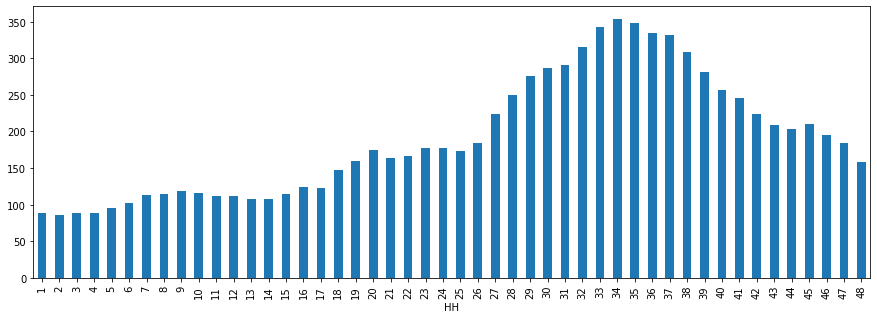

In [69]:
df_intra_HHvol_median["Volume(MWh/h)"].plot.bar(figsize=(15, 5));

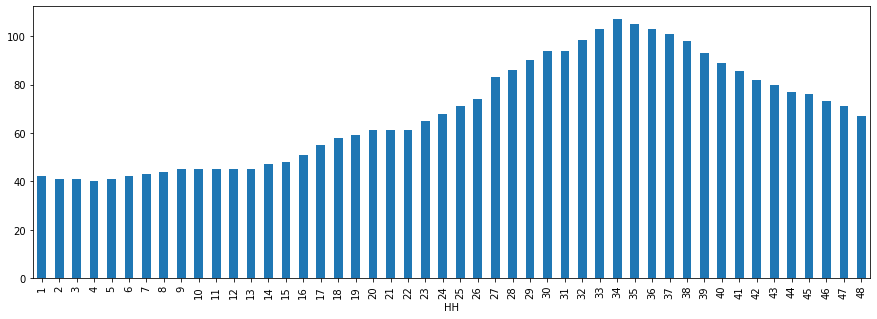

In [70]:
df_intra_HHvol_median["Volume(Tick count)"].plot.bar(figsize=(15, 5));

This shape is similar to daily basis avarage close price

In [71]:
df_intra_dayvolume = df_intra.groupby("Date").agg({"Volume(MWh/h)": 'sum', "Volume(Tick count)": 'sum'}).reset_index()
df_intra_dayvolume = df_intra_dayvolume.iloc[-200:]
df_intra_dayvolume = df_intra_dayvolume.set_index("Date")
df_intra_dayvolume.tail()

Volume(MWh/h)  Volume(Tick count)
Date                                         
2021-01-16        18768.8                4727
2021-01-17        23346.0                4340
2021-01-18        19692.8                4700
2021-01-19        17527.7                3977
2021-01-20        28011.7                5140

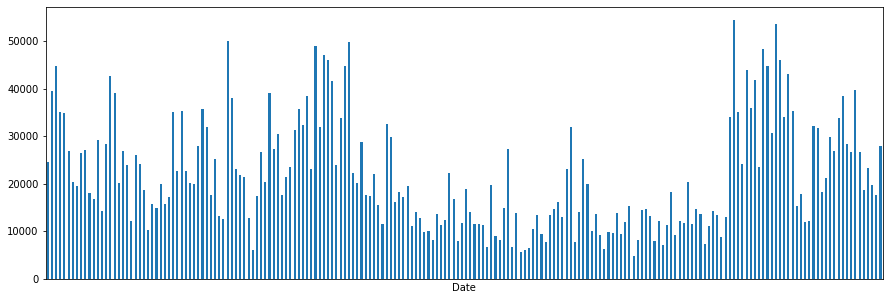

In [72]:
import matplotlib.dates as mdates

# 描画
fig, ax = plt.subplots(figsize=(15, 5))
df_intra_dayvolume['Volume(MWh/h)'].plot.bar(  # indexがx軸に。各columnが各線に。
    ax=ax,
    rot=True,  # 指定しない場合、ラベルが横倒しになる
    legend=False,  # 凡例OFF
)

# 軸目盛の設定
ax.xaxis.set_major_locator(mdates.DayLocator(bymonthday=None, tz=None))
plt.show()

#df_intra_dayvolume["Volume(MWh/h)"].plot.bar(interval=7, figsize=(15, 5));

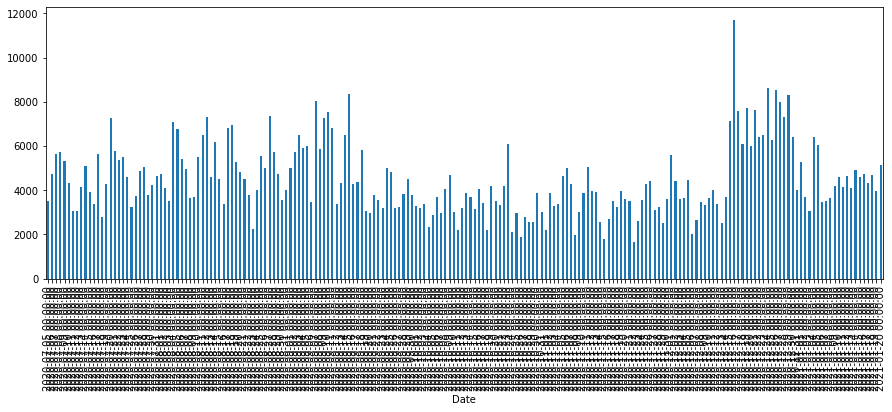

In [73]:
df_intra_dayvolume["Volume(Tick count)"].plot.bar(figsize=(15, 5));

### Other EDA

ここではもっとデータを見てもいい。例えば、<p>
- 価格データの季節性、定常性、など <p>
- 対数化もしくは正則化 (参照：https://uribo.github.io/practical-ds/02/numeric.html) 
- 外れ値　など

- See distribution of "Close"

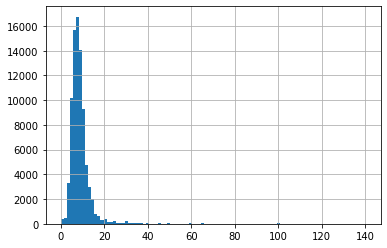

In [74]:
df_intra['Close'].hist(bins=100, range=(0, 140), rwidth=1.0)

-->Negative skew, outliers, positive price only

- See the correlation between Spot price in different area and "Close" price.

In [75]:
# marge all the spot datasets
spot_area = pd.concat([df_spot_2016, df_spot_2017])
spot_area = pd.concat([spot_area, df_spot_2018])
spot_area = pd.concat([spot_area, df_spot_2019])
spot_area = pd.concat([spot_area, df_spot_2020])

spot_area = spot_area.drop(['売り入札量(kWh)', '買い入札量(kWh)', '約定総量(kWh)', 'Unnamed: 15', 'スポット・時間前平均価格(円/kWh)',
       'α上限値×スポット・時間前平均価格(円/kWh)', 'α下限値×スポット・時間前平均価格(円/kWh)',
       'α速報値×スポット・時間前平均価格(円/kWh)', 'α確報値×スポット・時間前平均価格(円/kWh)', 'Unnamed: 21',
       '回避可能原価全国値(円/kWh)', '回避可能原価北海道(円/kWh)', '回避可能原価東北(円/kWh)',
       '回避可能原価東京(円/kWh)', '回避可能原価中部(円/kWh)', '回避可能原価北陸(円/kWh)',
       '回避可能原価関西(円/kWh)', '回避可能原価中国(円/kWh)', '回避可能原価四国(円/kWh)',
       '回避可能原価九州(円/kWh)'], axis=1)

spot_area = spot_area.rename(columns={'年月日': 'Date', '時刻コード': 'HH', 
                                  'システムプライス(円/kWh)': 'System_price(Yen/kWh)', 
                                  'エリアプライス北海道(円/kWh)': 'Price_Hokkaido(Yen/kWh)',
                                  'エリアプライス東北(円/kWh)': 'Price_Tohoku(Yen/kWh)',
                                  'エリアプライス東京(円/kWh)': 'Price_Tokyo(Yen/kWh)',
                                  'エリアプライス中部(円/kWh)': 'Price_Chubu(Yen/kWh)',
                                  'エリアプライス北陸(円/kWh)': 'Price_Hokuriku(Yen/kWh)',
                                  'エリアプライス関西(円/kWh)': 'Price_Kansai(Yen/kWh)',
                                  'エリアプライス中国(円/kWh)': 'Price_Chugoku(Yen/kWh)',
                                  'エリアプライス四国(円/kWh)': 'Price_Shikoku(Yen/kWh)',
                                  'エリアプライス九州(円/kWh)': 'Price_Kyushu(Yen/kWh)'})

spot_area["Date"] = pd.to_datetime(spot_area["Date"])

In [76]:
intra_close = df_intra[['Date', 'HH', 'Close']]
intra_close["Date"] = pd.to_datetime(intra_close["Date"])

In [77]:
spot_intra = pd.merge(spot_area, intra_close,  how='left', on=['Date', 'HH'])

In [78]:
spot_intra = spot_intra.drop("HH", axis=1)

In [79]:
spot_intra = spot_intra[spot_intra["Date"] <= "2020/12/31"]

In [80]:
spot_intra.fillna(0, inplace=True)
print(spot_intra.isnull().sum())

Date                       0
System_price(Yen/kWh)      0
Price_Hokkaido(Yen/kWh)    0
Price_Tohoku(Yen/kWh)      0
Price_Tokyo(Yen/kWh)       0
Price_Chubu(Yen/kWh)       0
Price_Hokuriku(Yen/kWh)    0
Price_Kansai(Yen/kWh)      0
Price_Chugoku(Yen/kWh)     0
Price_Shikoku(Yen/kWh)     0
Price_Kyushu(Yen/kWh)      0
Close                      0
dtype: int64


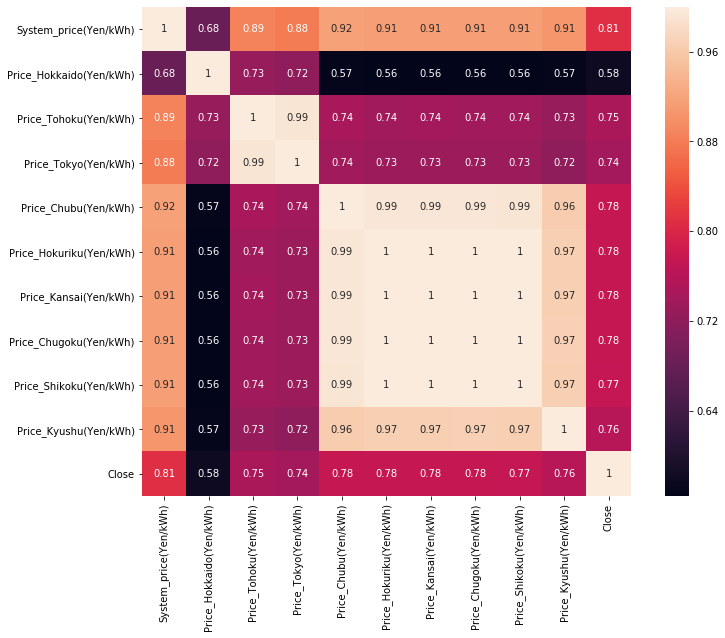

In [81]:
# correlation matrix
corrmat = spot_intra.corr()
f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, square=True, annot=True, annot_kws={'size': 10});

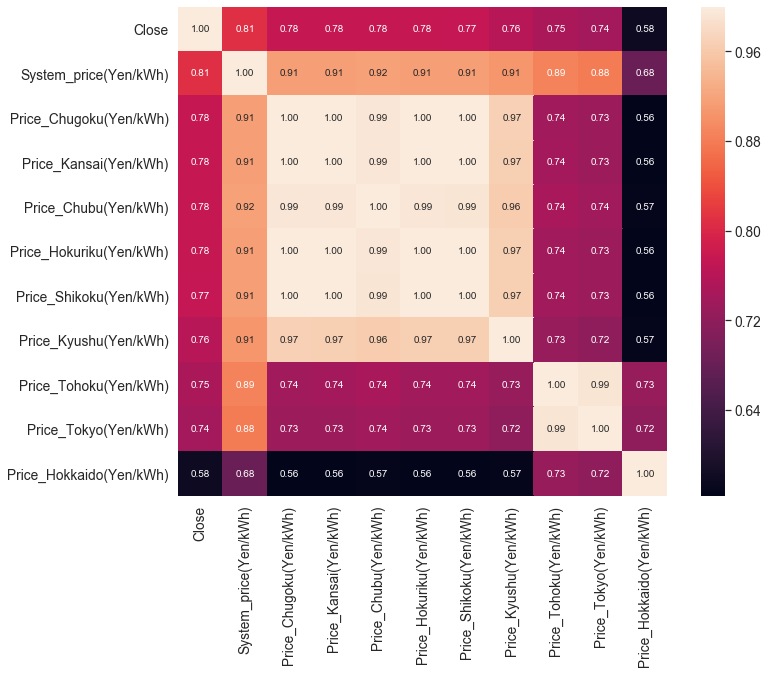

In [82]:
# Close price correlation matrix
k = 11 # The number of variables on the heatmap
cols = corrmat.nlargest(k, 'Close')['Close'].index
cm = np.corrcoef(spot_intra[cols].values.T)
sns.set(font_scale=1.25)
f, ax = plt.subplots(figsize=(12,9))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

There is no huge difference of correlation between Close price and each area <p>
--> I will choose "Tohoku area" to pick up weather and other data because this area has larger proportion for installed renewable energy compared to other areas.

※代替案があるとすれば、全国平均の天気情報(入手可能か確認が必要。最悪全地点のデータを取得して平均を出す。しかしこれはかなり労力がいるため奥の手)

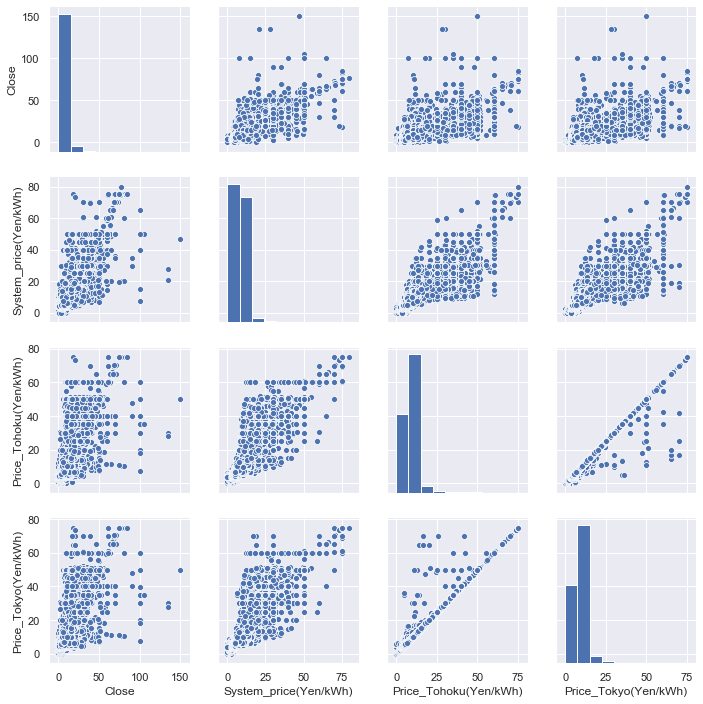

In [83]:
# scatterplot
sns.set()
cols = ['Close', 'System_price(Yen/kWh)', 'Price_Tohoku(Yen/kWh)', 'Price_Tokyo(Yen/kWh)']
sns.pairplot(spot_intra[cols], size=2.5)
plt.show()

Price: Neagtive skew <p>
Other: It seems linear relation each other, especially Tohoku and Tokyo

## Weather data (Tohoku area)
https://www.data.jma.go.jp/gmd/risk/obsdl/index.php

データを価格データと結合後、欠損値を条件付きで埋めていく方法

Dateを日付と時間に分割

必要な列を抽出

HH_tableを適用（当データにHH_tableを結合）

データ統合後、欠損値を各列ごとに埋めていく

In [84]:
#Read all the weather data in Tohoku area

df_weather_Aomori = pd.read_csv('/Users/kenotsu/Documents/master_thesis/Datasets/Master_thesis/Weather/Weather_Aomori.csv', sep=',', header=0, encoding='cp932')
df_weather_Akita = pd.read_csv('/Users/kenotsu/Documents/master_thesis/Datasets/Master_thesis/Weather/Weather_Akita.csv', sep=',', header=0, encoding='cp932')
df_weather_Morioka = pd.read_csv('/Users/kenotsu/Documents/master_thesis/Datasets/Master_thesis/Weather/Weather_Morioka.csv', sep=',', header=0, encoding='cp932')
df_weather_Yamagata = pd.read_csv('/Users/kenotsu/Documents/master_thesis/Datasets/Master_thesis/Weather/Weather_Yamagata.csv', sep=',', header=0, encoding='cp932')
df_weather_Sendai = pd.read_csv('/Users/kenotsu/Documents/master_thesis/Datasets/Master_thesis/Weather/Weather_Sendai.csv', sep=',', header=0, encoding='cp932')
df_weather_Fukushima = pd.read_csv('/Users/kenotsu/Documents/master_thesis/Datasets/Master_thesis/Weather/Weather_Fukushima.csv', sep=',', header=0, encoding='cp932')
df_weather_Niigata = pd.read_csv('/Users/kenotsu/Documents/master_thesis/Datasets/Master_thesis/Weather/Weather_Niigata.csv', sep=',', header=0, encoding='cp932')

In [85]:
print(df_weather_Aomori.shape)
print(df_weather_Akita.shape)
print(df_weather_Morioka.shape)
print(df_weather_Yamagata.shape)
print(df_weather_Sendai.shape)
print(df_weather_Fukushima.shape)
print(df_weather_Niigata.shape)

(41664, 16)
(41664, 16)
(41664, 16)
(41664, 16)
(41664, 16)
(41664, 16)
(41664, 16)


In [86]:
# marge all the spot datasets
df_weather_all = pd.merge(df_weather_Aomori, df_weather_Akita, how='left', on=['Date'])
df_weather_all = pd.merge(df_weather_all, df_weather_Morioka, how='left', on=['Date'])
df_weather_all = pd.merge(df_weather_all, df_weather_Yamagata, how='left', on=['Date'])
df_weather_all = pd.merge(df_weather_all, df_weather_Sendai, how='left', on=['Date'])
df_weather_all = pd.merge(df_weather_all, df_weather_Fukushima, how='left', on=['Date'])
df_weather_all = pd.merge(df_weather_all, df_weather_Niigata, how='left', on=['Date'])
print(df_weather_all.shape)

(41664, 106)


In [87]:
#Drop the columns that are not necessary
a = [item for item in df_weather_all.columns if item.find('Qual') != -1 or item.find('Num') != -1or item.find('None') != -1]
df_weather_all = df_weather_all.drop(columns=a)

In [88]:
# Replace/adjust the name of direction
df_weather_all = df_weather_all.replace({'北西)': '北西', '南東)': '南東', '東南東)': '東南東', '南)': '南'})

# Categolize direction
df_weather_all = df_weather_all.replace({'静穏': '0', '北': '1', '北北東': '2', '北東': '3', 
                                        '東北東': '4', '東': '5', '東南東': '6', '南東': '7', '南南東': '8', 
                                        '南': '9', '南南西': '10', '南西': '11', '西南西': '12', 
                                        '西': '13', '西北西': '14', '北西': '15', '北北西': '16'})

In [89]:
df_weather_all["Time"] = pd.to_datetime(df_weather_all["Date"]).dt.time
df_weather_all["Date"] = pd.to_datetime(df_weather_all["Date"]).dt.date
df_weather_all["Date"] = pd.to_datetime(df_weather_all["Date"])

In [90]:
cols = [item for item in df_weather_all.columns if item.find('WindDirection') != -1]
df_weather_all[cols] = df_weather_all[cols].apply(pd.to_numeric)

In [91]:
df_weather_all.head()

Date  Temp_Ao  SunLight(Time)_Ao  WindSpeed(m/s)_Ao  WindDirection_Ao  \
0 2016-04-01      2.1                0.0                2.4              10.0   
1 2016-04-01      1.5                0.0                1.5              11.0   
2 2016-04-01      1.2                0.0                0.3               6.0   
3 2016-04-01      0.4                0.0                1.7              10.0   
4 2016-04-01      0.1                0.0                1.5              11.0   

   SunLight(MJ/㎡)_Ao  Temp_Aki  SunLight(Time)_Aki  WindSpeed(m/s)_Aki  \
0                0.0       3.5                 0.0                 1.9   
1                0.0       3.4                 0.0                 2.5   
2                0.0       3.2                 0.0                 2.4   
3                0.0       2.5                 0.0                 1.9   
4                0.0       2.1                 0.0                 1.5   

   WindDirection_Aki  SunLight(MJ/㎡)_Aki  Temp_Mo  SunLight(Time)_Mo  \
0                6.0                 0.0      0.9                0.0   
1                5.0                 0.0      0.2                0.0   
2                6.0                 0.0      0.1                0.0   
3                5.0                 0.0      0.4                0.0   
4                6.0                 0.0     -0.8                0.0   

   WindSpeed(m/s)_Mo  WindDirection_Mo  SunLight(MJ/㎡)_Mo  Temp_Ya  \
0                0.8               2.0                0.0      4.6   
1                1.9               2.0                0.0      3.9   
2                3.0               2.0                0.0      3.3   
3                3.7               2.0                0.0      2.5   
4                2.1              16.0                0.0      2.3   

   SunLight(Time)_Ya  WindSpeed(m/s)_Ya  WindDirection_Ya  SunLight(MJ/㎡)_Ya  \
0                0.0                0.6              16.0                0.0   
1                0.0                1.0               7.0                0.0   
2                0.0                1.0               3.0                0.0   
3                0.0                0.1               0.0                0.0   
4                0.0                0.5               4.0                0.0   

   Temp_Se  SunLight(Time)_Se  WindSpeed(m/s)_Se  WindDirection_Se  \
0      6.6                0.0                3.1              16.0   
1      6.7                0.0                2.9              15.0   
2      7.0                0.0                3.4              15.0   
3      7.0                0.0                3.1              15.0   
4      6.3                0.0                1.7              15.0   

   SunLight(MJ/㎡)_Se  Temp_Fu  SunLight(Time)_Fu  WindSpeed(m/s)_Fu  \
0                0.0      6.5                0.0                0.9   
1                0.0      5.8                0.0                0.4   
2                0.0      5.2                0.0                0.7   
3                0.0      4.6                0.0                0.3   
4                0.0      4.0                0.0                0.8   

   WindDirection_Fu  SunLight(MJ/㎡)_Fu  Temp_Ni  SunLight(Time)_Ni  \
0               5.0                0.0      8.2                0.0   
1               9.0                0.0      7.4                0.0   
2               8.0                0.0      7.0                0.0   
3               9.0                0.0      6.3                0.0   
4               4.0                0.0      6.6                0.0   

   WindSpeed(m/s)_Ni  WindDirection_Ni  SunLight(MJ/㎡)_Ni      Time  
0                0.5               6.0                0.0  01:00:00  
1                0.7               4.0                0.0  02:00:00  
2                1.7               7.0                0.0  03:00:00  
3                1.2               4.0                0.0  04:00:00  
4                1.4               5.0                0.0  05:00:00

In [92]:
a = df_weather_all["Time"]
a.describe()

count        41664
unique          24
top       15:00:00
freq          1736
Name: Time, dtype: object

In [93]:
df_weather_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41664 entries, 0 to 41663
Data columns (total 37 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                41664 non-null  datetime64[ns]
 1   Temp_Ao             41656 non-null  float64       
 2   SunLight(Time)_Ao   41658 non-null  float64       
 3   WindSpeed(m/s)_Ao   41652 non-null  float64       
 4   WindDirection_Ao    41652 non-null  float64       
 5   SunLight(MJ/㎡)_Ao   41663 non-null  float64       
 6   Temp_Aki            41643 non-null  float64       
 7   SunLight(Time)_Aki  41656 non-null  float64       
 8   WindSpeed(m/s)_Aki  41644 non-null  float64       
 9   WindDirection_Aki   41644 non-null  float64       
 10  SunLight(MJ/㎡)_Aki  41656 non-null  float64       
 11  Temp_Mo             41661 non-null  float64       
 12  SunLight(Time)_Mo   41661 non-null  float64       
 13  WindSpeed(m/s)_Mo   41644 non-null  float64   

準備OK　--> Mergeしてから30分時点の欠損値は直前の時間の情報を参照させる (もしくは直前の時間を参照してすべて２で割る)

In [94]:
df_Temp = df_weather_all.iloc[:, df_weather_all.columns.str.contains("Temp")]
df_SunLight_Time = df_weather_all.iloc[:, df_weather_all.columns.str.contains("SunLight" and "Time")].drop("Time", axis=1)
df_SunLight_Volume = df_weather_all.iloc[:, df_weather_all.columns.str.contains("SunLight" and "MJ/㎡")]
df_WindSpeed = df_weather_all.iloc[:, df_weather_all.columns.str.contains("WindSpeed")]
df_WindDirection = df_weather_all.iloc[:, df_weather_all.columns.str.contains("WindDirection")]

In [95]:
df_SunLight_Time.shape

(41664, 7)

In [96]:
print(df_SunLight_Time.isnull().sum())

SunLight(Time)_Ao     6
SunLight(Time)_Aki    8
SunLight(Time)_Mo     3
SunLight(Time)_Ya     3
SunLight(Time)_Se     2
SunLight(Time)_Fu     2
SunLight(Time)_Ni     1
dtype: int64


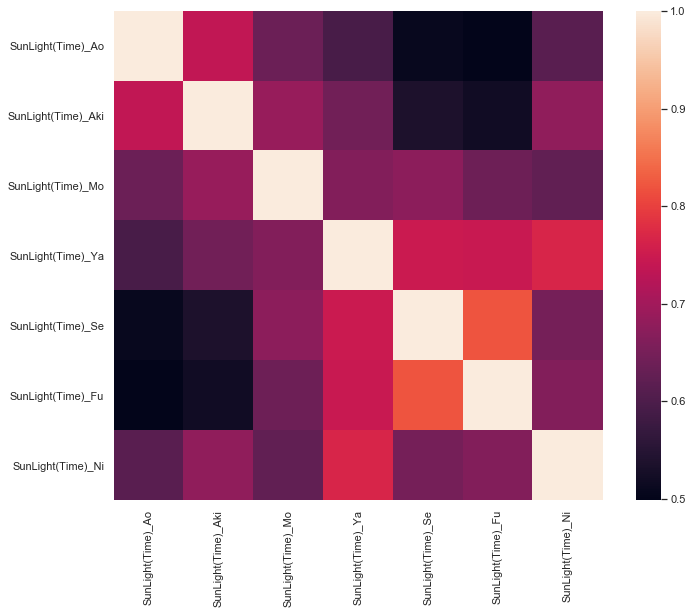

In [97]:
# correlation matrix
corrmat = df_SunLight_Time.corr()
f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, square=True);

df_Temp: 相関高い -->　平均
df_SunLight_Time: 相関はバラけている
df_SunLight_Volume: 青森 と 仙台/福島が相関0.5程度と低め
df_WindSpeed: 相関低め
df_WindDirection 相関低め

## Actual_generation(Tohoku_area) 
https://setsuden.nw.tohoku-epco.co.jp/download.html

Timegrouperで5分値を３０分値へ
https://qiita.com/takechanman1228/items/00daec6a62f831f24e6d

In [98]:
#Actual generation_dataset from 2016-08-01
df_actual_generation_1 = pd.read_csv('/Users/kenotsu/Documents/master_thesis/Datasets/Master_thesis/Actual_generation_5min/Actual_generation1.csv', sep=',', header=0, encoding='shift_jis')

#Actual generation_dataset from 2020-04-14
df_actual_generation_2 = pd.read_csv('/Users/kenotsu/Documents/master_thesis/Datasets/Master_thesis/Actual_generation_5min/Actual_generation2.csv', sep=',', header=0, encoding='shift_jis')

In [99]:
df_actual_generation_Tohoku = pd.concat([df_actual_generation_1, df_actual_generation_2])
df_actual_generation_Tohoku = df_actual_generation_Tohoku.rename(columns={'DATE': 'Date', 'TIME': 'Time',
    '太陽光発電実績(5分間隔値)(万kW)': 'gen_Solar(mkW)', '当日実績(5分間隔値)(万kW)': 'gen_all(mkW)', '風力発電実績(5分間隔値)(万kW)': 'gen_Wind(mkW)'
})

In [100]:
df_actual_generation_Tohoku["gen_Solar(mkW)"].fillna(0, inplace=True)
df_actual_generation_Tohoku["gen_all(mkW)"].fillna(0, inplace=True)
df_actual_generation_Tohoku["gen_Wind(mkW)"].fillna(0, inplace=True)

In [101]:
df_actual_generation_Tohoku["DateTime"] = pd.to_datetime(df_actual_generation_Tohoku["Date"] + " " + df_actual_generation_Tohoku["Time"])

In [102]:
df_actual_generation_Tohoku = df_actual_generation_Tohoku.groupby(pd.Grouper(key="DateTime", freq='30min')).sum()

In [103]:
df_actual_generation_Tohoku.reset_index(inplace = True)

In [104]:
df_actual_generation_Tohoku["Time"] = pd.to_datetime(df_actual_generation_Tohoku["DateTime"]).dt.time
df_actual_generation_Tohoku["Date"] = pd.to_datetime(df_actual_generation_Tohoku["DateTime"]).dt.date
df_actual_generation_Tohoku["Date"] = pd.to_datetime(df_actual_generation_Tohoku["Date"])

df_actual_generation_Tohoku = df_actual_generation_Tohoku.drop("DateTime", axis=1)

In [105]:
df_actual_generation_Tohoku.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77472 entries, 0 to 77471
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   gen_all(mkW)    77472 non-null  float64       
 1   gen_Solar(mkW)  77472 non-null  float64       
 2   gen_Wind(mkW)   77472 non-null  float64       
 3   Time            77472 non-null  object        
 4   Date            77472 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 3.0+ MB


In [106]:
df_actual_generation_Tohoku.tail()

gen_all(mkW)  gen_Solar(mkW)  gen_Wind(mkW)      Time       Date
77467        6246.0             0.0          681.0  21:30:00 2020-12-31
77468        6216.0             0.0          674.0  22:00:00 2020-12-31
77469        6123.0             0.0          688.0  22:30:00 2020-12-31
77470        6399.0             0.0          687.0  23:00:00 2020-12-31
77471        6464.0             0.0          670.0  23:30:00 2020-12-31

In [107]:
print(df_actual_generation_Tohoku.isnull().sum())

gen_all(mkW)      0
gen_Solar(mkW)    0
gen_Wind(mkW)     0
Time              0
Date              0
dtype: int64


準備オッケー

## 時間足需要電力計_All (需要実績, 日別, すべての期間, すべてのエリア)
http://occtonet.occto.or.jp/public/dfw/RP11/OCCTO/SD/LOGIN_login#

時間帯の表記をHH_tableにあわせる

In [108]:
# Hourly demand All_広域
df_HourlyDemand_All = pd.read_csv('/Users/kenotsu/Documents/master_thesis/Datasets/Master_thesis/需要実績(日別)_ALL.csv', sep=',', header=0, encoding='shift_jis')

In [109]:
# Rename the columns
df_HourlyDemand_All = df_HourlyDemand_All.rename(columns={'年月日': 'Date', '時間帯': 'Period', 
                                                                  '北海道': 'Hokkaido', '東北': 'Tohoku', '東京': 'Tokyo', '中部': 'Chubu', 
                                                                  '北陸': 'Hokuriku', '関西': 'Kansai', '中国': 'Chugoku',
                                                                  '四国': 'Shikoku', '九州': 'Kyushu', '沖縄': 'Okinawa',
                                                                  '１０エリア計': 'Total'
})

In [110]:
# Convert text on the Period column to NaN
df_HourlyDemand_All['Period'] = df_HourlyDemand_All['Period'].replace({'日電力量(MWh)': np.nan, '日最大電力(MW)': np.nan})

In [111]:
# Remove the rows that include NaN
df_HourlyDemand_All = df_HourlyDemand_All[~df_HourlyDemand_All.Period.str.contains("NaN", na=True)]

In [112]:
# Make the column for "DateTime"
df_HourlyDemand_All["DateTime"] = pd.to_datetime(df_HourlyDemand_All["Date"] + " " + df_HourlyDemand_All["Period"].str[:5])

In [113]:
df_HourlyDemand_All["Time"] = pd.to_datetime(df_HourlyDemand_All["DateTime"]).dt.time
df_HourlyDemand_All["Date"] = pd.to_datetime(df_HourlyDemand_All["DateTime"]).dt.date
df_HourlyDemand_All["Date"] = pd.to_datetime(df_HourlyDemand_All["Date"])

In [114]:
df_HourlyDemand_All = df_HourlyDemand_All.drop(["Period", "DateTime"], axis=1)

In [115]:
print(df_HourlyDemand_All["Time"].value_counts())

15:00:00    1755
04:00:00    1755
00:00:00    1755
03:00:00    1755
13:00:00    1755
18:00:00    1755
06:00:00    1755
16:00:00    1755
23:00:00    1755
12:00:00    1755
19:00:00    1755
05:00:00    1755
22:00:00    1755
01:00:00    1755
08:00:00    1755
07:00:00    1755
11:00:00    1755
09:00:00    1755
20:00:00    1755
17:00:00    1755
14:00:00    1755
02:00:00    1755
21:00:00    1755
10:00:00    1755
Name: Time, dtype: int64


In [116]:
df_HourlyDemand_All.tail()

Date  Hokkaido  Tohoku  Tokyo  Chubu  Hokuriku     Kansai  \
45623 2021-01-19      4875   13849  47574  21446    4884.2  22489.041   
45624 2021-01-19      4791   13316  45771  20683    4716.2  21577.170   
45625 2021-01-19      4748   12682  43551  19875    4566.7  20555.254   
45626 2021-01-19      4567   12093  40735  18674    4401.8  19304.379   
45627 2021-01-19      4684   12098  37972  18100    4438.4  18225.116   

        Chugoku  Shikoku   Kyushu  Okinawa       Total      Time  
45623  9648.096     4271  13052.0    950.1  143038.437  19:00:00  
45624  9219.801     4128  12639.0    933.2  137774.371  20:00:00  
45625  8857.116     3872  12067.0    886.1  131660.170  21:00:00  
45626  8312.672     3551  11485.0    833.2  123957.051  22:00:00  
45627  8055.683     3482  10960.0    786.8  118801.999  23:00:00

準備OK

## 需要電力計　＋　電源別発電量(東北電力サイトより)_2020_12月未入手
https://setsuden.nw.tohoku-epco.co.jp/download.html (※2)

In [117]:
#Total demand and generation by different type of plants_広域
df_DemandPlant_tohoku = pd.read_csv('/Users/kenotsu/Documents/master_thesis/Datasets/Master_thesis/actual_generation_and_demand_Tohoku' + "/Demand_plant_tohoku.csv", sep=',', header=0, encoding='shift_jis')

In [118]:
# Rename the columns
df_DemandPlant_tohoku = df_DemandPlant_tohoku.rename(columns={'DATE_TIME': 'DateTime', 'エリア需要〔MWh〕': 'AreaDemand(MWh)', 
                                                                  '水力〔MWh〕': 'Water(MWh)', '火力〔MWh〕': 'Thermal(MWh)', '原子力〔MWh〕': 'Nuclear(MWh)', 
                                                              '太陽光実績〔MWh〕': 'Actual_Solar(MWh)', '太陽光抑制量〔MWh〕': 'Curtailment_Solar(MWh)', 
                                                              '風力実績〔MWh〕': 'Actual_Wind(MWh)', '風力抑制量〔MWh〕': 'Curtailment_Wind(MWh)',
                                                              '地熱〔MWh〕': 'Geothermal(MWh)', 'バイオマス〔MWh〕': 'Biomass(MWh)', '揚水〔MWh〕': 'PumpedStorage(MWh)',
                                                              '連系線〔MWh〕': 'Interconnection(MWh)'
})

In [119]:
# Make the columns for "Time" and "Date"
df_DemandPlant_tohoku["Time"] = pd.to_datetime(df_DemandPlant_tohoku["DateTime"]).dt.time
df_DemandPlant_tohoku["Date"] = pd.to_datetime(df_DemandPlant_tohoku["DateTime"]).dt.date
df_DemandPlant_tohoku["Date"] = pd.to_datetime(df_DemandPlant_tohoku["Date"])

# Drop the columns that have no value
df_DemandPlant_tohoku = df_DemandPlant_tohoku.drop(["DateTime", "Nuclear(MWh)", "Curtailment_Solar(MWh)", "Curtailment_Wind(MWh)"], axis=1)

In [120]:
df_DemandPlant_tohoku.tail()

AreaDemand(MWh)  Water(MWh)  Thermal(MWh)  Actual_Solar(MWh)  \
40915            10499        1254         11818                  0   
40916            10004        1186         11499                  0   
40917             9429        1146         11325                  0   
40918             9001        1104         10133                  0   
40919             8787        1097         10286                  0   

       Actual_Wind(MWh)  Geothermal(MWh)  Biomass(MWh)  PumpedStorage(MWh)  \
40915               655              148           399                   0   
40916               644              148           399                   0   
40917               572              147           398                   0   
40918               671              147           388                   0   
40919               863              148           390                   0   

       Interconnection(MWh)      Time       Date  
40915                 -3775  19:00:00 2020-11-30  
40916                 -3872  20:00:00 2020-11-30  
40917                 -4159  21:00:00 2020-11-30  
40918                 -3442  22:00:00 2020-11-30  
40919                 -3997  23:00:00 2020-11-30

In [121]:
print(df_DemandPlant_tohoku.isnull().sum())

AreaDemand(MWh)         0
Water(MWh)              0
Thermal(MWh)            0
Actual_Solar(MWh)       0
Actual_Wind(MWh)        0
Geothermal(MWh)         0
Biomass(MWh)            0
PumpedStorage(MWh)      0
Interconnection(MWh)    0
Time                    0
Date                    0
dtype: int64


準備OK

## 日別翌日需要ピーク(電力需要ピーク情報, 翌日, すべての期間, 東北のみ)
http://occtonet.occto.or.jp/public/dfw/RP11/OCCTO/SD/LOGIN_login#

①とりあえず、ピーク情報を基にMaxとMinのときにフラグと立ててみる <p>
②その後必要であれば、実測値も考慮してみる (ただし、MaxとMin以外の情報を付与できないのでアンバランスになる可能性あり)

In [122]:
# Daily demand peak forecast_Tohoku_広域
df_DemandPeak_Tohoku = pd.read_csv('/Users/kenotsu/Documents/master_thesis/Datasets/Master_thesis/電力需給予想ピーク時供給力翌日_Tohoku.csv', sep=',', header=0, encoding='shift_jis')

In [123]:
df_DemandPeak_Tohoku.tail()

策定日        対象日付 対象エリア 最小総需要予想時刻  最小総需要予想（MW） 最大総需要予想時刻  \
1752  2016/04/04  2016/04/05    東北     01:00         8443     19:00   
1753  2016/04/03  2016/04/04    東北     01:00         7558     19:00   
1754  2016/04/02  2016/04/03    東北     01:00         7574     19:00   
1755  2016/04/01  2016/04/02    東北     15:00         8575     19:00   
1756  2016/03/31  2016/04/01    東北     01:00         8204     19:00   

      最大総需要予想（MW）  最大供給力予想（MW）  予想使用率  予想予備率  
1752        10115        11985   84.4   18.5  
1753        10520        12405   84.8   17.9  
1754         9355        11305   82.8   20.8  
1755         9749        11831   82.4   21.4  
1756        10277        12009   85.6   16.9

In [124]:
df_DemandPeak_Tohoku = df_DemandPeak_Tohoku.rename(columns={'策定日': 'PlanDate', '対象日付': 'Date', '対象エリア': 'Area',
                                  '最小総需要予想時刻': 'Time_Min', '最小総需要予想（MW）': 'Planned_Min(MW)', 
                                  '最大総需要予想時刻': 'Time_Max', '最大総需要予想（MW）': 'Planned_Max(MW)', 
                                  '最大供給力予想（MW）': 'Planned_Max_Capa(MW)', '予想使用率': 'Planned_usege(%)', '予想予備率': 'Planned_margin(%)'})

In [125]:
df_DemandPeak_Tohoku["Planned_Min_flag"] = 1
df_DemandPeak_Tohoku["Planned_Max_flag"] = 9

In [126]:
df_DemandMin_Tohoku = df_DemandPeak_Tohoku[["Date", "Time_Min", "Planned_Min_flag"]]
df_DemandMin_Tohoku = df_DemandMin_Tohoku.rename(columns={"Time_Min": "Time"})

df_DemandMin_Tohoku["Time"] = df_DemandMin_Tohoku["Time"].str.replace('24:00', '23:00')
df_DemandMin_Tohoku["Date"] = pd.to_datetime(df_DemandMin_Tohoku["Date"])
df_DemandMin_Tohoku["Time"] = pd.to_datetime(df_DemandMin_Tohoku["Time"]).dt.time

df_DemandMin_Tohoku.head()

Date      Time  Planned_Min_flag
0 2021-01-21  23:00:00                 1
1 2021-01-20  23:00:00                 1
2 2021-01-19  01:00:00                 1
3 2021-01-18  01:00:00                 1
4 2021-01-17  01:00:00                 1

In [127]:
df_DemandMax_Tohoku = df_DemandPeak_Tohoku[["Date", "Time_Max", "Planned_Max_flag"]]
df_DemandMax_Tohoku = df_DemandMax_Tohoku.rename(columns={"Time_Max": "Time"})

df_DemandMax_Tohoku["Date"] = pd.to_datetime(df_DemandMax_Tohoku["Date"])
df_DemandMax_Tohoku["Time"] = pd.to_datetime(df_DemandMax_Tohoku["Time"]).dt.time

df_DemandMax_Tohoku.head()

Date      Time  Planned_Max_flag
0 2021-01-21  10:00:00                 9
1 2021-01-20  10:00:00                 9
2 2021-01-19  18:00:00                 9
3 2021-01-18  10:00:00                 9
4 2021-01-17  19:00:00                 9

DateとTimeMin or TimeMaxを使ってMerge (一旦はFlagのみマージ)

## Additional data (gas, oil etc.) ※後から追加 LNGの輸送状況や価格はほしいところ

※特に気になる点としては、日本の電力価格はガス火力の影響が大きい点。

LNG価格がきっと必要になる

In [128]:
# # Make a brank csv for commodity prices
# p_new = pathlib.Path('/Users/kenotsu/Documents/Datasets/Master Thesis/test.csv')
# with p_new.open(mode='w') as f:
#   f.write('')

In [129]:
# import yfinance as yf

# WTI= yf.Ticker("MTF=F")

# # get stock info
# # print(msft.info)

# # get historical market data
# hist = WTI.history(period="5d", interval="15m")

# import matplotlib.pyplot as plt
# import seaborn

# # Plot everything by leveraging the very powerful matplotlib package
# hist['Close'].plot(figsize=(16, 9))

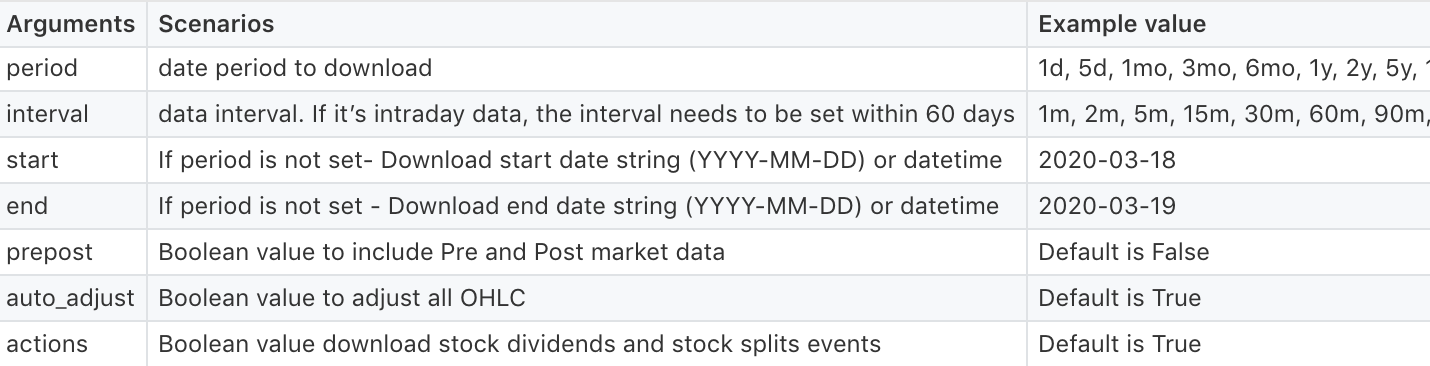

In [130]:
# # Download stock data then export as CSV
# data_df = yf.download("CL=F", period="max", interval="15m", start="2020-10-01", end="2020-10-31")
# data_df.to_csv('WTI.csv')

In [131]:
# df_WTI = pd.read_csv('/Users/kenotsu/Documents/データサイエンス学習用/Master_Thesis/WTI.csv', sep=',', header=0)
# df_WTI.tail()

# Make all_data

一旦とにかくすべてをくっつける

In [132]:
HH_table = pd.DataFrame(df_intra_HH["HH"])
HH_table = HH_table.drop_duplicates()
time = df_actual_generation_Tohoku["Time"]
time = pd.DataFrame(time)
time = time.drop_duplicates()
HH_table["Time"] = time

## Merge all input data

In [296]:
all_data = df_intra

# HH_table
all_data = pd.merge(all_data, HH_table, how="left", on=['HH'])

# df_spot
all_data = pd.merge(all_data, df_spot, how="left", on=['Date', 'HH'])

#df_weather_all
all_data = pd.merge(all_data, df_weather_all, how="left", on=['Date','Time'])

#df_actual_generation_Tohoku
all_data = pd.merge(all_data, df_actual_generation_Tohoku, how="left", on=['Date', 'Time'])

#df_HourlyDemand_All
all_data = pd.merge(all_data, df_HourlyDemand_All, how="left", on=['Date', 'Time'])

#df_DemandPlant_tohoku
all_data = pd.merge(all_data, df_DemandPlant_tohoku, how="left", on=['Date', 'Time'])

#df_DemandMin_Tohoku
all_data = pd.merge(all_data, df_DemandMin_Tohoku, how="left", on=['Date', 'Time'])

#df_DemandMax_Tohoku
all_data = pd.merge(all_data, df_DemandMax_Tohoku, how="left", on=['Date', 'Time'])

all_data.head(10)

Date  HH  Open  High   Low  Close  Average  Volume(MWh/h)  \
0 2016-04-01   1  7.69  7.69  7.69   7.69     7.69            0.7   
1 2016-04-01   2   NaN   NaN   NaN    NaN      NaN            0.0   
2 2016-04-01   3  7.21  7.21  7.21   7.21     7.21            0.8   
3 2016-04-01   4  7.06  7.06  7.06   7.06     7.06            0.8   
4 2016-04-01   5  7.21  7.21  7.21   7.21     7.21            0.8   
5 2016-04-01   6  7.21  7.21  7.21   7.21     7.21            0.8   
6 2016-04-01   7  7.21  7.21  7.21   7.21     7.21            0.8   
7 2016-04-01   8  7.21  7.21  7.21   7.21     7.21            0.8   
8 2016-04-01   9  7.06  7.06  7.06   7.06     7.06            0.8   
9 2016-04-01  10  7.06  7.06  7.06   7.06     7.06            0.8   

   Volume(Tick count)      Time  Sell_volume(kWh)  Buy_volume(kWh)  \
0                   1  00:00:00           5077000          2120500   
1                   0  00:30:00           5621500          2239000   
2                   1  01:00:00           5710500          2219000   
3                   1  01:30:00           5536000          2202500   
4                   1  02:00:00           5461000          2192000   
5                   1  02:30:00           5456500          2183000   
6                   1  03:00:00           5445000          2203500   
7                   1  03:30:00           5448500          2276500   
8                   1  04:00:00           5615000          2307000   
9                   1  04:30:00           5722000          2238500   

   Total_volume(kWh)  System_price(Yen/kWh)  Price_Tohoku(Yen/kWh)  \
0             675500                   6.61                   6.69   
1             755500                   6.34                   6.34   
2             713500                   6.34                   6.34   
3             717500                   6.25                   6.03   
4             870500                   6.57                   6.57   
5             800500                   6.57                   6.57   
6             808500                   6.57                   6.57   
7             816000                   6.57                   6.57   
8             814500                   6.57                   6.57   
9             803000                   6.57                   6.57   

   Price_Tokyo(Yen/kWh)  Temp_Ao  SunLight(Time)_Ao  WindSpeed(m/s)_Ao  \
0                  6.69      NaN                NaN                NaN   
1                  6.34      NaN                NaN                NaN   
2                  6.34      2.1                0.0                2.4   
3                  6.03      NaN                NaN                NaN   
4                  6.57      1.5                0.0                1.5   
5                  6.57      NaN                NaN                NaN   
6                  6.57      1.2                0.0                0.3   
7                  6.57      NaN                NaN                NaN   
8                  6.57      0.4                0.0                1.7   
9                  6.57      NaN                NaN                NaN   

   WindDirection_Ao  SunLight(MJ/㎡)_Ao  Temp_Aki  SunLight(Time)_Aki  \
0               NaN                NaN       NaN                 NaN   
1               NaN                NaN       NaN                 NaN   
2              10.0                0.0       3.5                 0.0   
3               NaN                NaN       NaN                 NaN   
4              11.0                0.0       3.4                 0.0   
5               NaN                NaN       NaN                 NaN   
6               6.0                0.0       3.2                 0.0   
7               NaN                NaN       NaN                 NaN   
8              10.0                0.0       2.5                 0.0   
9               NaN                NaN       NaN                 NaN   

   WindSpeed(m/s)_Aki  WindDirection_Aki  SunLight(MJ/㎡)_Aki  Temp_Mo  \
0                 NaN    

In [297]:
print(all_data.isnull().sum())

Date                         0
HH                           0
Open                        72
High                        72
Low                         72
Close                       72
Average                     72
Volume(MWh/h)                0
Volume(Tick count)           0
Time                         0
Sell_volume(kWh)             0
Buy_volume(kWh)              0
Total_volume(kWh)            0
System_price(Yen/kWh)        0
Price_Tohoku(Yen/kWh)        0
Price_Tokyo(Yen/kWh)         0
Temp_Ao                  42625
SunLight(Time)_Ao        42623
WindSpeed(m/s)_Ao        42629
WindDirection_Ao         42629
SunLight(MJ/㎡)_Ao        42618
Temp_Aki                 42638
SunLight(Time)_Aki       42625
WindSpeed(m/s)_Aki       42637
WindDirection_Aki        42637
SunLight(MJ/㎡)_Aki       42625
Temp_Mo                  42620
SunLight(Time)_Mo        42620
WindSpeed(m/s)_Mo        42637
WindDirection_Mo         42637
SunLight(MJ/㎡)_Mo        42620
Temp_Ya                  42620
SunLight

- 基本全部見直し！！

①先にこちらを処理
Generation --> 2016年4月〜2016年7月が欠損。0にて補完 <p>
フラグ --> フラグ以外は欠損のため0で埋める <p>
    
②残りはまとめて処理 <p>
Price data --> データ欠損であるが連続性を保持するため直前参照 <p>
Weather --> 30分値欠損のため直前参照 <p>
需要電力量 --> 30分値欠損のため直前参照　+ 20204Qデータ未入手<p>

In [298]:
# Fillna with 0 for Generation and flag
all_data["gen_Solar(mkW)"].fillna(0, inplace=True)
all_data["gen_all(mkW)"].fillna(0, inplace=True)
all_data["gen_Wind(mkW)"].fillna(0, inplace=True)
all_data["Planned_Min_flag"].fillna(0, inplace=True)
all_data["Planned_Max_flag"].fillna(0, inplace=True)

In [299]:
# Fillna with the average between the previous and later slots for Price, Weather, Demend
all_data.interpolate(method='linear', inplace=True)

In [300]:
# Demand 20204Qデータ未入手のため一旦0で補完
all_data.fillna(0, inplace=True)

In [301]:
print(all_data.isnull().sum())

Date                     0
HH                       0
Open                     0
High                     0
Low                      0
Close                    0
Average                  0
Volume(MWh/h)            0
Volume(Tick count)       0
Time                     0
Sell_volume(kWh)         0
Buy_volume(kWh)          0
Total_volume(kWh)        0
System_price(Yen/kWh)    0
Price_Tohoku(Yen/kWh)    0
Price_Tokyo(Yen/kWh)     0
Temp_Ao                  0
SunLight(Time)_Ao        0
WindSpeed(m/s)_Ao        0
WindDirection_Ao         0
SunLight(MJ/㎡)_Ao        0
Temp_Aki                 0
SunLight(Time)_Aki       0
WindSpeed(m/s)_Aki       0
WindDirection_Aki        0
SunLight(MJ/㎡)_Aki       0
Temp_Mo                  0
SunLight(Time)_Mo        0
WindSpeed(m/s)_Mo        0
WindDirection_Mo         0
SunLight(MJ/㎡)_Mo        0
Temp_Ya                  0
SunLight(Time)_Ya        0
WindSpeed(m/s)_Ya        0
WindDirection_Ya         0
SunLight(MJ/㎡)_Ya        0
Temp_Se                  0
S

In [302]:
# Create a column for "date block num"
all_data['Date'] = pd.to_datetime(all_data['Date'])
all_data["date_block_num"] = np.trunc(all_data['Date'].map(pd.Timestamp.timestamp).astype(int) / 86400 - 16891)

※ Filter all_data from 2016-04-01 to 2020-12-31

In [303]:
all_data = all_data[all_data["Date"] <= "2020-12-31"]

In [304]:
all_data['month'] = pd.to_datetime(all_data["Date"]).dt.month

In [305]:
all_data.tail()

Date  HH  Open  High    Low  Close  Average  Volume(MWh/h)  \
83323 2020-12-31  44  35.0  70.0  33.00  70.00    44.71          328.7   
83324 2020-12-31  45  42.0  70.0  41.01  45.48    50.19          409.9   
83325 2020-12-31  46  42.0  70.0  35.00  41.33    42.20          383.2   
83326 2020-12-31  47  37.0  70.0  33.93  36.66    44.09          345.9   
83327 2020-12-31  48  27.0  37.5  23.93  26.46    28.42          233.3   

       Volume(Tick count)      Time  Sell_volume(kWh)  Buy_volume(kWh)  \
83323                 110  21:30:00          16913450         22563500   
83324                 104  22:00:00          16406450         22394500   
83325                 112  22:30:00          16501300         21888250   
83326                  60  23:00:00          16224050         21729250   
83327                  66  23:30:00          16207050         21202500   

       Total_volume(kWh)  System_price(Yen/kWh)  Price_Tohoku(Yen/kWh)  \
83323           16910000                   35.0                   35.0   
83324           16403600                   45.0                   40.0   
83325           16497800                   40.0                   40.0   
83326           16219200                   35.0                   35.0   
83327           16200350                   25.0                   25.0   

       Price_Tokyo(Yen/kWh)  Temp_Ao  SunLight(Time)_Ao  WindSpeed(m/s)_Ao  \
83323                  35.0    -6.60                0.0               6.35   
83324                  40.0    -6.70                0.0               7.20   
83325                  40.0    -6.75                0.0               6.30   
83326                  35.0    -6.80                0.0               5.40   
83327                  25.0    -6.85                0.0               5.55   

       WindDirection_Ao  SunLight(MJ/㎡)_Ao  Temp_Aki  SunLight(Time)_Aki  \
83323              13.0                0.0     -4.15                 0.0   
83324              14.0                0.0     -4.50                 0.0   
83325              13.5                0.0     -4.25                 0.0   
83326              13.0                0.0     -4.00                 0.0   
83327              12.5                0.0     -3.65                 0.0   

       WindSpeed(m/s)_Aki  WindDirection_Aki  SunLight(MJ/㎡)_Aki  Temp_Mo  \
83323                7.15               15.0                 0.0    -8.55   
83324                6.90               15.0                 0.0    -8.60   
83325                7.15               15.0                 0.0    -9.35   
83326                7.40               15.0                 0.0   -10.10   
83327                7.15               15.0                 0.0    -9.60   

       SunLight(Time)_Mo  WindSpeed(m/s)_Mo  WindDirection_Mo  \
83323                0.0               1.65              12.5   
83324                0.0               1.60              16.0   
83325                0.0               1.75              11.0   
83326                0.0               1.90               6.0   
83327                0.0               2.30               6.5   

       SunLight(MJ/㎡)_Mo  Temp_Ya  SunLight(Time)_Ya  WindSpeed(m/s)_Ya  \
83323                0.0    -3.75                0.0               1.35   
83324                0.0    -3.80                0.0               1.30   
83325                0.0    -3.75                0.0               1.35   
83326                0.0    -3.70                0.0               1.40   
83327                0.0    -3.70                0.0               1.05   

       WindDirection_Ya  SunLight(MJ/㎡)_Ya  Temp_Se  SunLight(Time)_Se  \
83323               7.5                0.0    -2.55                0.0   
83324               9.0                0.0    -2.60                0.0   
83325               9.5                0.0    -2.60                0.0   
83326              10.0                0.0    -2.60                0.0   
83327               5.5                0.0    -2.35                0.0   

 

In [306]:
all_data.shape

(83328, 78)

In [307]:
all_data.to_csv('/Users/kenotsu/Documents/master_thesis/Datasets/Master_thesis/all_data.csv', index=False)

# Data leakage(Predictionポイントは前日の16:30とする)
Volumu確認後、当日の0:00にする可能性もあり

In [217]:
# all_data = all_data.drop('Date', axis=1)
# all_data = all_data.drop('Time', axis=1)

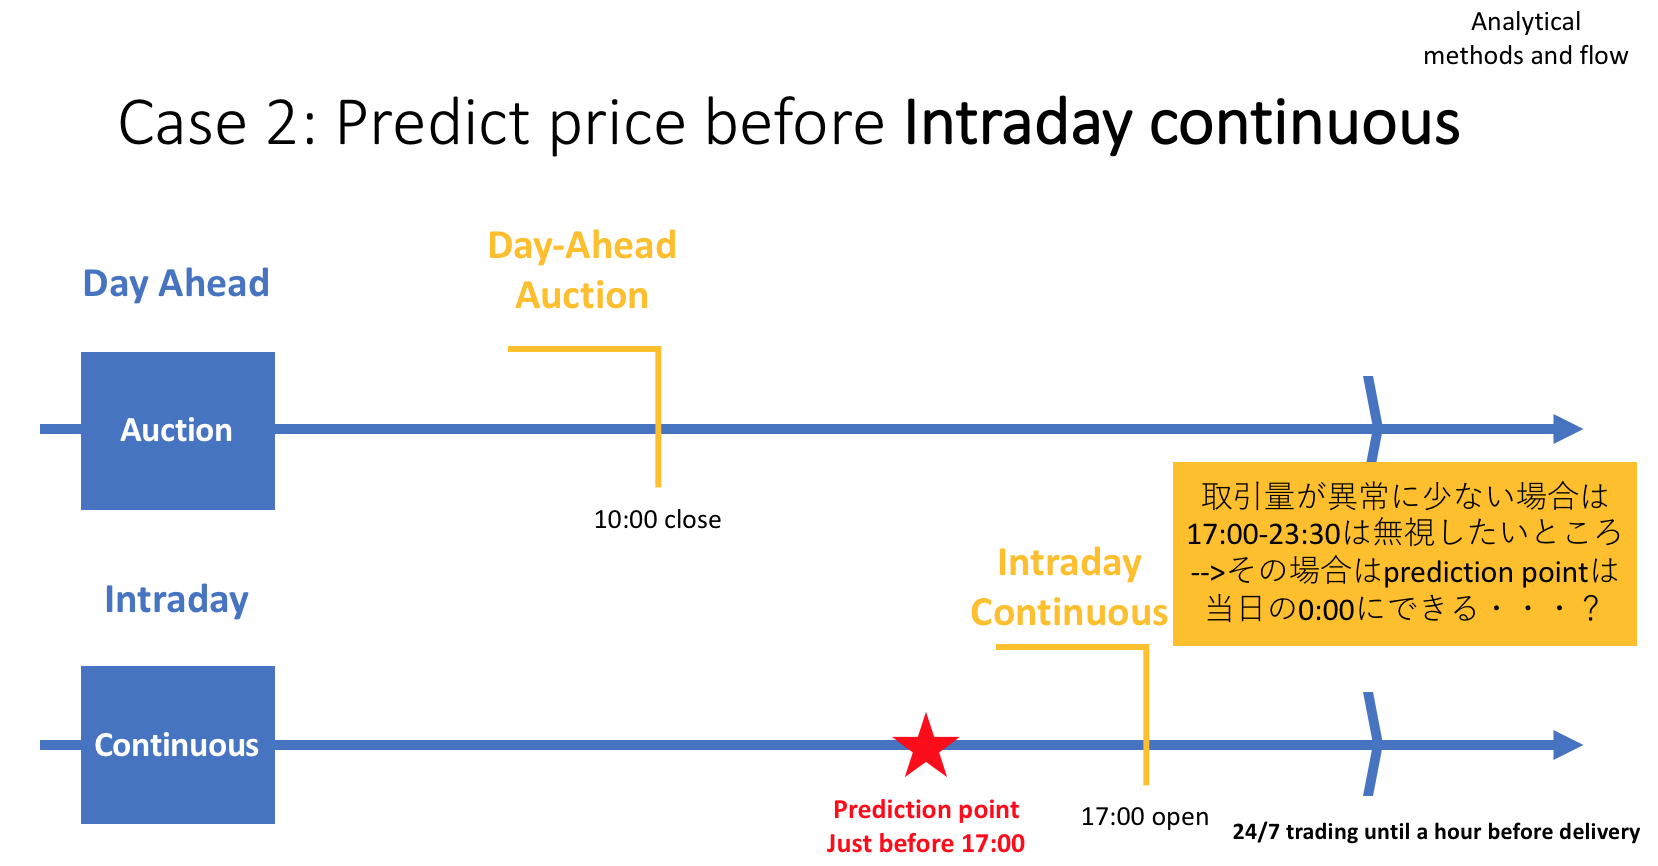

予測時点でどの特徴量が存在しうるか整理する

- Close priceは外す (Target) 
- Spot_price & volume: そのまま(Spot価格確定後の予測)
- 電力需要ピーク情報: そのまま（翌日予測）
- その他: <p>
    ① block_date_numを2日分ずらす<p>
        ※ここでの論点はIntraday開始直後に取引される17:00から24:00までのアイテムが１日ずらしつかえないということ。つまり、17:00-24:00を勘案すると2日ずらす必要がある。(今後調整するかも)
        
    
    その上で更に、直前のスロットの情報は相関が高いので<p>
    ② HHを1スロット分ずらす <p>
    ③ その他はseasonality検証後に必要に応じて追加 <p>
    ④ lag_feature生成後元の特徴量は全て削除 <p>

※欠損値は0でないほうがいい --> 削除？　要検証

# Feature Engineering

<EDA前にやること><p>
【時系列分析の基本】定常性とホワイトノイズを分かりすく解説 <p>
https://ai-trend.jp/basic-study/time-series-analysis/time-series-analysis-stationaly-noise/
    
時系列データに定常性を持たせて解析する方法
https://ai-trend.jp/basic-study/time-series-analysis/stationarity/

機械学習による株価予測　いろはの”い”
https://qiita.com/blog_UKI/items/25dc1c2559c61890a449

## Mean encoding (共通のグループの平均値などの)一旦スキップ

[Mean Encoding without regularization]

In [218]:
# # # Calculate a mapping: {item_id: target_mean}
# all_data2 = all_data
# item_id_target_mean = all_data2.groupby('item_id').item_cnt_month.mean()

# # In our non-regularized case we just *map* the computed means to the `item_id`'s
# all_data2['item_target_enc1'] = all_data2['item_id'].map(item_id_target_mean)

# # Fill NaNs
# all_data2['item_target_enc1'].fillna(0.3343, inplace=True) 

# # Print correlation
# encoded_feature = all_data2['item_target_enc1'].values
# print(np.corrcoef(all_data2['item_cnt_month'].values, encoded_feature)[0][1])

[Expanding mean scheme]

In [219]:
# %time

# cumsum = all_data2.groupby('item_id')['item_cnt_month'].cumsum() - all_data2['item_cnt_month']
# cumcnt = all_data2.groupby('item_id').cumcount()

# all_data2['item_target_enc2'] = cumsum / cumcnt
# all_data2['item_target_enc2'].fillna(0.3343, inplace=True)
# encoded_feature = all_data2['item_target_enc2'].values

# corr = np.corrcoef(all_data2['item_cnt_month'].values, encoded_feature)[0][1]
# print(corr)

※一旦全てにラグ特徴量を適用する
 -->ただし、計算コストを下げるために可能であれば、ここで特徴量間の相関が高いものは排除する (天気データなど)

In [220]:
# Reduce the number of features which have high correlation each other
#all_data = all_data.drop(df.all_data[df.all_data.str.contains('' or '' or '')], axis=1)

## Lag-features (Avoiding data leakage)

※Infinity value will be happen with Downcast preprocessing. ("Total" column)

In [221]:
# Check the remaining memory on PC
import gc
gc.collect()

0

※ ラグ特徴量が必要ないものと"Close"(target)は外す

In [222]:
lag_columns = all_data.columns.drop(['Date', 'Time', 'HH', 'Close', 'Sell_volume(kWh)', 'Buy_volume(kWh)',
       'Total_volume(kWh)', 'System_price(Yen/kWh)', 'Price_Tohoku(Yen/kWh)',
       'Price_Tokyo(Yen/kWh)', 'Planned_Min_flag', 'Planned_Max_flag',
       'date_block_num', 'month'])

In [223]:
lag_columns

Index(['Open', 'High', 'Low', 'Average', 'Volume(MWh/h)', 'Volume(Tick count)',
       'Temp_Ao', 'SunLight(Time)_Ao', 'WindSpeed(m/s)_Ao', 'WindDirection_Ao',
       'SunLight(MJ/㎡)_Ao', 'Temp_Aki', 'SunLight(Time)_Aki',
       'WindSpeed(m/s)_Aki', 'WindDirection_Aki', 'SunLight(MJ/㎡)_Aki',
       'Temp_Mo', 'SunLight(Time)_Mo', 'WindSpeed(m/s)_Mo', 'WindDirection_Mo',
       'SunLight(MJ/㎡)_Mo', 'Temp_Ya', 'SunLight(Time)_Ya',
       'WindSpeed(m/s)_Ya', 'WindDirection_Ya', 'SunLight(MJ/㎡)_Ya', 'Temp_Se',
       'SunLight(Time)_Se', 'WindSpeed(m/s)_Se', 'WindDirection_Se',
       'SunLight(MJ/㎡)_Se', 'Temp_Fu', 'SunLight(Time)_Fu',
       'WindSpeed(m/s)_Fu', 'WindDirection_Fu', 'SunLight(MJ/㎡)_Fu', 'Temp_Ni',
       'SunLight(Time)_Ni', 'WindSpeed(m/s)_Ni', 'WindDirection_Ni',
       'SunLight(MJ/㎡)_Ni', 'gen_all(mkW)', 'gen_Solar(mkW)', 'gen_Wind(mkW)',
       'Hokkaido', 'Tohoku', 'Tokyo', 'Chubu', 'Hokuriku', 'Kansai', 'Chugoku',
       'Shikoku', 'Kyushu', 'Okinawa', 'Total', '

厳密にすると、17:00〜23:30は予測時点では１日前の情報は手に入らない
Prediction pointを「前日の17:00直前」とする場合は、以下の手当が必要
予測時点の前後でDaylag1とDaylag2の参照を変える
もともとのカラムに格納し、カラム名を変更する
Daylag1とDaylag2を削除する

※一旦は２日ずらして対応する (ただし、Closeとの相関は当然下がるため改善の余地有り)

In [224]:
def generate_lag_day(train, days, cols):
   
    for col in cols:
        for day in days:
           # copy the columns that need to generate lag features
            train_shift = train[['date_block_num', 'HH', col]].copy()

            # Change the name of  lag features
            train_shift.columns = ['date_block_num', 'HH', col+'_Daylag_'+ str(day)]
            train_shift['date_block_num'] += day
            train = pd.merge(train, train_shift, how='left', on=['date_block_num', 'HH'])
   
    return train

In [225]:
all_data_lagged = generate_lag_day(all_data, [2], lag_columns)

In [226]:
all_data_lagged = all_data_lagged.drop(lag_columns, axis=1)

In [227]:
print(all_data_lagged.isnull().sum().head(20))

Date                            0
HH                              0
Close                           0
Time                            0
Sell_volume(kWh)                0
Buy_volume(kWh)                 0
Total_volume(kWh)               0
System_price(Yen/kWh)           0
Price_Tohoku(Yen/kWh)           0
Price_Tokyo(Yen/kWh)            0
Planned_Min_flag                0
Planned_Max_flag                0
date_block_num                  0
month                           0
Open_Daylag_2                  96
High_Daylag_2                  96
Low_Daylag_2                   96
Average_Daylag_2               96
Volume(MWh/h)_Daylag_2         96
Volume(Tick count)_Daylag_2    96
dtype: int64


NaN was generated only on 96 (48 * 2) timeslots on the firstday 2016/04/01　and 2016/04/02 --> OK 

In [228]:
all_data_lagged.fillna(0, inplace=True)
print(all_data_lagged.isnull().sum().head(20))

Date                           0
HH                             0
Close                          0
Time                           0
Sell_volume(kWh)               0
Buy_volume(kWh)                0
Total_volume(kWh)              0
System_price(Yen/kWh)          0
Price_Tohoku(Yen/kWh)          0
Price_Tokyo(Yen/kWh)           0
Planned_Min_flag               0
Planned_Max_flag               0
date_block_num                 0
month                          0
Open_Daylag_2                  0
High_Daylag_2                  0
Low_Daylag_2                   0
Average_Daylag_2               0
Volume(MWh/h)_Daylag_2         0
Volume(Tick count)_Daylag_2    0
dtype: int64


In [229]:
all_data_lagged.head()

Date  HH  Close      Time  Sell_volume(kWh)  Buy_volume(kWh)  \
0 2016-04-01   1   7.69  00:00:00           5077000          2120500   
1 2016-04-01   2   7.45  00:30:00           5621500          2239000   
2 2016-04-01   3   7.21  01:00:00           5710500          2219000   
3 2016-04-01   4   7.06  01:30:00           5536000          2202500   
4 2016-04-01   5   7.21  02:00:00           5461000          2192000   

   Total_volume(kWh)  System_price(Yen/kWh)  Price_Tohoku(Yen/kWh)  \
0             675500                   6.61                   6.69   
1             755500                   6.34                   6.34   
2             713500                   6.34                   6.34   
3             717500                   6.25                   6.03   
4             870500                   6.57                   6.57   

   Price_Tokyo(Yen/kWh)  Planned_Min_flag  Planned_Max_flag  date_block_num  \
0                  6.69               0.0               0.0             1.0   
1                  6.34               0.0               0.0             1.0   
2                  6.34               1.0               0.0             1.0   
3                  6.03               0.0               0.0             1.0   
4                  6.57               0.0               0.0             1.0   

   month  Open_Daylag_2  High_Daylag_2  Low_Daylag_2  Average_Daylag_2  \
0      4            0.0            0.0           0.0               0.0   
1      4            0.0            0.0           0.0               0.0   
2      4            0.0            0.0           0.0               0.0   
3      4            0.0            0.0           0.0               0.0   
4      4            0.0            0.0           0.0               0.0   

   Volume(MWh/h)_Daylag_2  Volume(Tick count)_Daylag_2  Temp_Ao_Daylag_2  \
0                     0.0                          0.0               0.0   
1                     0.0                          0.0               0.0   
2                     0.0                          0.0               0.0   
3                     0.0                          0.0               0.0   
4                     0.0                          0.0               0.0   

   SunLight(Time)_Ao_Daylag_2  WindSpeed(m/s)_Ao_Daylag_2  \
0                         0.0                         0.0   
1                         0.0                         0.0   
2                         0.0                         0.0   
3                         0.0                         0.0   
4                         0.0                         0.0   

   WindDirection_Ao_Daylag_2  SunLight(MJ/㎡)_Ao_Daylag_2  Temp_Aki_Daylag_2  \
0                        0.0                         0.0                0.0   
1                        0.0                         0.0                0.0   
2                        0.0                         0.0                0.0   
3                        0.0                         0.0                0.0   
4                        0.0                         0.0                0.0   

   SunLight(Time)_Aki_Daylag_2  WindSpeed(m/s)_Aki_Daylag_2  \
0                          0.0                          0.0   
1                          0.0                          0.0   
2                          0.0                          0.0   
3                          0.0                          0.0   
4                          0.0                          0.0   

   WindDirection_Aki_Daylag_2  SunLight(MJ/㎡)_Aki_Daylag_2  Temp_Mo_Daylag_2  \
0                         0.0                          0.0               0.0   
1                         0.0                          0.0               0.0   
2                         0.0                          0.0               0.0   
3                         0.0                          0.0               0.0   
4                         0.0                          0.0               0.0   

   SunLight(Time)_Mo_Daylag_2  WindSpeed(m/s)_Mo_Daylag_2  \
0             

In [230]:
# # 考えられるループ (必要に応じて作成する)
# def daylag_rename(train, HHs, cols):
#     #　カラムを１つずつ取得
#     for col in cols:
#         train = train[['date_block_num', 'HH', col]].copy()
#         train.columns = ['date_block_num', 'HH', col+'_Daylag']

# def adjust_lag(train, HHs, cols):
#     #　カラムを１つずつ取得
#     for col in cols:
#         # HHを１つずつ取得
#         for HH in HHs:
#             # HHが35(17:00)以上48(23:30)以下であれば
#             if 35 <= HH >=48:
#                 ２日前のデータを参照
#             else:
#                 １日前のデータ参照

#             # Change the name of  lag features
#             train_shift.columns = ['date_block_num', 'HH', col+'_Daylag']
#             train_shift['HH'] += HH
            
#             # Adjust HH
#             for i in train['HH']:
#                 if i == 49:
#                     train_shift['HH'] == 1
#                     train_shift['date_block_num'] += 1

# 定義実行
# all_data_lagged = generate_lag_day(all_data_lagged, [1, 2], lag_columns)

#欠損値を確認
# print(all_data_lagged.isnull().sum())

# "Daylag"カラムに数値が反映されていることをかくにんしたら、Daylag_1とDay_lag2は削除
#all_data = all_data.drop(df.all_data[df.all_data.str.contains('Daylag_1' or 'Day_lag2' )], axis=1)

In [231]:
def generate_lag_HH(train, HHs, cols):
    for col in cols:

        for HH in HHs:
            # copy the columns that need to generate lag features
            train_shift = train[['date_block_num', 'HH', col]].copy()

            # Change the name of  lag features
            train_shift.columns = ['date_block_num', 'HH', col+'_HHlag_'+ str(HH)]
            train_shift['HH'] += HH
            
            # Adjust HH
            for i in train['HH']:
                if i == 49:
                    train_shift['HH'] == 1
                    train_shift['date_block_num'] += 1

            # Merge lagged features into the original df
            train = pd.merge(train, train_shift, how='left', on=['date_block_num', 'HH'])
    return train

※ラグ特徴量が必要ないものと"Close"(target)は再度外す

In [232]:
lag_columns = all_data_lagged.columns.drop(['Date', 'Time', 'HH', 'Close', 'Sell_volume(kWh)', 'Buy_volume(kWh)',
       'Total_volume(kWh)', 'System_price(Yen/kWh)', 'Price_Tohoku(Yen/kWh)',
       'Price_Tokyo(Yen/kWh)', 'Planned_Min_flag', 'Planned_Max_flag',
       'date_block_num', 'month'])

In [233]:
lag_columns

Index(['Open_Daylag_2', 'High_Daylag_2', 'Low_Daylag_2', 'Average_Daylag_2',
       'Volume(MWh/h)_Daylag_2', 'Volume(Tick count)_Daylag_2',
       'Temp_Ao_Daylag_2', 'SunLight(Time)_Ao_Daylag_2',
       'WindSpeed(m/s)_Ao_Daylag_2', 'WindDirection_Ao_Daylag_2',
       'SunLight(MJ/㎡)_Ao_Daylag_2', 'Temp_Aki_Daylag_2',
       'SunLight(Time)_Aki_Daylag_2', 'WindSpeed(m/s)_Aki_Daylag_2',
       'WindDirection_Aki_Daylag_2', 'SunLight(MJ/㎡)_Aki_Daylag_2',
       'Temp_Mo_Daylag_2', 'SunLight(Time)_Mo_Daylag_2',
       'WindSpeed(m/s)_Mo_Daylag_2', 'WindDirection_Mo_Daylag_2',
       'SunLight(MJ/㎡)_Mo_Daylag_2', 'Temp_Ya_Daylag_2',
       'SunLight(Time)_Ya_Daylag_2', 'WindSpeed(m/s)_Ya_Daylag_2',
       'WindDirection_Ya_Daylag_2', 'SunLight(MJ/㎡)_Ya_Daylag_2',
       'Temp_Se_Daylag_2', 'SunLight(Time)_Se_Daylag_2',
       'WindSpeed(m/s)_Se_Daylag_2', 'WindDirection_Se_Daylag_2',
       'SunLight(MJ/㎡)_Se_Daylag_2', 'Temp_Fu_Daylag_2',
       'SunLight(Time)_Fu_Daylag_2', 'WindSpeed(

In [234]:
# Generate lag for 48h(1day) and 49h(1day + 1 slot) before
all_data_lagged = generate_lag_HH(all_data_lagged, [1], lag_columns)

In [235]:
print(all_data_lagged.isnull().sum().tail())

Actual_Wind(MWh)_Daylag_2_HHlag_1        1736
Geothermal(MWh)_Daylag_2_HHlag_1         1736
Biomass(MWh)_Daylag_2_HHlag_1            1736
PumpedStorage(MWh)_Daylag_2_HHlag_1      1736
Interconnection(MWh)_Daylag_2_HHlag_1    1736
dtype: int64


In [236]:
all_data_lagged.fillna(0, inplace=True)
print(all_data_lagged.isnull().sum().tail())

Actual_Wind(MWh)_Daylag_2_HHlag_1        0
Geothermal(MWh)_Daylag_2_HHlag_1         0
Biomass(MWh)_Daylag_2_HHlag_1            0
PumpedStorage(MWh)_Daylag_2_HHlag_1      0
Interconnection(MWh)_Daylag_2_HHlag_1    0
dtype: int64


In [237]:
all_data_lagged.columns

Index(['Date', 'HH', 'Close', 'Time', 'Sell_volume(kWh)', 'Buy_volume(kWh)',
       'Total_volume(kWh)', 'System_price(Yen/kWh)', 'Price_Tohoku(Yen/kWh)',
       'Price_Tokyo(Yen/kWh)',
       ...
       'Total_Daylag_2_HHlag_1', 'AreaDemand(MWh)_Daylag_2_HHlag_1',
       'Water(MWh)_Daylag_2_HHlag_1', 'Thermal(MWh)_Daylag_2_HHlag_1',
       'Actual_Solar(MWh)_Daylag_2_HHlag_1',
       'Actual_Wind(MWh)_Daylag_2_HHlag_1', 'Geothermal(MWh)_Daylag_2_HHlag_1',
       'Biomass(MWh)_Daylag_2_HHlag_1', 'PumpedStorage(MWh)_Daylag_2_HHlag_1',
       'Interconnection(MWh)_Daylag_2_HHlag_1'],
      dtype='object', length=142)

## Holiday setting

休日設定が必要であればここで調整
※一旦スキップ

In [238]:
# holiday_dict = {
#     0: 6,
#     1: 3,
#     2: 2,
#     3: 8,
#     4: 3,
#     5: 3,
#     6: 2,
#     7: 8,
#     8: 4,
#     9: 8,
#     10: 5,
#     11: 4,
# }

In [239]:
#all_data['holidays_in_month'] = all_data['month'].map(holiday_dict)

## Standardise with Log-features (対数化)

[Mission]
対数の逆対数変換をして元の数値を得ること
-->グラフで可視化してみる (Closeと対数化Close)線グラフ
-->逆対数の数式を手動で適用してみる
-->

In [240]:
all_data_lagged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83328 entries, 0 to 83327
Columns: 142 entries, Date to Interconnection(MWh)_Daylag_2_HHlag_1
dtypes: datetime64[ns](1), float64(135), int64(5), object(1)
memory usage: 90.9+ MB


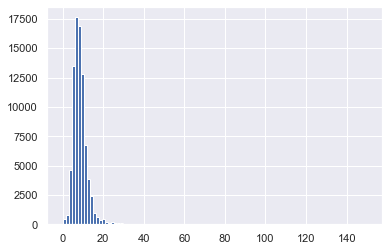

In [241]:
all_data_lagged["Close"].hist(bins=100);

In [242]:
all_data_lagged.columns

Index(['Date', 'HH', 'Close', 'Time', 'Sell_volume(kWh)', 'Buy_volume(kWh)',
       'Total_volume(kWh)', 'System_price(Yen/kWh)', 'Price_Tohoku(Yen/kWh)',
       'Price_Tokyo(Yen/kWh)',
       ...
       'Total_Daylag_2_HHlag_1', 'AreaDemand(MWh)_Daylag_2_HHlag_1',
       'Water(MWh)_Daylag_2_HHlag_1', 'Thermal(MWh)_Daylag_2_HHlag_1',
       'Actual_Solar(MWh)_Daylag_2_HHlag_1',
       'Actual_Wind(MWh)_Daylag_2_HHlag_1', 'Geothermal(MWh)_Daylag_2_HHlag_1',
       'Biomass(MWh)_Daylag_2_HHlag_1', 'PumpedStorage(MWh)_Daylag_2_HHlag_1',
       'Interconnection(MWh)_Daylag_2_HHlag_1'],
      dtype='object', length=142)

In [243]:
cols = ['Close', 'Time', 'System_price(Yen/kWh)', 'Price_Tohoku(Yen/kWh)', 'Price_Tokyo(Yen/kWh)']

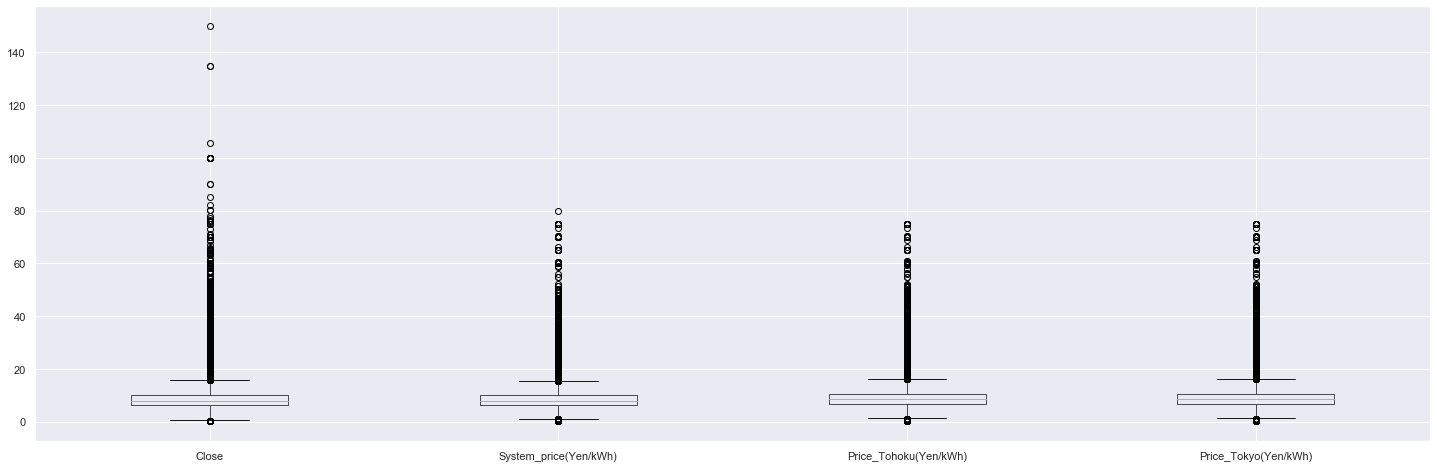

In [244]:
plt.figure(figsize = (25,8))
all_data_lagged[cols].boxplot()
plt.show()

Features seem to be positive skew, and have different scale. --> Need to standardise

In [245]:
all_data_log1 = all_data_lagged[['Date', 'Time', 'HH', 'date_block_num', 'month', 'Planned_Min_flag', 'Planned_Max_flag']]
all_data_log2 = all_data_lagged.drop(['Date', 'Time', 'HH', 'date_block_num', 'month', 'Planned_Min_flag', 'Planned_Max_flag'], axis=1)

In [246]:
# logarithmic transformation for standardised
# 0と負の値を含む列があるので、PowerTransformer()のYeo-Johnson変換を適用する (対数変換の一種)
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer() #default: Yeo-Johnson (this allow also 0-value to transform to logarithmic value)
pt.fit(all_data_log2)

all_data_log2_transformed = all_data_log2

cols = all_data_log2_transformed.columns
all_data_log2_transformed = pt.transform(all_data_log2_transformed)
all_data_log2_transformed = pd.DataFrame(all_data_log2_transformed)
all_data_log2_transformed.columns = cols

In [247]:
all_data_log2.head()

Close  Sell_volume(kWh)  Buy_volume(kWh)  Total_volume(kWh)  \
0   7.69           5077000          2120500             675500   
1   7.45           5621500          2239000             755500   
2   7.21           5710500          2219000             713500   
3   7.06           5536000          2202500             717500   
4   7.21           5461000          2192000             870500   

   System_price(Yen/kWh)  Price_Tohoku(Yen/kWh)  Price_Tokyo(Yen/kWh)  \
0                   6.61                   6.69                  6.69   
1                   6.34                   6.34                  6.34   
2                   6.34                   6.34                  6.34   
3                   6.25                   6.03                  6.03   
4                   6.57                   6.57                  6.57   

   Open_Daylag_2  High_Daylag_2  Low_Daylag_2  Average_Daylag_2  \
0            0.0            0.0           0.0               0.0   
1            0.0            0.0           0.0               0.0   
2            0.0            0.0           0.0               0.0   
3            0.0            0.0           0.0               0.0   
4            0.0            0.0           0.0               0.0   

   Volume(MWh/h)_Daylag_2  Volume(Tick count)_Daylag_2  Temp_Ao_Daylag_2  \
0                     0.0                          0.0               0.0   
1                     0.0                          0.0               0.0   
2                     0.0                          0.0               0.0   
3                     0.0                          0.0               0.0   
4                     0.0                          0.0               0.0   

   SunLight(Time)_Ao_Daylag_2  WindSpeed(m/s)_Ao_Daylag_2  \
0                         0.0                         0.0   
1                         0.0                         0.0   
2                         0.0                         0.0   
3                         0.0                         0.0   
4                         0.0                         0.0   

   WindDirection_Ao_Daylag_2  SunLight(MJ/㎡)_Ao_Daylag_2  Temp_Aki_Daylag_2  \
0                        0.0                         0.0                0.0   
1                        0.0                         0.0                0.0   
2                        0.0                         0.0                0.0   
3                        0.0                         0.0                0.0   
4                        0.0                         0.0                0.0   

   SunLight(Time)_Aki_Daylag_2  WindSpeed(m/s)_Aki_Daylag_2  \
0                          0.0                          0.0   
1                          0.0                          0.0   
2                          0.0                          0.0   
3                          0.0                          0.0   
4                          0.0                          0.0   

   WindDirection_Aki_Daylag_2  SunLight(MJ/㎡)_Aki_Daylag_2  Temp_Mo_Daylag_2  \
0                         0.0                          0.0               0.0   
1                         0.0                          0.0               0.0   
2                         0.0                          0.0               0.0   
3                         0.0                          0.0               0.0   
4                         0.0                          0.0               0.0   

   SunLight(Time)_Mo_Daylag_2  WindSpeed(m/s)_Mo_Daylag_2  \
0                         0.0                         0.0   
1                         0.0                         0.0   
2                         0.0                         0.0   
3                         0.0                         0.0   
4                         0.0                         0.0   

   WindDirection_Mo_Daylag_2  SunLight(MJ/㎡)_Mo_Daylag_2  Temp_Ya_Daylag_2  \
0                        0.0                         0.0               0.0   
1                        0.0                         0.0               0.0   
2   

In [248]:
all_data_log2_transformed.head()

Close  Sell_volume(kWh)  Buy_volume(kWh)  Total_volume(kWh)  \
0 -0.074394         -1.291817        -1.673085          -1.633175   
1 -0.147622         -1.183496        -1.640136          -1.590106   
2 -0.222905         -1.166207        -1.645640          -1.612373   
3 -0.271054         -1.200211        -1.650198          -1.610221   
4 -0.222905         -1.214961        -1.653106          -1.532537   

   System_price(Yen/kWh)  Price_Tohoku(Yen/kWh)  Price_Tokyo(Yen/kWh)  \
0              -0.452571              -0.625136             -0.647312   
1              -0.551545              -0.766843             -0.796254   
2              -0.551545              -0.766843             -0.796254   
3              -0.585289              -0.899376             -0.936160   
4              -0.467026              -0.672824             -0.697360   

   Open_Daylag_2  High_Daylag_2  Low_Daylag_2  Average_Daylag_2  \
0      -4.633993      -8.761328     -3.341479         -6.906421   
1      -4.633993      -8.761328     -3.341479         -6.906421   
2      -4.633993      -8.761328     -3.341479         -6.906421   
3      -4.633993      -8.761328     -3.341479         -6.906421   
4      -4.633993      -8.761328     -3.341479         -6.906421   

   Volume(MWh/h)_Daylag_2  Volume(Tick count)_Daylag_2  Temp_Ao_Daylag_2  \
0               -2.693481                    -3.346468            -1.276   
1               -2.693481                    -3.346468            -1.276   
2               -2.693481                    -3.346468            -1.276   
3               -2.693481                    -3.346468            -1.276   
4               -2.693481                    -3.346468            -1.276   

   SunLight(Time)_Ao_Daylag_2  WindSpeed(m/s)_Ao_Daylag_2  \
0                     -0.6572                    -2.92811   
1                     -0.6572                    -2.92811   
2                     -0.6572                    -2.92811   
3                     -0.6572                    -2.92811   
4                     -0.6572                    -2.92811   

   WindDirection_Ao_Daylag_2  SunLight(MJ/㎡)_Ao_Daylag_2  Temp_Aki_Daylag_2  \
0                  -2.036828                   -0.863725          -1.479816   
1                  -2.036828                   -0.863725          -1.479816   
2                  -2.036828                   -0.863725          -1.479816   
3                  -2.036828                   -0.863725          -1.479816   
4                  -2.036828                   -0.863725          -1.479816   

   SunLight(Time)_Aki_Daylag_2  WindSpeed(m/s)_Aki_Daylag_2  \
0                    -0.644726                    -3.399015   
1                    -0.644726                    -3.399015   
2                    -0.644726                    -3.399015   
3                    -0.644726                    -3.399015   
4                    -0.644726                    -3.399015   

   WindDirection_Aki_Daylag_2  SunLight(MJ/㎡)_Aki_Daylag_2  Temp_Mo_Daylag_2  \
0                   -2.421243                    -0.854651          -1.18493   
1                   -2.421243                    -0.854651          -1.18493   
2                   -2.421243                    -0.854651          -1.18493   
3                   -2.421243                    -0.854651          -1.18493   
4                   -2.421243                    -0.854651          -1.18493   

   SunLight(Time)_Mo_Daylag_2  WindSpeed(m/s)_Mo_Daylag_2  \
0                   -0.659142                   -3.066269   
1                   -0.659142                   -3.066269   
2                   -0.659142                   -3.066269   
3                   -0.659142                   -3.066269   
4                   -0.659142                   -3.066269   

   WindDirection_Mo_Daylag_2  SunLight(MJ/㎡)_Mo_Daylag_2  Temp_Ya_Daylag_2  \
0                  -2.057731                   -0.866574         -1.413341   
1                  -2.057731                   -0.866574         -1

In [249]:
all_data_log = pd.concat([all_data_log1, all_data_log2_transformed], axis=1)

In [250]:
all_data_log.head()

Date      Time  HH  date_block_num  month  Planned_Min_flag  \
0 2016-04-01  00:00:00   1             1.0      4               0.0   
1 2016-04-01  00:30:00   2             1.0      4               0.0   
2 2016-04-01  01:00:00   3             1.0      4               1.0   
3 2016-04-01  01:30:00   4             1.0      4               0.0   
4 2016-04-01  02:00:00   5             1.0      4               0.0   

   Planned_Max_flag     Close  Sell_volume(kWh)  Buy_volume(kWh)  \
0               0.0 -0.074394         -1.291817        -1.673085   
1               0.0 -0.147622         -1.183496        -1.640136   
2               0.0 -0.222905         -1.166207        -1.645640   
3               0.0 -0.271054         -1.200211        -1.650198   
4               0.0 -0.222905         -1.214961        -1.653106   

   Total_volume(kWh)  System_price(Yen/kWh)  Price_Tohoku(Yen/kWh)  \
0          -1.633175              -0.452571              -0.625136   
1          -1.590106              -0.551545              -0.766843   
2          -1.612373              -0.551545              -0.766843   
3          -1.610221              -0.585289              -0.899376   
4          -1.532537              -0.467026              -0.672824   

   Price_Tokyo(Yen/kWh)  Open_Daylag_2  High_Daylag_2  Low_Daylag_2  \
0             -0.647312      -4.633993      -8.761328     -3.341479   
1             -0.796254      -4.633993      -8.761328     -3.341479   
2             -0.796254      -4.633993      -8.761328     -3.341479   
3             -0.936160      -4.633993      -8.761328     -3.341479   
4             -0.697360      -4.633993      -8.761328     -3.341479   

   Average_Daylag_2  Volume(MWh/h)_Daylag_2  Volume(Tick count)_Daylag_2  \
0         -6.906421               -2.693481                    -3.346468   
1         -6.906421               -2.693481                    -3.346468   
2         -6.906421               -2.693481                    -3.346468   
3         -6.906421               -2.693481                    -3.346468   
4         -6.906421               -2.693481                    -3.346468   

   Temp_Ao_Daylag_2  SunLight(Time)_Ao_Daylag_2  WindSpeed(m/s)_Ao_Daylag_2  \
0            -1.276                     -0.6572                    -2.92811   
1            -1.276                     -0.6572                    -2.92811   
2            -1.276                     -0.6572                    -2.92811   
3            -1.276                     -0.6572                    -2.92811   
4            -1.276                     -0.6572                    -2.92811   

   WindDirection_Ao_Daylag_2  SunLight(MJ/㎡)_Ao_Daylag_2  Temp_Aki_Daylag_2  \
0                  -2.036828                   -0.863725          -1.479816   
1                  -2.036828                   -0.863725          -1.479816   
2                  -2.036828                   -0.863725          -1.479816   
3                  -2.036828                   -0.863725          -1.479816   
4                  -2.036828                   -0.863725          -1.479816   

   SunLight(Time)_Aki_Daylag_2  WindSpeed(m/s)_Aki_Daylag_2  \
0                    -0.644726                    -3.399015   
1                    -0.644726                    -3.399015   
2                    -0.644726                    -3.399015   
3                    -0.644726                    -3.399015   
4                    -0.644726                    -3.399015   

   WindDirection_Aki_Daylag_2  SunLight(MJ/㎡)_Aki_Daylag_2  Temp_Mo_Daylag_2  \
0                   -2.421243                    -0.854651          -1.18493   
1                   -2.421243                    -0.854651          -1.18493   
2                   -2.421243                    -0.854651          -1.18493   
3                   -2.421243                    -0.854651          -1.18493   
4                   -2.421243                    -0.854651          -1.18493   

   SunLight(Time)_Mo_Daylag_2  WindSpeed(m/s)_Mo_Daylag_2

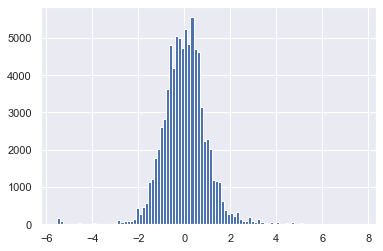

In [251]:
all_data_log["Close"].hist(bins=100);

※ Confirm whether inverse transform works appropriately, or not

In [252]:
all_data_log_inverse1 = all_data_log[['Date', 'Time', 'HH', 'date_block_num', 'month', 'Planned_Min_flag', 'Planned_Max_flag']]
all_data_log_inverse2 = all_data_log.drop(['Date', 'Time', 'HH', 'date_block_num', 'month', 'Planned_Min_flag', 'Planned_Max_flag'], axis=1)
all_data_log_inverse2.head()

Close  Sell_volume(kWh)  Buy_volume(kWh)  Total_volume(kWh)  \
0 -0.074394         -1.291817        -1.673085          -1.633175   
1 -0.147622         -1.183496        -1.640136          -1.590106   
2 -0.222905         -1.166207        -1.645640          -1.612373   
3 -0.271054         -1.200211        -1.650198          -1.610221   
4 -0.222905         -1.214961        -1.653106          -1.532537   

   System_price(Yen/kWh)  Price_Tohoku(Yen/kWh)  Price_Tokyo(Yen/kWh)  \
0              -0.452571              -0.625136             -0.647312   
1              -0.551545              -0.766843             -0.796254   
2              -0.551545              -0.766843             -0.796254   
3              -0.585289              -0.899376             -0.936160   
4              -0.467026              -0.672824             -0.697360   

   Open_Daylag_2  High_Daylag_2  Low_Daylag_2  Average_Daylag_2  \
0      -4.633993      -8.761328     -3.341479         -6.906421   
1      -4.633993      -8.761328     -3.341479         -6.906421   
2      -4.633993      -8.761328     -3.341479         -6.906421   
3      -4.633993      -8.761328     -3.341479         -6.906421   
4      -4.633993      -8.761328     -3.341479         -6.906421   

   Volume(MWh/h)_Daylag_2  Volume(Tick count)_Daylag_2  Temp_Ao_Daylag_2  \
0               -2.693481                    -3.346468            -1.276   
1               -2.693481                    -3.346468            -1.276   
2               -2.693481                    -3.346468            -1.276   
3               -2.693481                    -3.346468            -1.276   
4               -2.693481                    -3.346468            -1.276   

   SunLight(Time)_Ao_Daylag_2  WindSpeed(m/s)_Ao_Daylag_2  \
0                     -0.6572                    -2.92811   
1                     -0.6572                    -2.92811   
2                     -0.6572                    -2.92811   
3                     -0.6572                    -2.92811   
4                     -0.6572                    -2.92811   

   WindDirection_Ao_Daylag_2  SunLight(MJ/㎡)_Ao_Daylag_2  Temp_Aki_Daylag_2  \
0                  -2.036828                   -0.863725          -1.479816   
1                  -2.036828                   -0.863725          -1.479816   
2                  -2.036828                   -0.863725          -1.479816   
3                  -2.036828                   -0.863725          -1.479816   
4                  -2.036828                   -0.863725          -1.479816   

   SunLight(Time)_Aki_Daylag_2  WindSpeed(m/s)_Aki_Daylag_2  \
0                    -0.644726                    -3.399015   
1                    -0.644726                    -3.399015   
2                    -0.644726                    -3.399015   
3                    -0.644726                    -3.399015   
4                    -0.644726                    -3.399015   

   WindDirection_Aki_Daylag_2  SunLight(MJ/㎡)_Aki_Daylag_2  Temp_Mo_Daylag_2  \
0                   -2.421243                    -0.854651          -1.18493   
1                   -2.421243                    -0.854651          -1.18493   
2                   -2.421243                    -0.854651          -1.18493   
3                   -2.421243                    -0.854651          -1.18493   
4                   -2.421243                    -0.854651          -1.18493   

   SunLight(Time)_Mo_Daylag_2  WindSpeed(m/s)_Mo_Daylag_2  \
0                   -0.659142                   -3.066269   
1                   -0.659142                   -3.066269   
2                   -0.659142                   -3.066269   
3                   -0.659142                   -3.066269   
4                   -0.659142                   -3.066269   

   WindDirection_Mo_Daylag_2  SunLight(MJ/㎡)_Mo_Daylag_2  Temp_Ya_Daylag_2  \
0                  -2.057731                   -0.866574         -1.413341   
1                  -2.057731                   -0.866574         -1

In [253]:
pt.fit(all_data_log2)

cols = all_data_log_inverse2.columns
all_data_log_inverse2 = pt.inverse_transform(all_data_log2_transformed)
all_data_log_inverse2 = pd.DataFrame(all_data_log_inverse2)
all_data_log_inverse2.columns = cols

In [254]:
all_data_log_inverse = pd.concat([all_data_log_inverse1, all_data_log_inverse2], axis=1)

In [255]:
all_data_log_inverse.head()

Date      Time  HH  date_block_num  month  Planned_Min_flag  \
0 2016-04-01  00:00:00   1             1.0      4               0.0   
1 2016-04-01  00:30:00   2             1.0      4               0.0   
2 2016-04-01  01:00:00   3             1.0      4               1.0   
3 2016-04-01  01:30:00   4             1.0      4               0.0   
4 2016-04-01  02:00:00   5             1.0      4               0.0   

   Planned_Max_flag  Close  Sell_volume(kWh)  Buy_volume(kWh)  \
0               0.0   7.69         5077000.0        2120500.0   
1               0.0   7.45         5621500.0        2239000.0   
2               0.0   7.21         5710500.0        2219000.0   
3               0.0   7.06         5536000.0        2202500.0   
4               0.0   7.21         5461000.0        2192000.0   

   Total_volume(kWh)  System_price(Yen/kWh)  Price_Tohoku(Yen/kWh)  \
0           675500.0                   6.61                   6.69   
1           755500.0                   6.34                   6.34   
2           713500.0                   6.34                   6.34   
3           717500.0                   6.25                   6.03   
4           870500.0                   6.57                   6.57   

   Price_Tokyo(Yen/kWh)  Open_Daylag_2  High_Daylag_2  Low_Daylag_2  \
0                  6.69            0.0  -2.220446e-16           0.0   
1                  6.34            0.0  -2.220446e-16           0.0   
2                  6.34            0.0  -2.220446e-16           0.0   
3                  6.03            0.0  -2.220446e-16           0.0   
4                  6.57            0.0  -2.220446e-16           0.0   

   Average_Daylag_2  Volume(MWh/h)_Daylag_2  Volume(Tick count)_Daylag_2  \
0               0.0                     0.0                          0.0   
1               0.0                     0.0                          0.0   
2               0.0                     0.0                          0.0   
3               0.0                     0.0                          0.0   
4               0.0                     0.0                          0.0   

   Temp_Ao_Daylag_2  SunLight(Time)_Ao_Daylag_2  WindSpeed(m/s)_Ao_Daylag_2  \
0               0.0                         0.0                         0.0   
1               0.0                         0.0                         0.0   
2               0.0                         0.0                         0.0   
3               0.0                         0.0                         0.0   
4               0.0                         0.0                         0.0   

   WindDirection_Ao_Daylag_2  SunLight(MJ/㎡)_Ao_Daylag_2  Temp_Aki_Daylag_2  \
0              -3.774758e-15                         0.0                0.0   
1              -3.774758e-15                         0.0                0.0   
2              -3.774758e-15                         0.0                0.0   
3              -3.774758e-15                         0.0                0.0   
4              -3.774758e-15                         0.0                0.0   

   SunLight(Time)_Aki_Daylag_2  WindSpeed(m/s)_Aki_Daylag_2  \
0                          0.0                          0.0   
1                          0.0                          0.0   
2                          0.0                          0.0   
3                          0.0                          0.0   
4                          0.0                          0.0   

   WindDirection_Aki_Daylag_2  SunLight(MJ/㎡)_Aki_Daylag_2  Temp_Mo_Daylag_2  \
0                         0.0                          0.0               0.0   
1                         0.0                          0.0               0.0   
2                         0.0                          0.0               0.0   
3                         0.0                          0.0               0.0   
4                         0.0                          0.0               0.0   

   SunLight(Time)_Mo_Daylag_2  WindSpeed(m/s)_Mo_Daylag_2  \
0             

一部 ("High_Daylag_2"等)がバグってるけど、一旦は問題なし
-->対数化チェック完了！

※If PowerTransformer does not work due to infinity value, the following process must be implemented.

In [256]:
# print(np.any(np.isnan(all_data_lagged).sum()))
# print(np.any(np.isfinite(all_data_lagged).sum()))

In [257]:
# Searching infinity value
# a = all_data_lagged.replace([np.inf, -np.inf], np.nan)
# print(a.isnull().sum().head(150))

In [258]:
# all_data_lagged_2 = all_data_lagged_2.drop(["Total_Daylag_1", "Total_Daylag_1_HHlag_1"], axis=1)
# print(np.any(np.isnan(all_data_lagged).sum()))
# print(np.any(np.isfinite(all_data_lagged).sum()))

※ Inverse_transform(逆対数変換)についても調べる！！　予測後のClose priceを元の数値に戻す必要がある！！

# EDA (for all_data)

In [259]:
all_data_log.head()

Date      Time  HH  date_block_num  month  Planned_Min_flag  \
0 2016-04-01  00:00:00   1             1.0      4               0.0   
1 2016-04-01  00:30:00   2             1.0      4               0.0   
2 2016-04-01  01:00:00   3             1.0      4               1.0   
3 2016-04-01  01:30:00   4             1.0      4               0.0   
4 2016-04-01  02:00:00   5             1.0      4               0.0   

   Planned_Max_flag     Close  Sell_volume(kWh)  Buy_volume(kWh)  \
0               0.0 -0.074394         -1.291817        -1.673085   
1               0.0 -0.147622         -1.183496        -1.640136   
2               0.0 -0.222905         -1.166207        -1.645640   
3               0.0 -0.271054         -1.200211        -1.650198   
4               0.0 -0.222905         -1.214961        -1.653106   

   Total_volume(kWh)  System_price(Yen/kWh)  Price_Tohoku(Yen/kWh)  \
0          -1.633175              -0.452571              -0.625136   
1          -1.590106              -0.551545              -0.766843   
2          -1.612373              -0.551545              -0.766843   
3          -1.610221              -0.585289              -0.899376   
4          -1.532537              -0.467026              -0.672824   

   Price_Tokyo(Yen/kWh)  Open_Daylag_2  High_Daylag_2  Low_Daylag_2  \
0             -0.647312      -4.633993      -8.761328     -3.341479   
1             -0.796254      -4.633993      -8.761328     -3.341479   
2             -0.796254      -4.633993      -8.761328     -3.341479   
3             -0.936160      -4.633993      -8.761328     -3.341479   
4             -0.697360      -4.633993      -8.761328     -3.341479   

   Average_Daylag_2  Volume(MWh/h)_Daylag_2  Volume(Tick count)_Daylag_2  \
0         -6.906421               -2.693481                    -3.346468   
1         -6.906421               -2.693481                    -3.346468   
2         -6.906421               -2.693481                    -3.346468   
3         -6.906421               -2.693481                    -3.346468   
4         -6.906421               -2.693481                    -3.346468   

   Temp_Ao_Daylag_2  SunLight(Time)_Ao_Daylag_2  WindSpeed(m/s)_Ao_Daylag_2  \
0            -1.276                     -0.6572                    -2.92811   
1            -1.276                     -0.6572                    -2.92811   
2            -1.276                     -0.6572                    -2.92811   
3            -1.276                     -0.6572                    -2.92811   
4            -1.276                     -0.6572                    -2.92811   

   WindDirection_Ao_Daylag_2  SunLight(MJ/㎡)_Ao_Daylag_2  Temp_Aki_Daylag_2  \
0                  -2.036828                   -0.863725          -1.479816   
1                  -2.036828                   -0.863725          -1.479816   
2                  -2.036828                   -0.863725          -1.479816   
3                  -2.036828                   -0.863725          -1.479816   
4                  -2.036828                   -0.863725          -1.479816   

   SunLight(Time)_Aki_Daylag_2  WindSpeed(m/s)_Aki_Daylag_2  \
0                    -0.644726                    -3.399015   
1                    -0.644726                    -3.399015   
2                    -0.644726                    -3.399015   
3                    -0.644726                    -3.399015   
4                    -0.644726                    -3.399015   

   WindDirection_Aki_Daylag_2  SunLight(MJ/㎡)_Aki_Daylag_2  Temp_Mo_Daylag_2  \
0                   -2.421243                    -0.854651          -1.18493   
1                   -2.421243                    -0.854651          -1.18493   
2                   -2.421243                    -0.854651          -1.18493   
3                   -2.421243                    -0.854651          -1.18493   
4                   -2.421243                    -0.854651          -1.18493   

   SunLight(Time)_Mo_Daylag_2  WindSpeed(m/s)_Mo_Daylag_2

## Check the Correlation between features
    -->相関が極めて高いものはグルーピングして訓練データ内でダブらないようにする


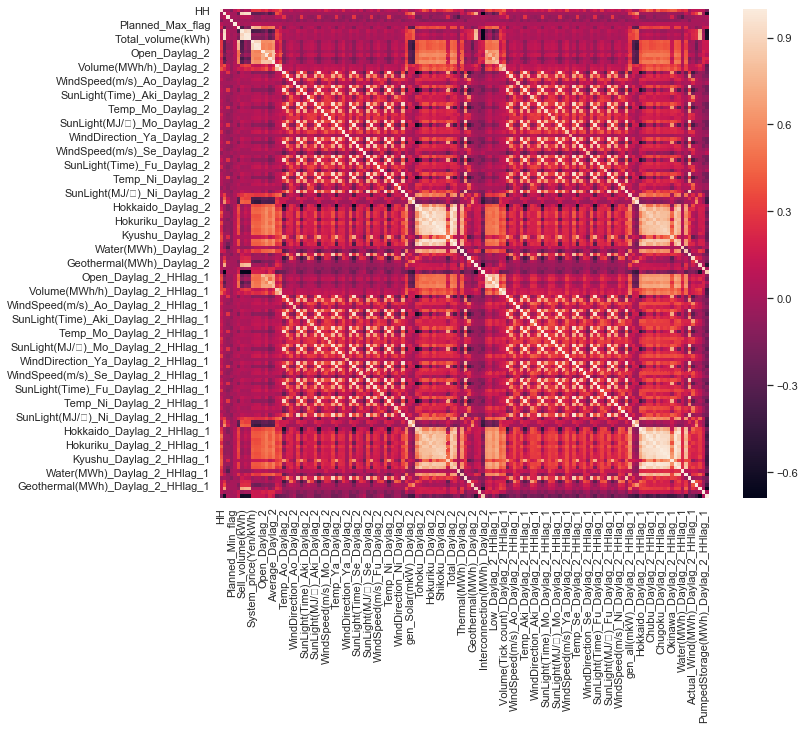

In [260]:
# correlation matrix
corrmat = all_data_log.corr()
f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, square=True);

## Check the correlation of features with the target
    -->上位相関(正と負)はピックアップして更に数値にしてみる

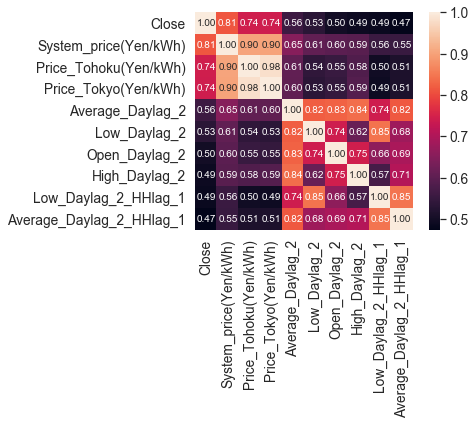

In [261]:
# revenue correlation matrix
k = 10 # The number of variables on the heatmap
cols = corrmat.nlargest(k, 'Close')['Close'].index
cm = np.corrcoef(all_data_log[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

※ちなみにDay1_lagの場合、Ave=0.65, Low=0.62, Open=0.57, Low_HHlag=0.57,HIgh=0.56,Ave_HHlag=0.55<p>
(Day2の場合、相関が結構下がるため、改善の余地あり)

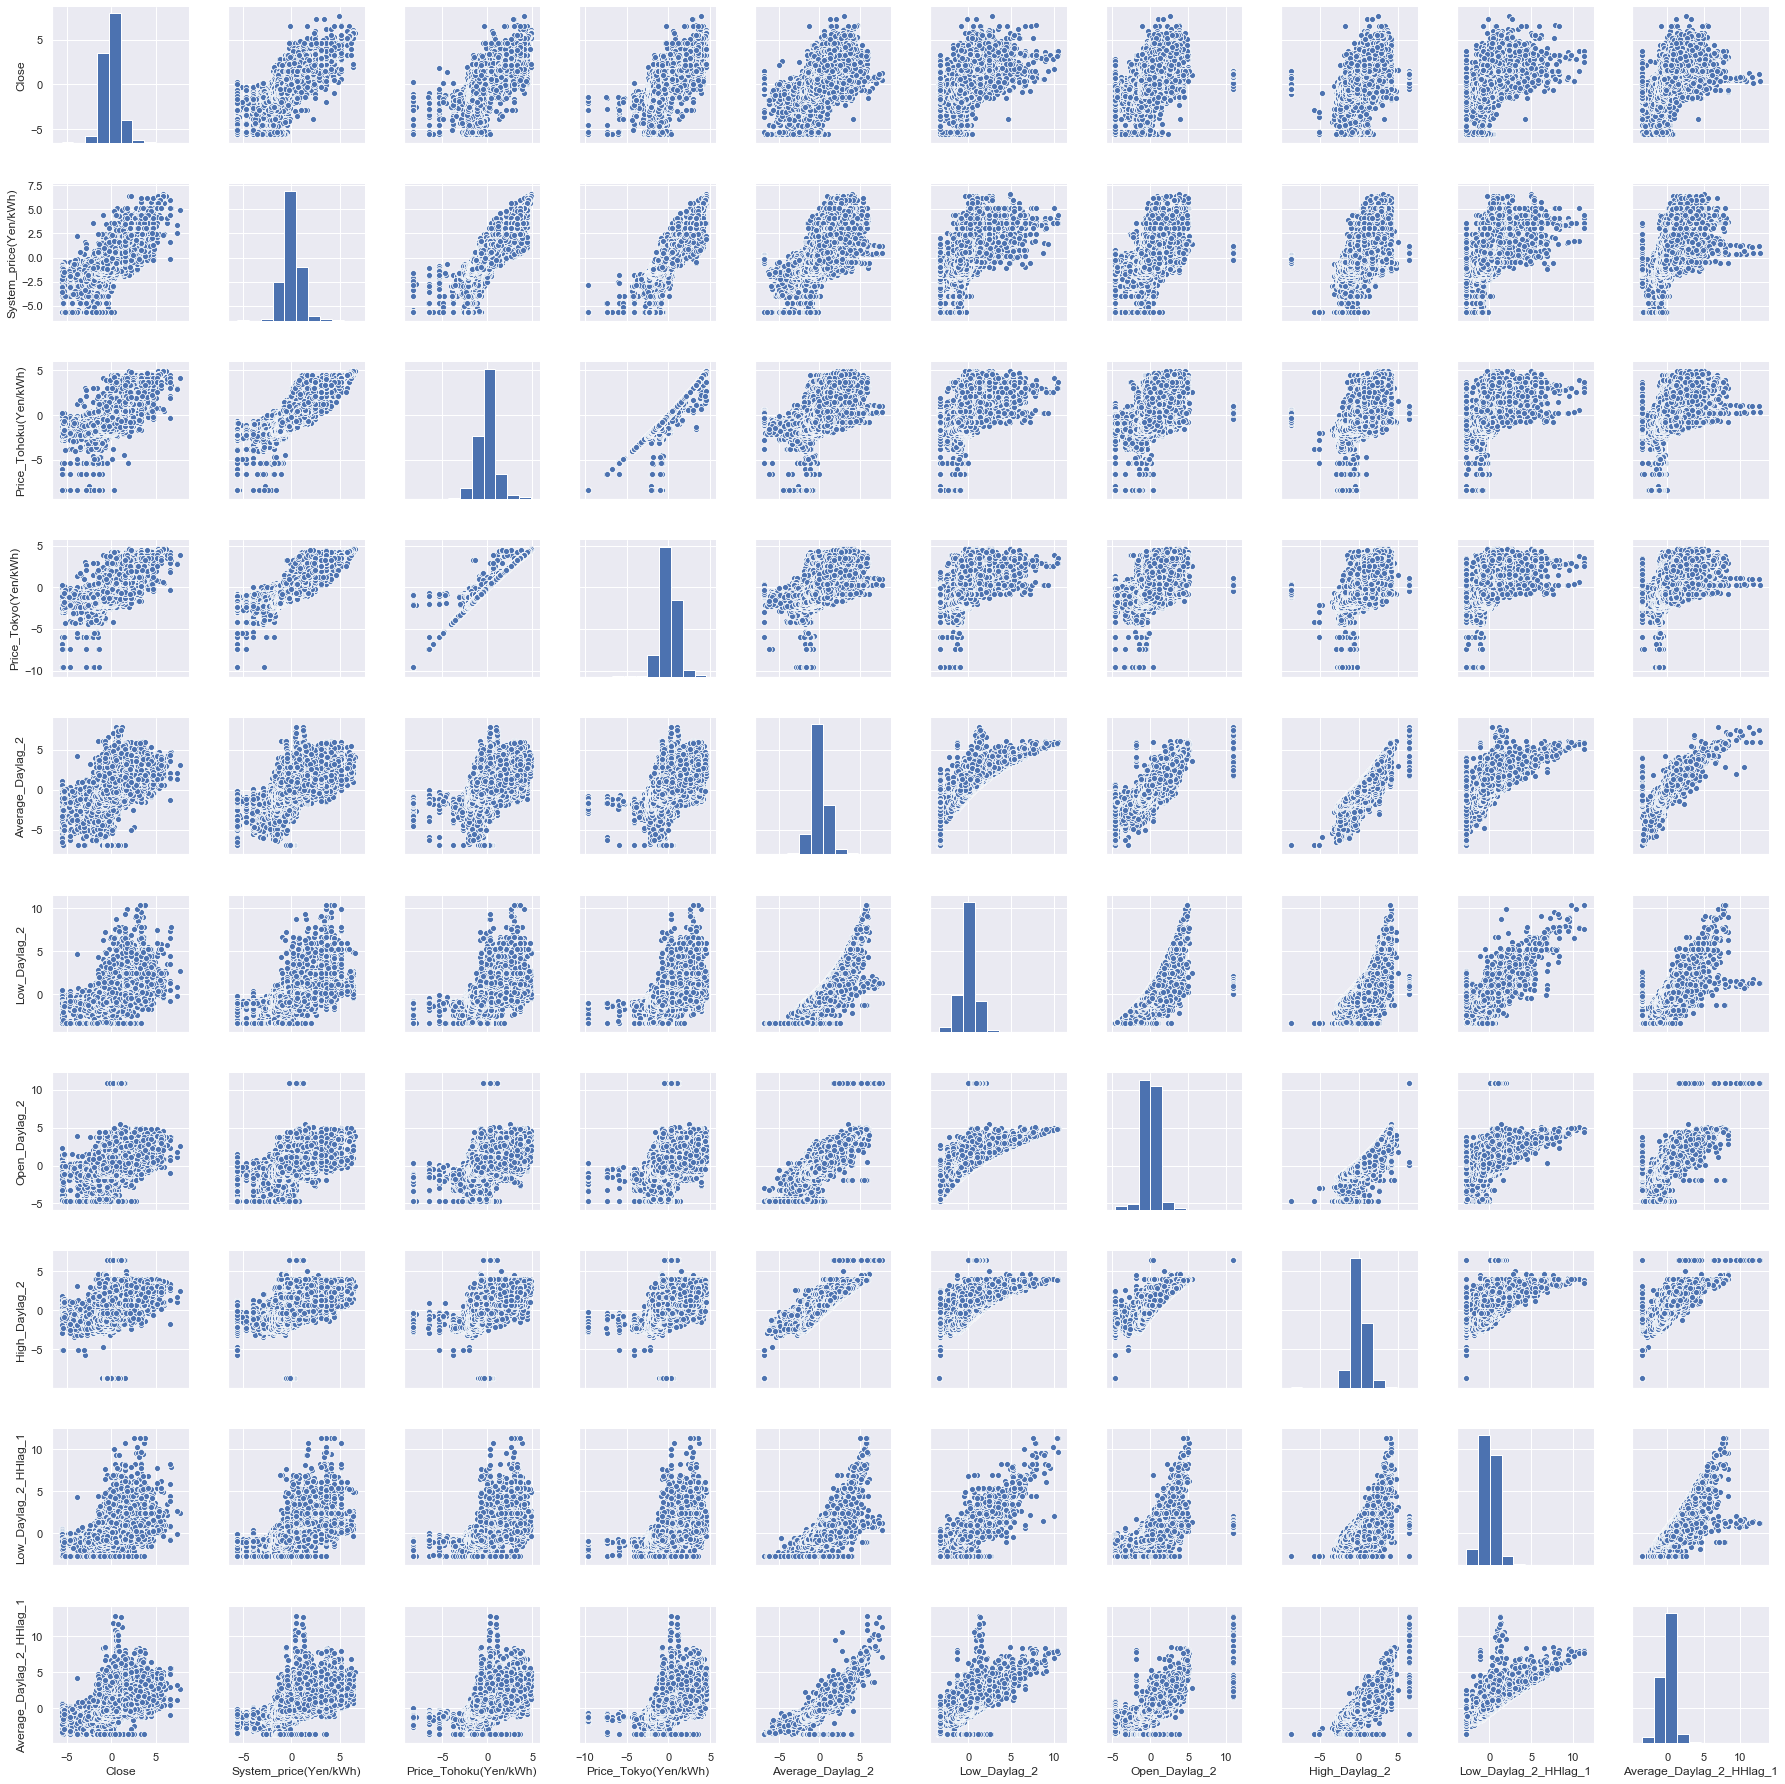

In [262]:
# scatterplot
sns.set()
cols = ['Close', 'System_price(Yen/kWh)', 'Price_Tohoku(Yen/kWh)', 'Price_Tokyo(Yen/kWh)', 'Average_Daylag_2',
        'Low_Daylag_2', 'Open_Daylag_2', 'High_Daylag_2', 'Low_Daylag_2_HHlag_1', 'Average_Daylag_2_HHlag_1']
sns.pairplot(all_data_log[cols], size=2.5)
plt.show()

<メモ><p>
    - 外れ値は見られるが線形の関係が見られる
    - OpenとCloseの相関は見られないが、OpenとHighはなぜか相関が高い。（Openで高値がつきやすい？）
    - TokyoとTohokuは高い相関が見られる

外れ値はここで処理しておく --> ただし一概に外れ値を除去するべきとは限らない。要検討 <P>
全体のEDAで気になる点がでれば個別にEDA

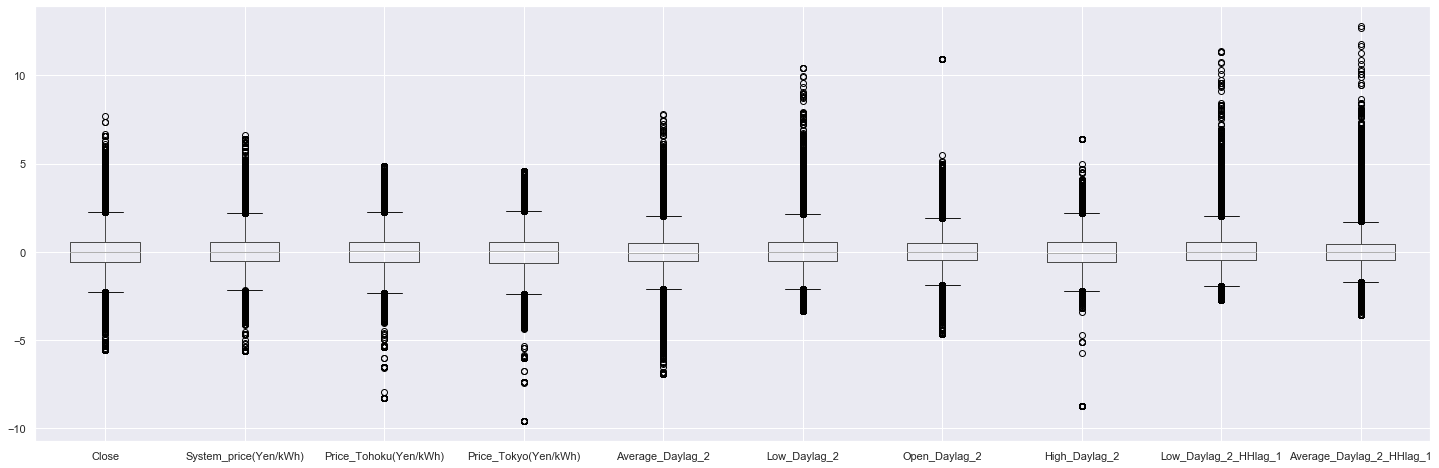

In [263]:
plt.figure(figsize = (25,8))
all_data_log[cols].boxplot()
plt.show()

スケールも整っている

In [264]:
# Remove the ourliers 
# all_data = all_data[all_data.item_price<60000]

In [265]:
# Re-confirm the outliers with scatter plot
# var = "item_price"
# data = pd.concat([all_data['item_cnt_month'], all_data[var]], axis=1)
# data.plot.scatter(x=var, y='item_cnt_month', ylim=(0,100));

In [266]:
#整理後のtraining data
all_data_log.tail()

Date      Time  HH  date_block_num  month  Planned_Min_flag  \
83323 2020-12-31  21:30:00  44          1736.0     12               0.0   
83324 2020-12-31  22:00:00  45          1736.0     12               0.0   
83325 2020-12-31  22:30:00  46          1736.0     12               0.0   
83326 2020-12-31  23:00:00  47          1736.0     12               0.0   
83327 2020-12-31  23:30:00  48          1736.0     12               0.0   

       Planned_Max_flag     Close  Sell_volume(kWh)  Buy_volume(kWh)  \
83323               0.0  5.569199          0.516615         1.185998   
83324               0.0  4.406511          0.453292         1.169933   
83325               0.0  4.151522          0.465199         1.121474   
83326               0.0  3.833666          0.430315         1.106149   
83327               0.0  2.979503          0.428168         1.055004   

       Total_volume(kWh)  System_price(Yen/kWh)  Price_Tohoku(Yen/kWh)  \
83323           0.974389               4.056114               3.357070   
83324           0.929288               4.814043               3.636565   
83325           0.937738               4.456593               3.636565   
83326           0.912668               4.056114               3.357070   
83327           0.910963               3.070161               2.622831   

       Price_Tokyo(Yen/kWh)  Open_Daylag_2  High_Daylag_2  Low_Daylag_2  \
83323              3.248023       2.926693       2.278365      2.465330   
83324              3.498930       3.465169       2.780862      1.219697   
83325              3.498930       2.857458       2.331763      2.465330   
83326              3.248023       2.064318       1.690789     -0.775821   
83327              2.574092       1.351503       1.240111     -0.719797   

       Average_Daylag_2  Volume(MWh/h)_Daylag_2  Volume(Tick count)_Daylag_2  \
83323          3.032467                1.595955                     1.873491   
83324          3.618730                1.919743                     2.296077   
83325          3.187335                1.419287                     1.828055   
83326          1.823503                1.947496                     2.384242   
83327          1.311116                2.237248                     2.164553   

       Temp_Ao_Daylag_2  SunLight(Time)_Ao_Daylag_2  \
83323         -1.232155                     -0.6572   
83324         -1.232155                     -0.6572   
83325         -1.253863                     -0.6572   
83326         -1.276000                     -0.6572   
83327         -1.268569                     -0.6572   

       WindSpeed(m/s)_Ao_Daylag_2  WindDirection_Ao_Daylag_2  \
83323                   -0.799228                  -1.802425   
83324                   -0.265390                  -1.643311   
83325                    0.329342                  -1.725876   
83326                    0.807530                  -1.802425   
83327                    0.436865                  -1.802425   

       SunLight(MJ/㎡)_Ao_Daylag_2  Temp_Aki_Daylag_2  \
83323                   -0.863725          -1.037363   
83324                   -0.863725          -1.005122   
83325                   -0.863725          -1.096432   
83326                   -0.863725          -1.191399   
83327                   -0.863725          -1.233471   

       SunLight(Time)_Aki_Daylag_2  WindSpeed(m/s)_Aki_Daylag_2  \
83323                    -0.644726                     0.123342   
83324                    -0.644726                     0.278721   
83325                    -0.644726                     0.691786   
83326                    -0.644726                     1.043766   
83327                    -0.644726                     0.948368   

       WindDirection_Aki_Daylag_2  SunLight(MJ/㎡)_Aki_Daylag_2  \
83323                   -0.461350                    -0.854651   
83324                   -0.461350                    -0.854651   
83325                   -1.229437                    -0.854651   
83326                   -2.0895

## 各特徴量の再調整

外れ値を削除 or 残す
EDAの結果を見て不要な特徴量は削除 (特徴量間の相関が高いもの、目的関数との相関がないものを除外)

# Training Models with "all_data"

モデル訓練の前に必ず整理すること！！

- target --> Close <p>
    
< Data leakage (re-confirming) >
- price --> unpredictable --> remove <p>

ここですべきことはクロスバリデーションでのモデル構築

TimeSeries validation from scikit-learn
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.TimeSeriesSplit.html

参照(ブログ)
https://medium.com/@soumyachess1496/cross-validation-in-time-series-566ae4981ce4

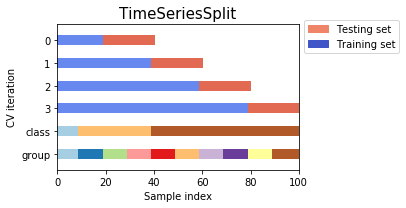

Split all_data set based on time-base

In [267]:
from sklearn.model_selection import TimeSeriesSplit

n_splits=10
test_size=48

tscv = TimeSeriesSplit(n_splits=n_splits, test_size=test_size)
print(tscv)

TimeSeriesSplit(gap=0, max_train_size=None, n_splits=10, test_size=48)


In [268]:
X = all_data_log.drop(['Close', 'Date', 'Time'], axis=1)
y = all_data_log.Close

以下のループで

- 10 fold validation train/test setへ分割
- それぞれモデルへ適用して、Evaluation(RMSE/MAE)をする
- 予測結果をリストへ返す(グラフ用)
- Evaluationをリストへ返す-->各RMSE/MAEの平均を取る --> 逆対数変換をして評価(評価用)

[Linear Regression]

In [359]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from numpy import sqrt

training_accuracy = []
valid_accuracy = []
rmse = []
mae = []
#fig, ax = plt.subplots(1, figsize=plt.figaspect(.25))


for train_index, valid_index in tscv.split(X):
    X_train, X_valid = X.iloc[train_index], X.iloc[valid_index]
    y_train, y_valid = y.iloc[train_index], y.iloc[valid_index]
#     print("TRAIN:", train_index, "TEST:", valid_index)
    print("Modelling")
    modelLine = LinearRegression(fit_intercept=True, normalize=True, copy_X=True, n_jobs=1).fit(X_train, y_train)
    y_pred = modelLine.predict(X_valid)
    true_values = y_valid.values
    training_accuracy.append(modelLine.score(X_train, y_train))     
    valid_accuracy.append(modelLine.score(X_valid, y_valid))     
    rmse.append(sqrt(mean_squared_error(true_values, y_pred)))       
    mae.append(mean_absolute_error(true_values, y_pred))

#     # Graph for comparison between actual and predictioin
#     y_pred = pd.Series(y_pred)
#     y_pred.plot(ax=ax, label="Prediction")

#print("Training_accuracy: {}".format(training_accuracy))
print("Training_accuracy: {}".format(np.mean(training_accuracy)))
#print("Valid_accuracy: {}".format(valid_accuracy))
print("Valid_accuracy: {}".format(np.mean(valid_accuracy)))
#print("RMSE: {}".format(rmse))
print("RMSE: {}".format(np.mean(rmse)))
#print("MAE: {}".format(mae))
print("MAE: {}".format(np.mean(mae)))

#ax.set(xlabel="Time", ylabel="Logarithmic_Price")
# plt.legend();

Modelling
Modelling
Modelling
Modelling
Modelling
Modelling
Modelling
Modelling
Modelling
Modelling
Training_accuracy: [0.6793460357075676, 0.6793103642413434, 0.6793971670134844, 0.679824321508647, 0.6801182287577412, 0.6812970944366326, 0.6814637408633489, 0.682383025211902, 0.6826618993361766, 0.6842219804570988]
Training_accuracy: 0.6810023857533942
Valid_accuracy: [0.4698003575536729, 0.37735803044255467, 0.3104929394085376, 0.4839945516332844, 0.29740106708629654, 0.16083401807960385, 0.7100090618714849, 0.6586972001220204, 0.8425529618514244, 0.594395468229219]
Valid_accuracy: 0.4905535656278099
RMSE: [0.8636412260394706, 0.6112891624836914, 0.7546546272645543, 0.6216854899091877, 1.8741389083452564, 1.3534378300812728, 1.1072835842465352, 1.0163391680946845, 0.5155715556280057, 1.0568846929426094]
RMSE: 0.9774926245035269
MAE: [0.6231566375111789, 0.5010077046461273, 0.5421848797232488, 0.4699577122611945, 1.4900103444372352, 1.0596876180783736, 0.8279672315164729, 0.6428391979

[RandomForest]※時間がかかるので注意

In [275]:
# from sklearn.ensemble import RandomForestRegressor

# rmse = []
# mae = []

# for train_index, valid_index in tscv.split(X):
#     X_train, X_valid = X.iloc[train_index], X.iloc[valid_index]
#     y_train, y_valid = y.iloc[train_index], y.iloc[valid_index]
#     print("Modelling")
#     modelRF = RandomForestRegressor(n_jobs = -1, min_samples_leaf = 5, n_estimators=200).fit(X_train, y_train)    
#     y_pred = modelRF.predict(X_valid)
#     true_values = y_valid.values
#     rmse.append(sqrt(mean_squared_error(true_values, y_pred)))       
#     mae.append(mean_absolute_error(true_values, y_pred))

# #print("Training_accuracy: {}".format(training_accuracy))
# print("Training_accuracy: {}".format(np.mean(training_accuracy)))
# #print("Valid_accuracy: {}".format(valid_accuracy))
# print("Valid_accuracy: {}".format(np.mean(valid_accuracy)))
# #print("RMSE: {}".format(rmse))
# print("RMSE: {}".format(np.mean(rmse)))
# #print("MAE: {}".format(mae))
# print("MAE: {}".format(np.mean(mae)))

[XGBoost]

In [287]:
from xgboost import XGBRegressor

rmse = []
mae = []

for train_index, valid_index in tscv.split(X):
    X_train, X_valid = X.iloc[train_index], X.iloc[valid_index]
    y_train, y_valid = y.iloc[train_index], y.iloc[valid_index]
    print("Modelling")
    modelXGB = XGBRegressor(max_depth=5, learning_rate=0.1, n_estimators=200, colsample_bytree=0.1).fit(X_train, y_train)   
    y_pred = modelXGB.predict(X_valid)
    true_values = y_valid.values
    training_accuracy.append(modelLine.score(X_train, y_train))     
    valid_accuracy.append(modelLine.score(X_valid, y_valid))  
    rmse.append(sqrt(mean_squared_error(true_values, y_pred)))       
    mae.append(mean_absolute_error(true_values, y_pred))

# #print("Training_accuracy: {}".format(training_accuracy))
# print("Training_accuracy: {}".format(np.mean(training_accuracy)))
# #print("Valid_accuracy: {}".format(valid_accuracy))
# print("Valid_accuracy: {}".format(np.mean(valid_accuracy)))
# #print("RMSE: {}".format(rmse))
# print("RMSE: {}".format(np.mean(rmse)))
# #print("MAE: {}".format(mae))
# print("MAE: {}".format(np.mean(mae)))

Modelling
Modelling
Modelling
Modelling
Modelling
Modelling
Modelling
Modelling
Modelling
Modelling
Training_accuracy: [0.6793460357075676, 0.6793103642413434, 0.6793971670134844, 0.679824321508647, 0.6801182287577412, 0.6812970944366326, 0.6814637408633489, 0.682383025211902, 0.6826618993361766, 0.6842219804570988, 0.6793144440256396, 0.679273822168275, 0.6793630404199413, 0.6797932426443138, 0.6800916177179328, 0.6812787040416366, 0.6814523785700752, 0.6823799229080382, 0.6826588142968514, 0.6842219804570988]
Training_accuracy: 0.6809925912391874
Valid_accuracy: [0.4698003575536729, 0.37735803044255467, 0.3104929394085376, 0.4839945516332844, 0.29740106708629654, 0.16083401807960385, 0.7100090618714849, 0.6586972001220204, 0.8425529618514244, 0.594395468229219, 0.46811709045018934, 0.3866255377515241, 0.3244579027597847, 0.4958992271535515, 0.3097498904056606, 0.1724038333006902, 0.7166930460445534, 0.6611617702965853, 0.849008873152594, 0.594395468229219]
Valid_accuracy: 0.494202414

[ARIMA]

In [361]:
# 1,1,2 ARIMA Model
from statsmodels.tsa.arima.model import ARIMA

modelARIMA = ARIMA(y, order=(1,1,2))
model_fit = modelARIMA.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                83328
Model:                 ARIMA(1, 1, 2)   Log Likelihood              -68480.083
Date:                Sat, 27 Feb 2021   AIC                         136968.166
Time:                        18:06:23   BIC                         137005.488
Sample:                             0   HQIC                        136979.586
                              - 83328                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8677      0.002    524.933      0.000       0.864       0.871
ma.L1         -1.3395      0.003   -524.444      0.000      -1.345      -1.335
ma.L2          0.3436      0.002    139.526      0.0

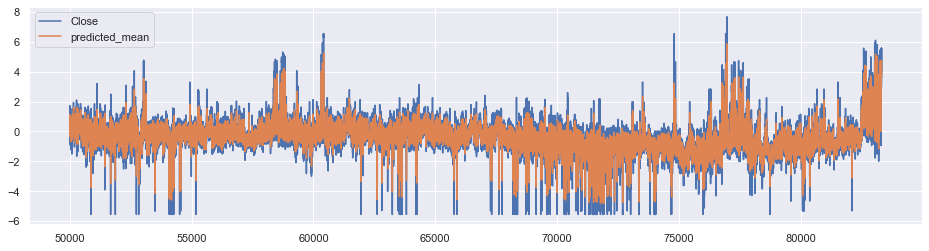

In [365]:
fig, ax = plt.subplots(1, figsize=plt.figaspect(.25))

y_pred = model_fit.predict()
y[50000:].plot()
y_pred[50000:].plot()
plt.legend();

[SVM] -->小数点に対応していないため使用不可

In [ ]:
# modeling with 3 type
#from sklearn import svm
#modelSVM_ST = svm.LinearSVC(penalty='l2', loss='hinge', dual=True, tol=1e-3).fit(x_train_norm, y_train)
#modelSVM_L2 = svm.LinearSVC(penalty='l1', loss='squared_hinge', dual=False, tol=1e-3).fit(x_train, y_train)
#modelSVM_L1 = svm.LinearSVC(penalty='l2', loss='squared_hinge', dual=True, tol=1e-3).fit(x_train, y_train)
#modelSVC = SVC(kernel='linear').fit(X_train, y_train)   

[Logistics regression] -->小数点に対応していないため使用不可

In [376]:
# from sklearn.linear_model import LogisticRegression
# modelCLF = LogisticRegression(penalty='l2', solver='sag', random_state=0).fit(X_train, y_train)   

[Prophet] <p>
Document of Prophet from Facebook
https://peerj.com/preprints/3190/

日本語の解説 (公式ではないが結構細かい)
https://mikiokubo.github.io/analytics/15forecast.html

Prophet用にデータを加工する <p>
①日時を残す (YYYYMMDD + Time)にする <p>
②列名を変更 (datetime -->dt, target-->y) <p>
③ date_block_num 1736で分割

In [308]:
# Copy all data for prophet
all_data_log_prop = all_data_log

In [309]:
all_data_log_prop["Date"] = all_data_log_prop["Date"].astype(str)
all_data_log_prop["Time"] = all_data_log_prop["Time"].astype(str)

In [310]:
all_data_log_prop ["DateTime"] = pd.to_datetime(all_data_log_prop["Date"].str.cat( all_data_log_prop["Time"], sep=" "))

In [314]:
all_data_log_prop.tail()

Date      Time  HH  date_block_num  month  Planned_Min_flag  \
83323  2020-12-31  21:30:00  44          1736.0     12               0.0   
83324  2020-12-31  22:00:00  45          1736.0     12               0.0   
83325  2020-12-31  22:30:00  46          1736.0     12               0.0   
83326  2020-12-31  23:00:00  47          1736.0     12               0.0   
83327  2020-12-31  23:30:00  48          1736.0     12               0.0   

       Planned_Max_flag     Close  Sell_volume(kWh)  Buy_volume(kWh)  \
83323               0.0  5.569199          0.516615         1.185998   
83324               0.0  4.406511          0.453292         1.169933   
83325               0.0  4.151522          0.465199         1.121474   
83326               0.0  3.833666          0.430315         1.106149   
83327               0.0  2.979503          0.428168         1.055004   

       Total_volume(kWh)  System_price(Yen/kWh)  Price_Tohoku(Yen/kWh)  \
83323           0.974389               4.056114               3.357070   
83324           0.929288               4.814043               3.636565   
83325           0.937738               4.456593               3.636565   
83326           0.912668               4.056114               3.357070   
83327           0.910963               3.070161               2.622831   

       Price_Tokyo(Yen/kWh)  Open_Daylag_2  High_Daylag_2  Low_Daylag_2  \
83323              3.248023       2.926693       2.278365      2.465330   
83324              3.498930       3.465169       2.780862      1.219697   
83325              3.498930       2.857458       2.331763      2.465330   
83326              3.248023       2.064318       1.690789     -0.775821   
83327              2.574092       1.351503       1.240111     -0.719797   

       Average_Daylag_2  Volume(MWh/h)_Daylag_2  Volume(Tick count)_Daylag_2  \
83323          3.032467                1.595955                     1.873491   
83324          3.618730                1.919743                     2.296077   
83325          3.187335                1.419287                     1.828055   
83326          1.823503                1.947496                     2.384242   
83327          1.311116                2.237248                     2.164553   

       Temp_Ao_Daylag_2  SunLight(Time)_Ao_Daylag_2  \
83323         -1.232155                     -0.6572   
83324         -1.232155                     -0.6572   
83325         -1.253863                     -0.6572   
83326         -1.276000                     -0.6572   
83327         -1.268569                     -0.6572   

       WindSpeed(m/s)_Ao_Daylag_2  WindDirection_Ao_Daylag_2  \
83323                   -0.799228                  -1.802425   
83324                   -0.265390                  -1.643311   
83325                    0.329342                  -1.725876   
83326                    0.807530                  -1.802425   
83327                    0.436865                  -1.802425   

       SunLight(MJ/㎡)_Ao_Daylag_2  Temp_Aki_Daylag_2  \
83323                   -0.863725          -1.037363   
83324                   -0.863725          -1.005122   
83325                   -0.863725          -1.096432   
83326                   -0.863725          -1.191399   
83327                   -0.863725          -1.233471   

       SunLight(Time)_Aki_Daylag_2  WindSpeed(m/s)_Aki_Daylag_2  \
83323                    -0.644726                     0.123342   
83324                    -0.644726                     0.278721   
83325                    -0.644726                     0.691786   
83326                    -0.644726                     1.043766   
83327                    -0.644726                     0.948368   

       WindDirection_Aki_Daylag_2  SunLight(MJ/㎡)_Aki_Daylag_2  \
83323                   -0.461350                    -0.854651   
83324                   -0.461350                    -0.854651   
83325                   -1.229437                    -0.854651   
83326                   -2

In [312]:
# train dataset for prophet
df_prop = all_data_log_prop.rename(columns={'DateTime': 'ds', 'Close': 'y'})

In [313]:
from fbprophet import Prophet
modelProp = Prophet().fit(df_prop)

[引用:パラメータの解説]
以下の例では、initialが730日なので、729日までの情報を用いて、その後365(horizon)日の予測を行い、本当の値との誤差を評価し、次いで730+180(period)日までの情報を用いて、その後365日の予測を行い評価し、という手順を最後の日まで繰り返す。(2905-730-365)/180 = 10.05であるので、11回の予測を行い評価することになる。cross_validationは、交差検証用のデータフレームを返す。<p>
    -->今回はTotal1736に対し、InInitial1725daysを用いて最初にhorison1dayを予測し、その後Period1day間隔で予測を繰り返す<p>
    -->つまり(1736-1725-1)/1 = 10times predictions

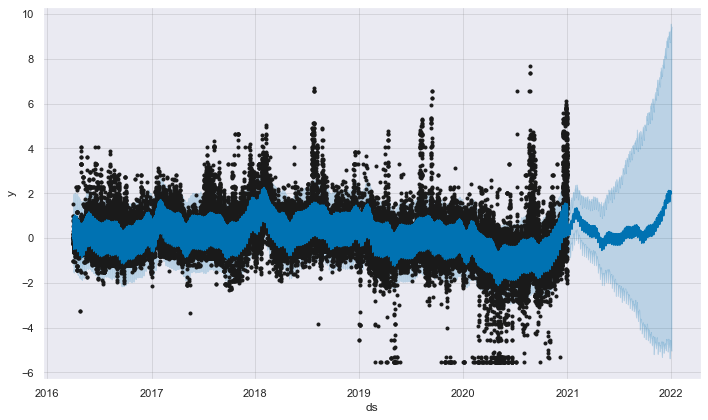

In [321]:
future = modelProp.make_future_dataframe(periods=365, freq='D')
forecast = modelProp.predict(future)
modelProp.plot(forecast);

In [315]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(modelProp, initial='1725days', period='1days', horizon = '1days')
df_cv.head()

INFO:fbprophet:Making 10 forecasts with cutoffs between 2020-12-21 23:30:00 and 2020-12-30 23:30:00


ds      yhat  yhat_lower  yhat_upper         y  \
0 2020-12-22 00:00:00 -0.082018   -1.012254    0.840282  0.823307   
1 2020-12-22 00:30:00 -0.107643   -1.036531    0.838620  0.614843   
2 2020-12-22 01:00:00 -0.118693   -1.063234    0.848371 -0.407258   
3 2020-12-22 01:30:00 -0.117595   -1.072286    0.863537 -0.216550   
4 2020-12-22 02:00:00 -0.108520   -1.056202    0.837846 -0.356620   

               cutoff  
0 2020-12-21 23:30:00  
1 2020-12-21 23:30:00  
2 2020-12-21 23:30:00  
3 2020-12-21 23:30:00  
4 2020-12-21 23:30:00

In [323]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv, rolling_window=0)
df_p.head()

horizon       mse      rmse       mae      mape     mdape  coverage
0 0 days 00:30:00  4.240663  2.059287  1.773797  1.076963  1.068056       0.4
1 0 days 01:00:00  3.402305  1.844534  1.631645  1.075548  1.113606       0.4
2 0 days 01:30:00  3.126688  1.768244  1.525514  0.936458  1.004810       0.2
3 0 days 02:00:00  3.268852  1.807997  1.635082  0.944378  1.014166       0.1
4 0 days 02:30:00  4.461348  2.112190  1.802485  0.964432  1.005320       0.1

In [324]:
df_p.tail()

horizon       mse      rmse       mae      mape     mdape  coverage
43 0 days 22:00:00  8.091772  2.844604  2.175544  0.760315  0.825952       0.4
44 0 days 22:30:00  8.258962  2.873841  2.296948  0.801937  0.919915       0.2
45 0 days 23:00:00  6.600523  2.569148  2.321369  0.918436  0.970387       0.2
46 0 days 23:30:00  6.962590  2.638672  2.170257  1.011509  1.020014       0.2
47 1 days 00:00:00  5.804505  2.409254  1.928921  1.065853  1.078289       0.3

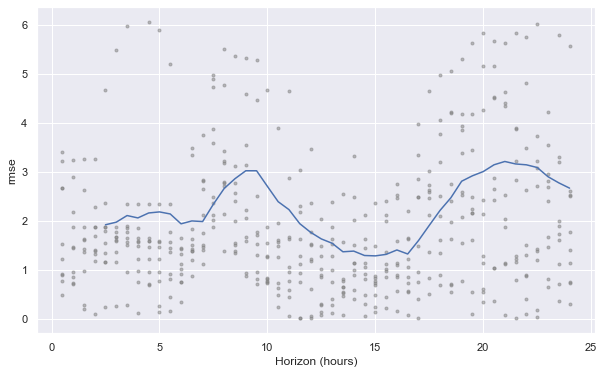

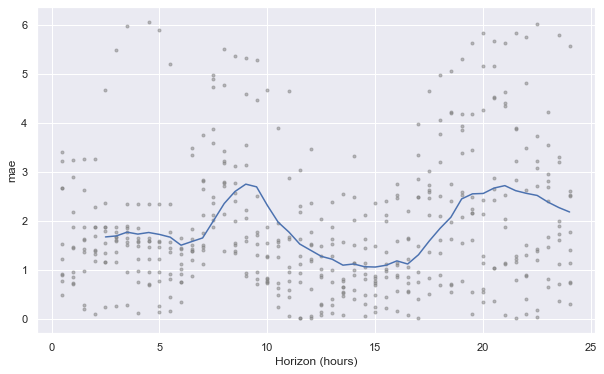

In [379]:
from fbprophet.plot import plot_cross_validation_metric
plot_cross_validation_metric(df_cv, metric='rmse');
plot_cross_validation_metric(df_cv, metric='mae');

課題
- RMSEは実数(逆対数変換)で算出したほうがわかりやすいので調整 ※全てのモデル作成後の課題
- モデルごとに実数と予測値の比較グラフ
- 各モデルのRMSE/MAE比較グラフ

[RMSE]

In [ ]:
y_preds_model_Line = pd.DataFrame(modelLine.predict(x_train)).round()
y_valid_model_Line = pd.DataFrame(modelLine.predict(x_valid)).round()

y_preds_model_RF = pd.DataFrame(modelRF.predict(x_train)).round()
y_valid_model_RF = pd.DataFrame(modelRF.predict(x_valid)).round()

y_preds_model_XGB = pd.DataFrame(modelXGB.predict(x_train)).round()
y_valid_model_XGB = pd.DataFrame(modelXGB.predict(x_valid)).round()

RMSEは元の数値で算出するほうが良さそう。（ラグを解除する）

In [ ]:
#逆対数変換でPredictionを元の値へ

In [ ]:
# from sklearn.metrics import mean_squared_error
# from numpy import sqrt

# rmse = sqrt(mean_squared_error(y_train, y_preds_model_Line))
# print('Train RMSE_Line: %.3f' % rmse)
# rmse = sqrt(mean_squared_error(y_valid, y_valid_model_Line))
# print('Valid RMSE_Line: %.3f' % rmse)

# rmse = sqrt(mean_squared_error(y_train, y_preds_model_RF))
# print('Train RMSE_RF: %.3f' % rmse)
# rmse = sqrt(mean_squared_error(y_valid, y_valid_model_Line))
# print('Valid RMSE_Line: %.3f' % rmse)

# rmse = sqrt(mean_squared_error(y_train, y_preds_model_XGB))
# print('Train RMSE_XGB: %.3f' % rmse)
# rmse = sqrt(mean_squared_error(y_valid, y_valid_model_XGB))
# print('Valid RMSE_XGB: %.3f' % rmse)

# rmse = sqrt(mean_squared_error(y_train, forecast_train['yhat']))
# print('Train RMSE_Prep: %.3f' % rmse)
# rmse = sqrt(mean_squared_error(y_valid, forecast_valid['yhat']))
# print('VAlid RMSE_Prep: %.3f' % rmse)

※やり残していること
- Visualisation (Actual value と Precition)
- Visualisation (各RMSE/MAEの計測値) <p>
 --> Evaluationを実数で計測すること(Predictionに対して逆対数変換が必要) 

# Visualisation of the model performance 

<やりたいこと>
複数モデルを線形チャートで比較表示させたい。できれば

※
[Explanable easily but conservative]
Linear model
ARIMA, ARIMAX, etc
Prophet



# グリッドリサーチ (最後の最後に余裕があれば)
-->モデルを絞ったあとに実施する予定

In [ ]:
# #RandomForestのパラメーターチューニング
# from sklearn.model_selection import RandomizedSearchCV
# from random import randint
# modelRF = RandomForestRegressor(
#     n_estimators=200,
#   max_depth=3,
#   bootstrap=True,
#   criterion='mse'
# ).fit(x_train, y_train)

In [ ]:
# # predict target
# #y_preds_model_Line = pd.DataFrame(modelLine.predict(x_test)).round()
# y_preds_model_RF = pd.DataFrame(modelRF.predict(x_train)).round()
# #y_preds_model_XGB = pd.DataFrame(modelXGB.predict(x_train)).round()

In [ ]:
# y_preds_model_RF_valid = pd.DataFrame(modelRF.predict(x_valid)).round()

In [ ]:
# # Measure the score of RMSE which is the mesure to evaluate on this competition 
# from sklearn.metrics import mean_squared_error
# from numpy import sqrt
# rmse = sqrt(mean_squared_error(y_train, y_preds_model_RF))
# print('Val RMSE: %.3f' % rmse)

In [ ]:
# rmse = sqrt(mean_squared_error(y_valid, y_preds_model_RF_valid))
# print('Val RMSE: %.3f' % rmse)

Test XGBoost <p>
And, optimise the hyper parameter based on "RMSE"

In [ ]:
# #XGBoostのパラメーターチューニング
# modelXGB = XGBRegressor(
#     colsample_bytree=0.4,
#     gamma=0.1,
#     max_depth=13,
#     min_child_weight=3,
#     learning_rate=0.01,
#     subsample=1.0,
#     n_estimators=200,
#     scale_pos_weight=1,
# )
# modelXGB.fit(
#     x_train, y_train, eval_metric="rmse", eval_set=[(x_train, y_train), (x_valid, y_valid)]
# )

In [ ]:
# print("XGB_Train set score: {:.2f}". format(modelXGB.score(x_train, y_train)))
# print("XGB_Valid set score: {:.2f}". format(modelXGB.score(x_valid, y_valid)))

In [ ]:
# y_preds_model_XGB = pd.DataFrame(modelXGB.predict(x_train)).round()

In [ ]:
# # Measure the score of RMSE which is the mesure to evaluate on this competition 
# from sklearn.metrics import mean_squared_error
# from numpy import sqrt
# rmse = sqrt(mean_squared_error(y_train, y_preds_model_XGB))
# print('Val RMSE: %.3f' % rmse)

In [ ]:
# y_preds_model_XGB_valid = pd.DataFrame(modelXGB.predict(x_valid)).round()

In [ ]:
# # Measure the score of RMSE which is the mesure to evaluate on this competition 
# from sklearn.metrics import mean_squared_error
# from numpy import sqrt
# rmse = sqrt(mean_squared_error(y_valid, y_preds_model_XGB_valid))
# print('Val RMSE: %.3f' % rmse)

# Making combined price data with all the tradable price ※必要なデータセットをCSVデータへ変換

必要なのは、Spot price, 予測後のClose　price

# Calculate trading performance (VaR, Sharp-ratio)　※ここからは別のノートへ

## VaR

## Sharp-ratio